1. Open the file & Pre-processing 1

In [2]:
!pip install pyreadstat

In [3]:
# USING THE UPDATED Dataset FILE

import pandas as pd
import sklearn as sk
import numpy as np
import pyreadstat
import math


In [4]:
filepath = "C:\\Users\\Marianne\\Downloads\\MASTERS THESIS MATHMOT\\Resurssit_ja_DATASET\\Dataset\\CSV_GraduDatasetMARIANNE_MEANvariables1.csv"
data = pd.read_csv(filepath, sep=";", na_values=99999)
# avoid datatype of core series series by using DataFrame
df = pd.DataFrame(data) 
df.head()

SCHOOLID   CLASSID         STUDID    TCH_ID_C  GRADE  SGender  SAge  LANG  \
0    246002  24600231  2460023100001  2460020131      3      0.0   9.0   3.0   
1    246002  24600231  2460023100002  2460020131      3      0.0   9.0   3.0   
2    246002  24600231  2460023100003  2460020131      3      0.0  10.0   2.0   
3    246002  24600231  2460023100004  2460020131      3      0.0   NaN   4.0   
4    246002  24600231  2460023100005  2460020131      3      0.0   9.0   4.0   

   Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  MEAN_Enj_HW  \
0    2.0   4.0  ...             2   2,285714286            3,25          2,5   
1    4.0   4.0  ...   1,416666667   1,142857143             3,5            3   
2    2.0   4.0  ...   2,833333333   1,285714286            4,25          3,5   
3    5.0   2.0  ...          3,25   3,142857143            1,75            2   
4    4.0   3.0  ...          1,25             2            2,75          2,5   

   MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  MEAN_Bor_Cl  \
0              2         1,25  1,666666667            2,8         2,25   
1    2,666666667         1,25            1            1,8            1   
2    2,333333333         1,75            2            4,2          1,5   
3    1,666666667          2,5  2,333333333            4,4          3,5   
4    2,333333333            1  1,333333333            1,4            2   

   MEAN_Bor_HW  
0  2,333333333  
1  1,333333333  
2            1  
3  2,666666667  
4            2  

[5 rows x 56 columns]

In [5]:
# type(df["MEAN_Enjoyment"][2])
#datatype = string, should be float
df.head()

SCHOOLID   CLASSID         STUDID    TCH_ID_C  GRADE  SGender  SAge  LANG  \
0    246002  24600231  2460023100001  2460020131      3      0.0   9.0   3.0   
1    246002  24600231  2460023100002  2460020131      3      0.0   9.0   3.0   
2    246002  24600231  2460023100003  2460020131      3      0.0  10.0   2.0   
3    246002  24600231  2460023100004  2460020131      3      0.0   NaN   4.0   
4    246002  24600231  2460023100005  2460020131      3      0.0   9.0   4.0   

   Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  MEAN_Enj_HW  \
0    2.0   4.0  ...             2   2,285714286            3,25          2,5   
1    4.0   4.0  ...   1,416666667   1,142857143             3,5            3   
2    2.0   4.0  ...   2,833333333   1,285714286            4,25          3,5   
3    5.0   2.0  ...          3,25   3,142857143            1,75            2   
4    4.0   3.0  ...          1,25             2            2,75          2,5   

   MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  MEAN_Bor_Cl  \
0              2         1,25  1,666666667            2,8         2,25   
1    2,666666667         1,25            1            1,8            1   
2    2,333333333         1,75            2            4,2          1,5   
3    1,666666667          2,5  2,333333333            4,4          3,5   
4    2,333333333            1  1,333333333            1,4            2   

   MEAN_Bor_HW  
0  2,333333333  
1  1,333333333  
2            1  
3  2,666666667  
4            2  

[5 rows x 56 columns]

In [6]:
# to avoid ValueError: could not convert string to float: ''
# check if or where the empty space is

columns_with_empty_spaces = df.columns[df.applymap(lambda x: x.isspace() if isinstance(x, str) else False).any()]

# Print the column names
print("Columns with empty spaces:", list(columns_with_empty_spaces))
df

Columns with empty spaces: ['Missing', 'add_C', 'sub_C', 'arithm', 'mul_C', 'MEAN_Enjoyment', 'MEAN_Anxiety', 'MEAN_Boredom', 'MEAN_Enj_Class', 'MEAN_Enj_HW', 'MEAN_Enj_Test', 'MEAN_Anx_Cl', 'MEAN_Anx_HW', 'MEAN_Anx_TEST', 'MEAN_Bor_Cl', 'MEAN_Bor_HW']


SCHOOLID   CLASSID         STUDID    TCH_ID_C  GRADE  SGender  SAge  \
0       246002  24600231  2460023100001  2460020131      3      0.0   9.0   
1       246002  24600231  2460023100002  2460020131      3      0.0   9.0   
2       246002  24600231  2460023100003  2460020131      3      0.0  10.0   
3       246002  24600231  2460023100004  2460020131      3      0.0   NaN   
4       246002  24600231  2460023100005  2460020131      3      0.0   9.0   
...        ...       ...            ...         ...    ...      ...   ...   
1762    246050  24605041  2460504100007  2460500241      4      0.0  11.0   
1763    246050  24605041  2460504100008  2460500241      4      1.0  10.0   
1764    246050  24605041  2460504100009  2460500241      4      1.0  10.0   
1765    246050  24605041  2460504100010  2460500241      4      1.0  10.0   
1766    246050  24605041  2460504100011  2460500241      4      1.0  11.0   

      LANG  Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  \
0      3.0    2.0   4.0  ...             2   2,285714286            3,25   
1      3.0    4.0   4.0  ...   1,416666667   1,142857143             3,5   
2      2.0    2.0   4.0  ...   2,833333333   1,285714286            4,25   
3      4.0    5.0   2.0  ...          3,25   3,142857143            1,75   
4      4.0    4.0   3.0  ...          1,25             2            2,75   
...    ...    ...   ...  ...           ...           ...             ...   
1762   4.0    4.0   2.0  ...   1,583333333   3,857142857            1,25   
1763   4.0    5.0   5.0  ...          1,25   1,142857143            4,75   
1764   4.0    5.0   5.0  ...   1,333333333   1,428571429            4,75   
1765   4.0    4.0   4.0  ...   1,416666667             2            3,75   
1766   2.0    3.0   3.0  ...   1,333333333   1,142857143            3,75   

      MEAN_Enj_HW  MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  \
0             2,5              2         1,25  1,666666667            2,8   
1               3    2,666666667         1,25            1            1,8   
2             3,5    2,333333333         1,75            2            4,2   
3               2    1,666666667          2,5  2,333333333            4,4   
4             2,5    2,333333333            1  1,333333333            1,4   
...           ...            ...          ...          ...            ...   
1762            1              2            2  1,333333333            1,4   
1763            3              5            1            1            1,6   
1764            3    4,666666667          1,5  1,333333333            1,2   
1765          2,5    3,333333333            1            1              2   
1766          2,5              5         1,25  1,666666667            1,2   

      MEAN_Bor_Cl  MEAN_Bor_HW  
0            2,25  2,333333333  
1               1  1,333333333  
2             1,5            1  
3             3,5  2,666666667  
4               2            2  
...           ...          ...  
1762            4  3,666666667  
1763            1  1,333333333  
1764         1,25  1,666666667  
1765            2            2  
1766         1,25            1  

[1767 rows x 56 columns]

In [7]:
# Replace empty spaces with NaN
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

# Replace commas with dots and convert the DataFrame to float
df = df.replace({',': '.'}, regex=True).astype(float)

# Print the result
df

SCHOOLID     CLASSID        STUDID      TCH_ID_C  GRADE  SGender  SAge  \
0     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
1     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
2     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0  10.0   
3     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   NaN   
4     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
...        ...         ...           ...           ...    ...      ...   ...   
1762  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      0.0  11.0   
1763  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1764  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1765  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1766  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  11.0   

      LANG  Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  \
0      3.0    2.0   4.0  ...      2.000000      2.285714            3.25   
1      3.0    4.0   4.0  ...      1.416667      1.142857            3.50   
2      2.0    2.0   4.0  ...      2.833333      1.285714            4.25   
3      4.0    5.0   2.0  ...      3.250000      3.142857            1.75   
4      4.0    4.0   3.0  ...      1.250000      2.000000            2.75   
...    ...    ...   ...  ...           ...           ...             ...   
1762   4.0    4.0   2.0  ...      1.583333      3.857143            1.25   
1763   4.0    5.0   5.0  ...      1.250000      1.142857            4.75   
1764   4.0    5.0   5.0  ...      1.333333      1.428571            4.75   
1765   4.0    4.0   4.0  ...      1.416667      2.000000            3.75   
1766   2.0    3.0   3.0  ...      1.333333      1.142857            3.75   

      MEAN_Enj_HW  MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  \
0             2.5       2.000000         1.25     1.666667            2.8   
1             3.0       2.666667         1.25     1.000000            1.8   
2             3.5       2.333333         1.75     2.000000            4.2   
3             2.0       1.666667         2.50     2.333333            4.4   
4             2.5       2.333333         1.00     1.333333            1.4   
...           ...            ...          ...          ...            ...   
1762          1.0       2.000000         2.00     1.333333            1.4   
1763          3.0       5.000000         1.00     1.000000            1.6   
1764          3.0       4.666667         1.50     1.333333            1.2   
1765          2.5       3.333333         1.00     1.000000            2.0   
1766          2.5       5.000000         1.25     1.666667            1.2   

      MEAN_Bor_Cl  MEAN_Bor_HW  
0            2.25     2.333333  
1            1.00     1.333333  
2            1.50     1.000000  
3            3.50     2.666667  
4            2.00     2.000000  
...           ...          ...  
1762         4.00     3.666667  
1763         1.00     1.333333  
1764         1.25     1.666667  
1765         2.00     2.000000  
1766         1.25     1.000000  

[1767 rows x 56 columns]

In [8]:
# Convert the DataFrame to float
df = df.astype(float)

df

SCHOOLID     CLASSID        STUDID      TCH_ID_C  GRADE  SGender  SAge  \
0     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
1     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
2     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0  10.0   
3     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   NaN   
4     246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
...        ...         ...           ...           ...    ...      ...   ...   
1762  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      0.0  11.0   
1763  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1764  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1765  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  10.0   
1766  246050.0  24605041.0  2.460504e+12  2.460500e+09    4.0      1.0  11.0   

      LANG  Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  \
0      3.0    2.0   4.0  ...      2.000000      2.285714            3.25   
1      3.0    4.0   4.0  ...      1.416667      1.142857            3.50   
2      2.0    2.0   4.0  ...      2.833333      1.285714            4.25   
3      4.0    5.0   2.0  ...      3.250000      3.142857            1.75   
4      4.0    4.0   3.0  ...      1.250000      2.000000            2.75   
...    ...    ...   ...  ...           ...           ...             ...   
1762   4.0    4.0   2.0  ...      1.583333      3.857143            1.25   
1763   4.0    5.0   5.0  ...      1.250000      1.142857            4.75   
1764   4.0    5.0   5.0  ...      1.333333      1.428571            4.75   
1765   4.0    4.0   4.0  ...      1.416667      2.000000            3.75   
1766   2.0    3.0   3.0  ...      1.333333      1.142857            3.75   

      MEAN_Enj_HW  MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  \
0             2.5       2.000000         1.25     1.666667            2.8   
1             3.0       2.666667         1.25     1.000000            1.8   
2             3.5       2.333333         1.75     2.000000            4.2   
3             2.0       1.666667         2.50     2.333333            4.4   
4             2.5       2.333333         1.00     1.333333            1.4   
...           ...            ...          ...          ...            ...   
1762          1.0       2.000000         2.00     1.333333            1.4   
1763          3.0       5.000000         1.00     1.000000            1.6   
1764          3.0       4.666667         1.50     1.333333            1.2   
1765          2.5       3.333333         1.00     1.000000            2.0   
1766          2.5       5.000000         1.25     1.666667            1.2   

      MEAN_Bor_Cl  MEAN_Bor_HW  
0            2.25     2.333333  
1            1.00     1.333333  
2            1.50     1.000000  
3            3.50     2.666667  
4            2.00     2.000000  
...           ...          ...  
1762         4.00     3.666667  
1763         1.00     1.333333  
1764         1.25     1.666667  
1765         2.00     2.000000  
1766         1.25     1.000000  

[1767 rows x 56 columns]

In [9]:
type(df["MEAN_Enjoyment"][2])

numpy.float64

In [10]:
print("Number of NaNs before removal:", df.isna().sum())

Number of NaNs before removal: SCHOOLID                         0
CLASSID                          0
STUDID                           0
TCH_ID_C                         0
GRADE                            0
SGender                         18
SAge                            41
LANG                            16
Books                           28
AEQ1                            17
AEQ2                            19
AEQ3                            15
AEQ4                            16
AEQ5                            30
AEQ6                            30
AEQ7                            30
AEQ8                            29
AEQ9                            29
AEQ10                           33
AEQ11                           33
AEQ12                           31
AEQ13                           21
AEQ14                           27
AEQ15                           22
AEQ16                           21
AEQ17                           22
AEQ18                           22
AEQ19                   

In [11]:
# df = df.dropna()
# print("Number of NaNs after removal:", df.isna().sum())

In [12]:
print(df[df.isna().all(axis=1)])

Empty DataFrame
Columns: [SCHOOLID, CLASSID, STUDID, TCH_ID_C, GRADE, SGender, SAge, LANG, Books, AEQ1, AEQ2, AEQ3, AEQ4, AEQ5, AEQ6, AEQ7, AEQ8, AEQ9, AEQ10, AEQ11, AEQ12, AEQ13, AEQ14, AEQ15, AEQ16, AEQ17, AEQ18, AEQ19, AEQ20, AEQ21, AEQ22, AEQ23, AEQ24, AEQ25, AEQ26, AEQ27, AEQ28, MathWaveOneIRT, PrimaryLast_duplicateFirst, filter_$, Missing, add_C, sub_C, arithm, mul_C, MEAN_Enjoyment, MEAN_Anxiety, MEAN_Boredom, MEAN_Enj_Class, MEAN_Enj_HW, MEAN_Enj_Test, MEAN_Anx_Cl, MEAN_Anx_HW, MEAN_Anx_TEST, MEAN_Bor_Cl, MEAN_Bor_HW]
Index: []

[0 rows x 56 columns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SCHOOLID                    1767 non-null   float64
 1   CLASSID                     1767 non-null   float64
 2   STUDID                      1767 non-null   float64
 3   TCH_ID_C                    1767 non-null   float64
 4   GRADE                       1767 non-null   float64
 5   SGender                     1749 non-null   float64
 6   SAge                        1726 non-null   float64
 7   LANG                        1751 non-null   float64
 8   Books                       1739 non-null   float64
 9   AEQ1                        1750 non-null   float64
 10  AEQ2                        1748 non-null   float64
 11  AEQ3                        1752 non-null   float64
 12  AEQ4                        1751 non-null   float64
 13  AEQ5                        1737 

In [14]:
nan_cols = df.isnull().sum()
nan_cols
# False = There are no missing values

SCHOOLID                         0
CLASSID                          0
STUDID                           0
TCH_ID_C                         0
GRADE                            0
SGender                         18
SAge                            41
LANG                            16
Books                           28
AEQ1                            17
AEQ2                            19
AEQ3                            15
AEQ4                            16
AEQ5                            30
AEQ6                            30
AEQ7                            30
AEQ8                            29
AEQ9                            29
AEQ10                           33
AEQ11                           33
AEQ12                           31
AEQ13                           21
AEQ14                           27
AEQ15                           22
AEQ16                           21
AEQ17                           22
AEQ18                           22
AEQ19                           20
AEQ20               

In [15]:
variables = ["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]
df_variables = df[variables]
df_variables.head()

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.666667      2.000000      2.285714
1        3.111111      1.416667      1.142857
2        3.444444      2.833333      1.285714
3        1.777778      3.250000      3.142857
4        2.555556      1.250000      2.000000

In [16]:
studid_variables = ["STUDID", "MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]
df_studid_variables = df[studid_variables]
df_studid_variables.head()

STUDID  MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0  2.460023e+12        2.666667      2.000000      2.285714
1  2.460023e+12        3.111111      1.416667      1.142857
2  2.460023e+12        3.444444      2.833333      1.285714
3  2.460023e+12        1.777778      3.250000      3.142857
4  2.460023e+12        2.555556      1.250000      2.000000

In [17]:
print(df_variables.mean(), df_variables.median(), df_variables.mode())


MEAN_Enjoyment    2.920871
MEAN_Anxiety      1.431386
MEAN_Boredom      2.028928
dtype: float64 MEAN_Enjoyment    2.888889
MEAN_Anxiety      1.250000
MEAN_Boredom      1.857143
dtype: float64    MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.444444           1.0           1.0


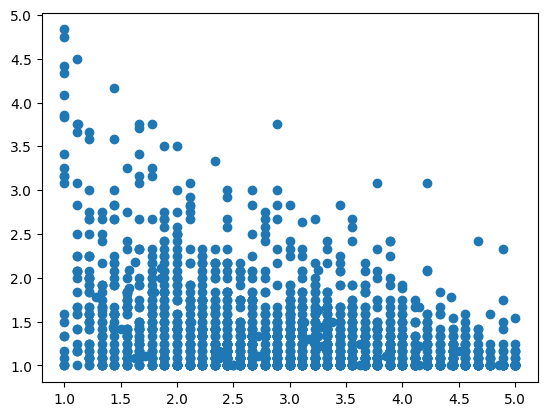

In [18]:
# Screen & Visualize Anxiety
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df.MEAN_Enjoyment, df["MEAN_Anxiety"])

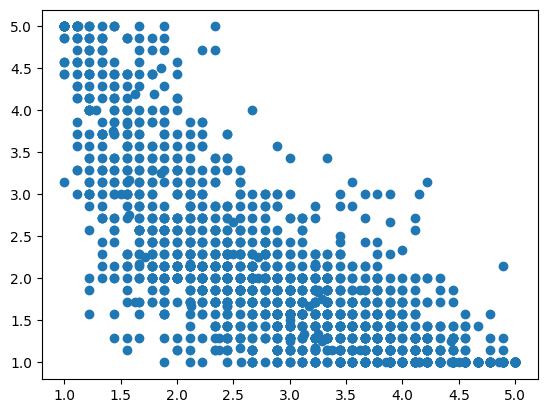

In [19]:
# Screen & Visualize boredom
%matplotlib inline
plt.scatter(df.MEAN_Enjoyment, df["MEAN_Boredom"])

In [20]:
# Check for missing values (NaNs)

df_variables.isna().any()

MEAN_Enjoyment    True
MEAN_Anxiety      True
MEAN_Boredom      True
dtype: bool

In [21]:
# deal with NaNs by filling them with mean values

df_variables.fillna(df_variables.mean())

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0           2.666667      2.000000      2.285714
1           3.111111      1.416667      1.142857
2           3.444444      2.833333      1.285714
3           1.777778      3.250000      3.142857
4           2.555556      1.250000      2.000000
...              ...           ...           ...
1762        1.444444      1.583333      3.857143
1763        4.444444      1.250000      1.142857
1764        4.333333      1.333333      1.428571
1765        3.333333      1.416667      2.000000
1766        3.888889      1.333333      1.142857

[1767 rows x 3 columns]

In [22]:
df_variables.isna().any()


MEAN_Enjoyment    True
MEAN_Anxiety      True
MEAN_Boredom      True
dtype: bool

In [23]:
df_variables.describe()

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
count     1755.000000   1755.000000   1755.000000
mean         2.920871      1.431386      2.028928
std          1.028757      0.528776      1.008056
min          1.000000      1.000000      1.000000
25%          2.111111      1.083333      1.285714
50%          2.888889      1.250000      1.857143
75%          3.666667      1.583333      2.428571
max          5.000000      4.833333      5.000000

In [24]:
df_variables.fillna(df_variables.mean(), inplace=True)

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables.fillna(df_variables.mean(), inplace=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables.fillna(df_variables.mean(), inplace=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [25]:
(2.920871 +	1.431386 +	2.028928) / 3

2.1270616666666666

In [26]:
df_variables.isna().any()

MEAN_Enjoyment    False
MEAN_Anxiety      False
MEAN_Boredom      False
dtype: bool

In [27]:
df_variables.head()

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.666667      2.000000      2.285714
1        3.111111      1.416667      1.142857
2        3.444444      2.833333      1.285714
3        1.777778      3.250000      3.142857
4        2.555556      1.250000      2.000000

In [28]:
df_studid_variables.isna().any()

STUDID            False
MEAN_Enjoyment     True
MEAN_Anxiety       True
MEAN_Boredom       True
dtype: bool

In [29]:
df.loc[:, variables] = df[variables].fillna(df[variables].mean())
df.head()

SCHOOLID     CLASSID        STUDID      TCH_ID_C  GRADE  SGender  SAge  \
0  246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
1  246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   
2  246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0  10.0   
3  246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   NaN   
4  246002.0  24600231.0  2.460023e+12  2.460020e+09    3.0      0.0   9.0   

   LANG  Books  AEQ1  ...  MEAN_Anxiety  MEAN_Boredom  MEAN_Enj_Class  \
0   3.0    2.0   4.0  ...      2.000000      2.285714            3.25   
1   3.0    4.0   4.0  ...      1.416667      1.142857            3.50   
2   2.0    2.0   4.0  ...      2.833333      1.285714            4.25   
3   4.0    5.0   2.0  ...      3.250000      3.142857            1.75   
4   4.0    4.0   3.0  ...      1.250000      2.000000            2.75   

   MEAN_Enj_HW  MEAN_Enj_Test  MEAN_Anx_Cl  MEAN_Anx_HW  MEAN_Anx_TEST  \
0          2.5       2.000000         1.25     1.666667            2.8   
1          3.0       2.666667         1.25     1.000000            1.8   
2          3.5       2.333333         1.75     2.000000            4.2   
3          2.0       1.666667         2.50     2.333333            4.4   
4          2.5       2.333333         1.00     1.333333            1.4   

   MEAN_Bor_Cl  MEAN_Bor_HW  
0         2.25     2.333333  
1         1.00     1.333333  
2         1.50     1.000000  
3         3.50     2.666667  
4         2.00     2.000000  

[5 rows x 56 columns]

In [30]:
df.isna().any()

SCHOOLID                      False
CLASSID                       False
STUDID                        False
TCH_ID_C                      False
GRADE                         False
SGender                        True
SAge                           True
LANG                           True
Books                          True
AEQ1                           True
AEQ2                           True
AEQ3                           True
AEQ4                           True
AEQ5                           True
AEQ6                           True
AEQ7                           True
AEQ8                           True
AEQ9                           True
AEQ10                          True
AEQ11                          True
AEQ12                          True
AEQ13                          True
AEQ14                          True
AEQ15                          True
AEQ16                          True
AEQ17                          True
AEQ18                          True
AEQ19                       

In [31]:
df.columns

Index(['SCHOOLID', 'CLASSID', 'STUDID', 'TCH_ID_C', 'GRADE', 'SGender', 'SAge',
       'LANG', 'Books', 'AEQ1', 'AEQ2', 'AEQ3', 'AEQ4', 'AEQ5', 'AEQ6', 'AEQ7',
       'AEQ8', 'AEQ9', 'AEQ10', 'AEQ11', 'AEQ12', 'AEQ13', 'AEQ14', 'AEQ15',
       'AEQ16', 'AEQ17', 'AEQ18', 'AEQ19', 'AEQ20', 'AEQ21', 'AEQ22', 'AEQ23',
       'AEQ24', 'AEQ25', 'AEQ26', 'AEQ27', 'AEQ28', 'MathWaveOneIRT',
       'PrimaryLast_duplicateFirst', 'filter_$', 'Missing', 'add_C', 'sub_C',
       'arithm', 'mul_C', 'MEAN_Enjoyment', 'MEAN_Anxiety', 'MEAN_Boredom',
       'MEAN_Enj_Class', 'MEAN_Enj_HW', 'MEAN_Enj_Test', 'MEAN_Anx_Cl',
       'MEAN_Anx_HW', 'MEAN_Anx_TEST', 'MEAN_Bor_Cl', 'MEAN_Bor_HW'],
      dtype='object')

In [32]:
df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]].max()

MEAN_Enjoyment    5.000000
MEAN_Anxiety      4.833333
MEAN_Boredom      5.000000
dtype: float64

2. Pre-processing 2 Make sure each relevant column is float:

In [33]:
df["MEAN_Enjoyment"] = df["MEAN_Enjoyment"].apply(lambda x: float(x))


In [34]:
df["MEAN_Anxiety"] = df["MEAN_Anxiety"].apply(lambda x: float(x))


In [35]:
df["MEAN_Boredom"] = df["MEAN_Boredom"].apply(lambda x: float(x))


In [36]:
df["STUDID"] = df["STUDID"].apply(lambda x: float(x))


In [37]:
df_main = ["STUDID", "MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]

In [38]:
# Convert the newly specified columns into a dataframe
df_main = pd.DataFrame(data)

In [39]:
df_main = df_main.apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

km = KMeans(n_clusters=3, n_init=100)
km

KMeans(n_clusters=3, n_init=100)

In [41]:
#model = KMeans[n_cluster=3, init = "K-means++"]

features = ["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]

In [42]:
#df_features = pd.DataFrame()

In [43]:
#y_predicted = km.fit_predict(df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]])
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw
# https://www.youtube.com/watch?v=EItlUEPCIzM
# https://www.youtube.com/watch?v=DqTclw2MzcM

In [44]:
# THIS https://www.youtube.com/watch?v=lX-3nGHDhQg
emotions = df.dropna(subset=features)

In [45]:
clustering_data = df[features].copy() 

In [46]:
clustering_data

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0           2.666667      2.000000      2.285714
1           3.111111      1.416667      1.142857
2           3.444444      2.833333      1.285714
3           1.777778      3.250000      3.142857
4           2.555556      1.250000      2.000000
...              ...           ...           ...
1762        1.444444      1.583333      3.857143
1763        4.444444      1.250000      1.142857
1764        4.333333      1.333333      1.428571
1765        3.333333      1.416667      2.000000
1766        3.888889      1.333333      1.142857

[1767 rows x 3 columns]

3. Create the K-means algorithm: initialize random centroids

In [47]:
# 1. Scale the data (no need)
# 2. Initialize random centroids
# 3. Label each data point
# 4. Update centroids
# 5. Repeate steps 3 and 4 until centroids stop changing

In [48]:
# 2 Initialize random centroids

#initialize one centroid

# iterate through each column with apply method
# select a single sample value from a column, randomly
# return it as float instead of the default series

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = clustering_data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    # combine all the pandas series (centroids) into a dataframe
    return pd.concat(centroids, axis=1)

In [49]:
centroids = random_centroids(clustering_data, 3)
centroids

0         1         2
MEAN_Enjoyment  2.555556  2.555556  3.888889
MEAN_Anxiety    1.083333  1.000000  1.000000
MEAN_Boredom    1.857143  1.428571  4.285714

In [50]:
#import random 
#centroid_2 = random.uniform(1.0,5.0)
#centroid_2

In [51]:
# 3. Label initial cluster points
# Calculate the Euclidean distance

def get_labels(clustering_data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((clustering_data - x) ** 2).sum(axis=1)))

    # Find the index (cluster)  assignment for each datapoint (student)
    return distances.idxmin(axis=1)

In [52]:
distances = centroids.apply(lambda x: np.sqrt(((clustering_data - x) ** 2).sum(axis=1)))

distances
# each number represents distance from a student to the cluster center
# in the first row (first student) the closest cluster to him/her is cluster 0.

0         1         2
0     1.017987  1.321756  2.548299
1     0.964343  0.750923  3.264368
2     2.044298  2.042460  3.543817
3     2.636749  2.933635  3.290199
4     0.219513  0.623723  2.657963
...        ...       ...       ...
1762  2.341915  2.733643  2.549365
1763  2.026298  1.926664  3.201358
1764  1.845716  1.808758  2.910654
1765  0.858171  1.051228  2.388879
1766  1.533128  1.403753  3.160484

[1767 rows x 3 columns]

In [53]:
labels = get_labels(clustering_data, centroids)

In [54]:
# How many students there are in each cluster?

labels.value_counts()


0    921
1    708
2    138
dtype: int64

In [55]:
# Let's update the centroids
# New_centroids of each cluster = Find all students and take geometric (Euclidean) mean of the points.
            # Multiply each point and take the nth root based on the number of points.
# Let's save memory, in that we don't get huge numbers.

# exp = e raised to a power
# log = natural logarithm: a number's logarithm to the base of its constant e.
# Split the data into groups based on their labels before applying. Each "labels" series gives the cluster assignement.
clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))


MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.371392      1.446627      2.243024
1        3.657102      1.190486      1.173191
2        1.520349      1.788481      4.411252

In [56]:
# Switch columns and rows. (Transpose.) So that it is similar to the initial random centroids.
# Wrap it into a function
def new_centroids(clustering_data, labels, k):
    return clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    


In [57]:
clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

0         1         2
MEAN_Enjoyment  2.371392  3.657102  1.520349
MEAN_Anxiety    1.446627  1.190486  1.788481
MEAN_Boredom    2.243024  1.173191  4.411252

5. Repeat the process with algorithm (and visualize)

In [58]:
# 5. Create the iterative algorithm that repeats the process
# For cool points, let's create visualisation of the cluster assignment at each iteration

from sklearn.decomposition import PCA # Turn the 3-dimensional data to 2-dimensional data
import matplotlib.pyplot as plt 
from IPython.display import clear_output # clear jupyter notebook each time we plot




In [59]:
K = 3
centers = K

def plot_clusters(clustering_data, labels, centroids, iteration): # iteration counter
    pca = PCA(n_components=2) # Ask for 2-dimensional (2 columns) data
    data_2d = pca.fit_transform(clustering_data) # Fit the model, then run the model that turns it into 2-d.
    centroids_2d = pca.fit_transform(centroids.T) # Transpose needed because The PCA model expects columns = features, and rows = datapoints
    clear_output(wait=True) # if graph displayed, clear it.
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) # x-axis is the 2-d data and y-axis 2-d data second component. Color based on cluster labels.
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) # plot the centroids
    plt.show()


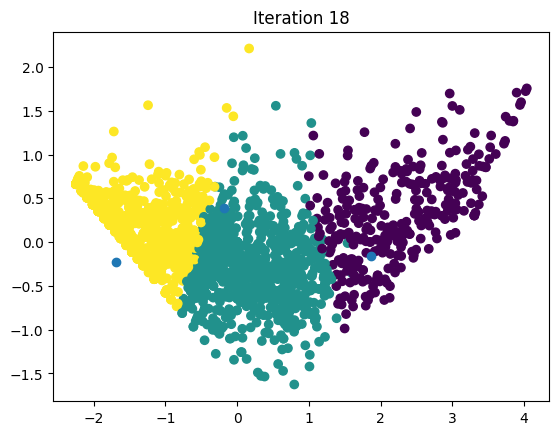

In [60]:
max_iterations = 100
k = 3

# Let's Stop the algorithm once old_centroids is equal to  centroids, when the centroids have stabilized

centroids = random_centroids(clustering_data, k) # initialize cluster centorids

old_centroids = pd.DataFrame() # initialize the old centroids.
iteration = 1

# stop iteration either when iteration = iteration, or centroids = old_centroids.
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(clustering_data, centroids) # get labels correspongind to each student
    centroids = new_centroids(clustering_data, labels, k)
    plot_clusters(clustering_data, labels, centroids, iteration)

    iteration += 1


In [61]:
centroids

# 0 = POSITIVE , 1 = NEGATIVE , 2 = MODERATE

0         1         2
MEAN_Enjoyment  1.529623  2.506489  3.974103
MEAN_Anxiety    1.724042  1.371911  1.202897
MEAN_Boredom    3.756564  1.906494  1.225190

In [62]:
# interpretation. Cluster 0 is the positive cluster. Let's try to confirm the hypothesis.
# Looking at the cluster no 0.
df[labels ==0][["STUDID"] + features]

STUDID  MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
3     2.460023e+12        1.777778      3.250000      3.142857
12    2.460023e+12        1.000000      3.416667      4.428571
21    2.460024e+12        1.888889      2.250000      3.142857
23    2.460024e+12        1.777778      1.416667      4.428571
27    2.460024e+12        1.555556      1.250000      3.571429
...            ...             ...           ...           ...
1739  2.460494e+12        1.777778      1.416667      3.428571
1748  2.460503e+12        1.111111      3.083333      4.857143
1758  2.460504e+12        2.111111      1.166667      3.000000
1759  2.460504e+12        1.222222      3.583333      4.428571
1762  2.460504e+12        1.444444      1.583333      3.857143

[309 rows x 4 columns]

In [63]:
# Cluster 1 seems to be bored and sliiightly anxious students
# Let's see what the students look like:
df[labels ==1][["STUDID"] + features]

# in this view anxiety seems to be comparatively high in half of the sample cases.

STUDID  MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0     2.460023e+12        2.666667      2.000000      2.285714
4     2.460023e+12        2.555556      1.250000      2.000000
6     2.460023e+12        2.888889      1.166667      1.000000
7     2.460023e+12        1.888889      1.583333      1.571429
9     2.460023e+12        2.666667      2.250000      2.000000
...            ...             ...           ...           ...
1755  2.460503e+12        3.111111      1.000000      1.428571
1757  2.460504e+12        3.111111      1.083333      2.714286
1760  2.460504e+12        3.222222      1.666667      2.000000
1761  2.460504e+12        2.111111      1.166667      2.000000
1765  2.460504e+12        3.333333      1.416667      2.000000

[807 rows x 4 columns]

In [64]:
# From the centroids, cluster 2 seems to be a moderate profile. Somewhat lower enjoymnent than positive profile, not as high boredom and anxiety than the negative profile.
df[labels ==2][["STUDID"] + features]

STUDID  MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
1     2.460023e+12        3.111111      1.416667      1.142857
2     2.460023e+12        3.444444      2.833333      1.285714
5     2.460023e+12        4.777778      1.000000      1.000000
8     2.460023e+12        4.444444      1.166667      1.285714
15    2.460023e+12        4.666667      1.083333      1.000000
...            ...             ...           ...           ...
1753  2.460503e+12        3.333333      1.166667      1.428571
1756  2.460504e+12        4.222222      1.083333      1.000000
1763  2.460504e+12        4.444444      1.250000      1.142857
1764  2.460504e+12        4.333333      1.333333      1.428571
1766  2.460504e+12        3.888889      1.333333      1.142857

[651 rows x 4 columns]

K-means cluster analysis with NumPy array

In [65]:
# compare the result to sklearn's Kmeans function

from sklearn.cluster import KMeans

In [66]:
K=3
kmeans = KMeans(n_clusters=K, random_state=3, n_init=50, init="random")
kmeans


KMeans(init='random', n_clusters=3, n_init=50, random_state=3)

In [67]:
X = clustering_data

kmeans = KMeans(n_clusters=3, random_state=3, n_init=60, init="random")
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=60, random_state=3)

K-means cluster analysis with X as a Pandas DataFrame (not NumPy array)

In [68]:
import pandas as pd
from sklearn.cluster import KMeans

X = clustering_data

K = 3
kmeans = KMeans(n_clusters=K, random_state=3, n_init=60, init="random")
kmeans.fit(X)

# Get centers
centroids = kmeans.cluster_centers_

# Convert to DataFrame
centers_df = pd.DataFrame(centroids, columns=X.columns)

centers_df

MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.567648      1.416775      1.969208
1        1.570540      1.903497      3.846013
2        4.020911      1.227019      1.246893

In [69]:
X.columns

Index(['MEAN_Enjoyment', 'MEAN_Anxiety', 'MEAN_Boredom'], dtype='object')

-2025 Heatmap and other visualizations-

In [70]:
# Add cluster numbers from kmeans to each student
clustering_data["Cluster"] = kmeans.labels_

In [71]:
cluster_centers = clustering_data.groupby("Cluster").mean()

In [72]:
# Calculate cluster averages using df
cluster_centers = clustering_data.groupby("Cluster")[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]].mean()

In [73]:
import seaborn as sns

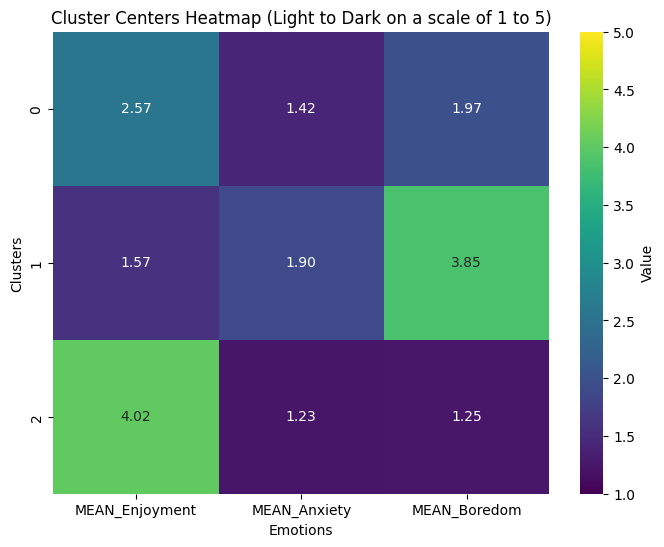

In [74]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_centers, annot=True, cmap="viridis", cbar_kws={'label': 'Value'}, vmin=1, vmax=5, fmt=".2f")

# Add titles and labels
plt.title("Cluster Centers Heatmap (Light to Dark on a scale of 1 to 5)")
plt.ylabel("Clusters")
plt.xlabel("Emotions")
plt.show()

In [75]:
non_mean_clustering_data = clustering_data.groupby("Cluster")


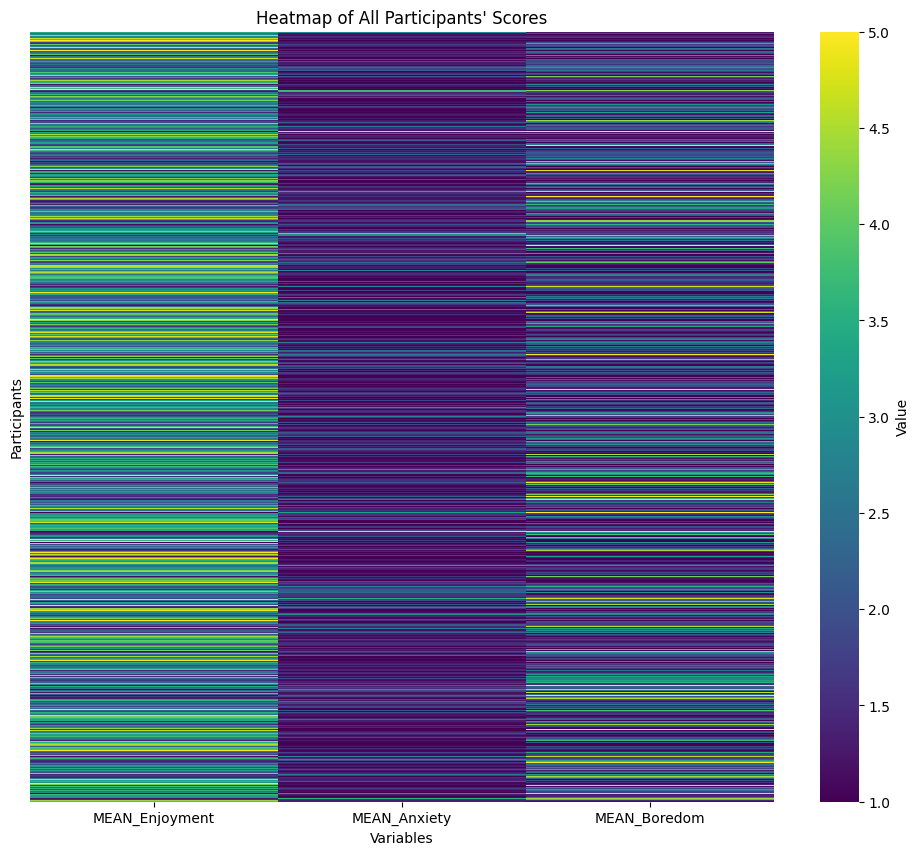

In [76]:
# Select relevant columns for the heatmap
participant_data = df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(participant_data, cmap="viridis", cbar_kws={"label": "Value"}, yticklabels=False)
plt.title("Heatmap of All Participants' Scores")
plt.xlabel("Variables")
plt.ylabel("Participants")
plt.show()

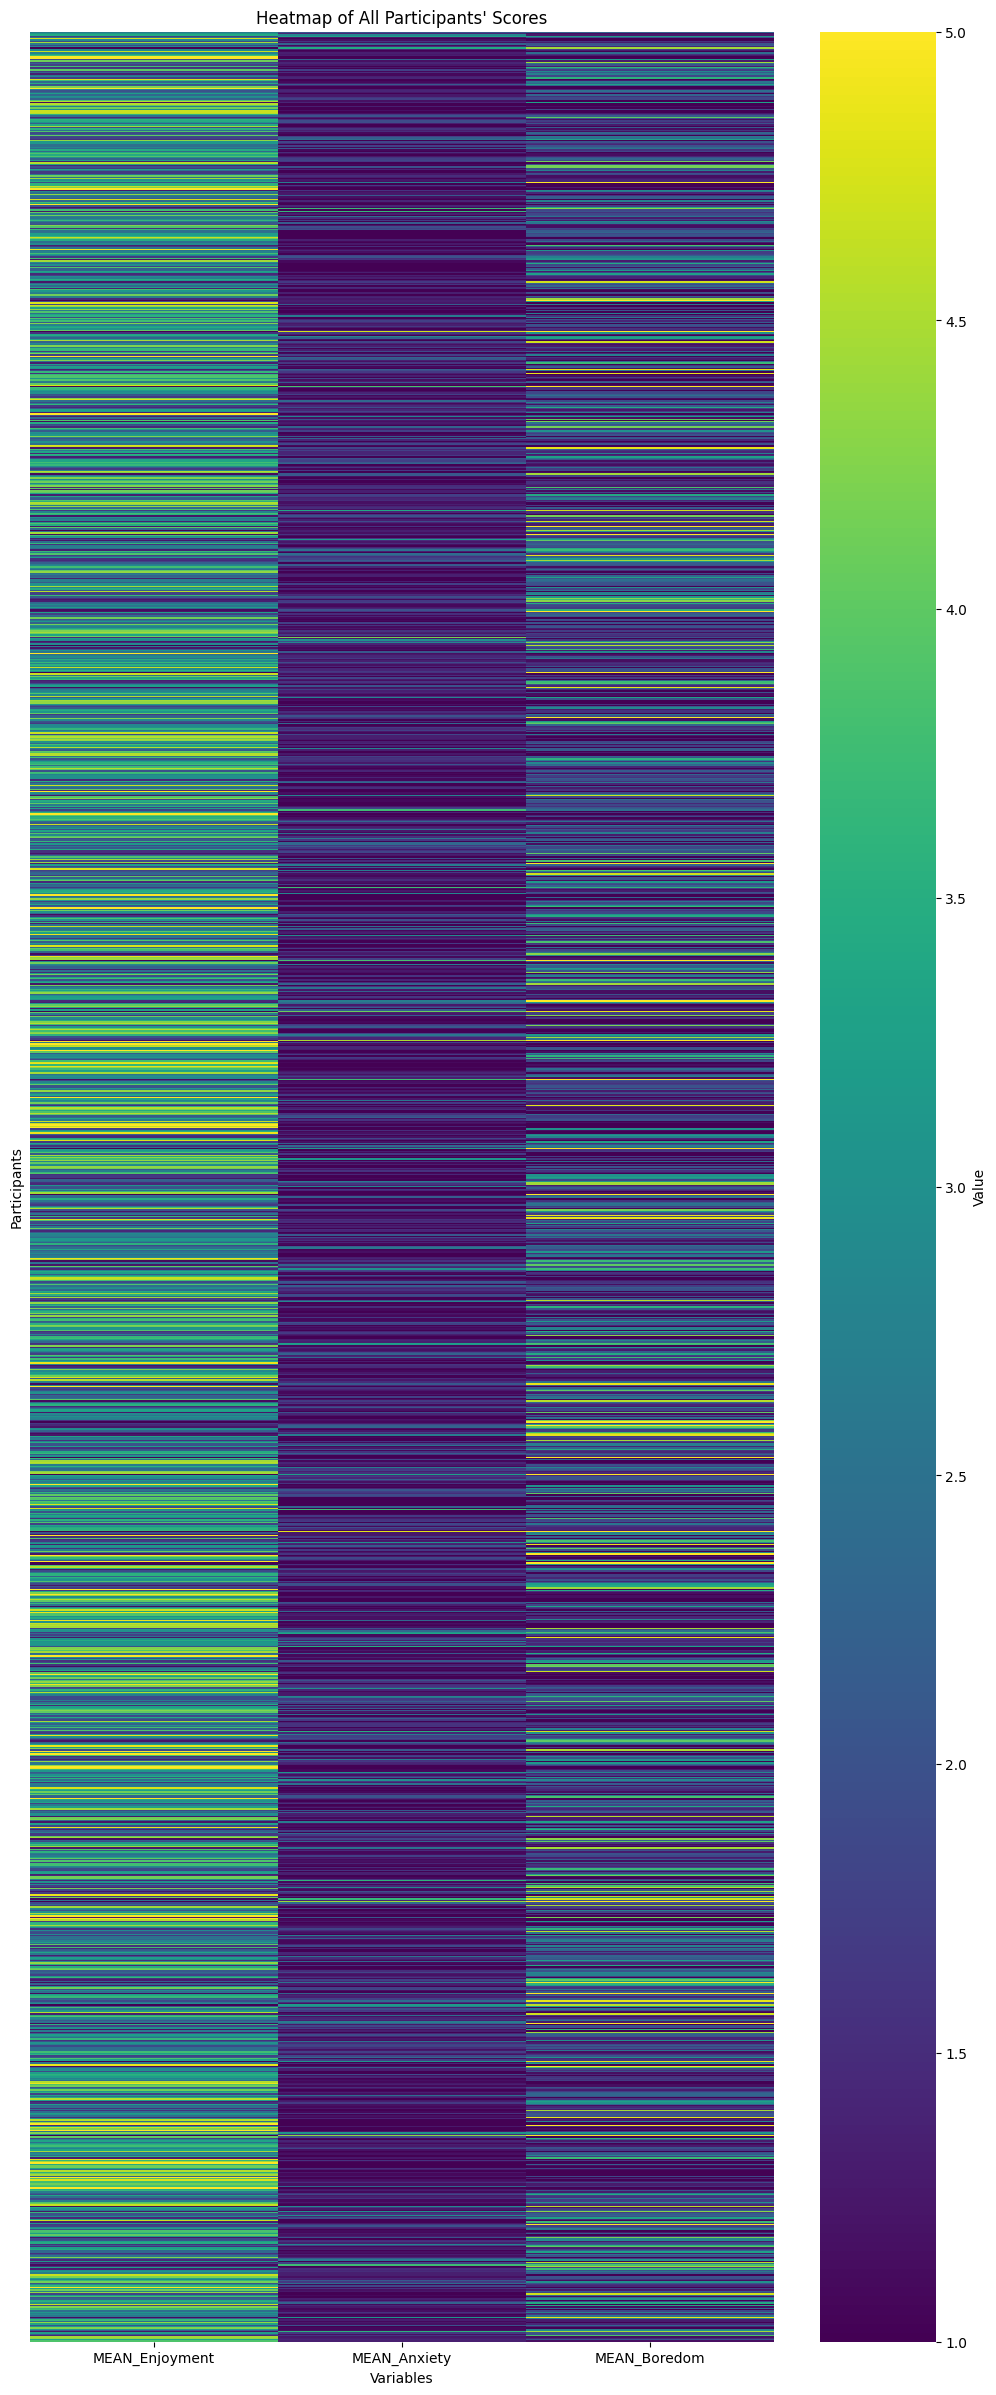

In [77]:
# Select relevant columns for the heatmap
participant_data = df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
plt.figure(figsize=(12, 30))
sns.heatmap(participant_data, cmap="viridis", cbar_kws={"label": "Value"}, yticklabels=False)
plt.title("Heatmap of All Participants' Scores")
plt.xlabel("Variables")
plt.ylabel("Participants")
plt.show()

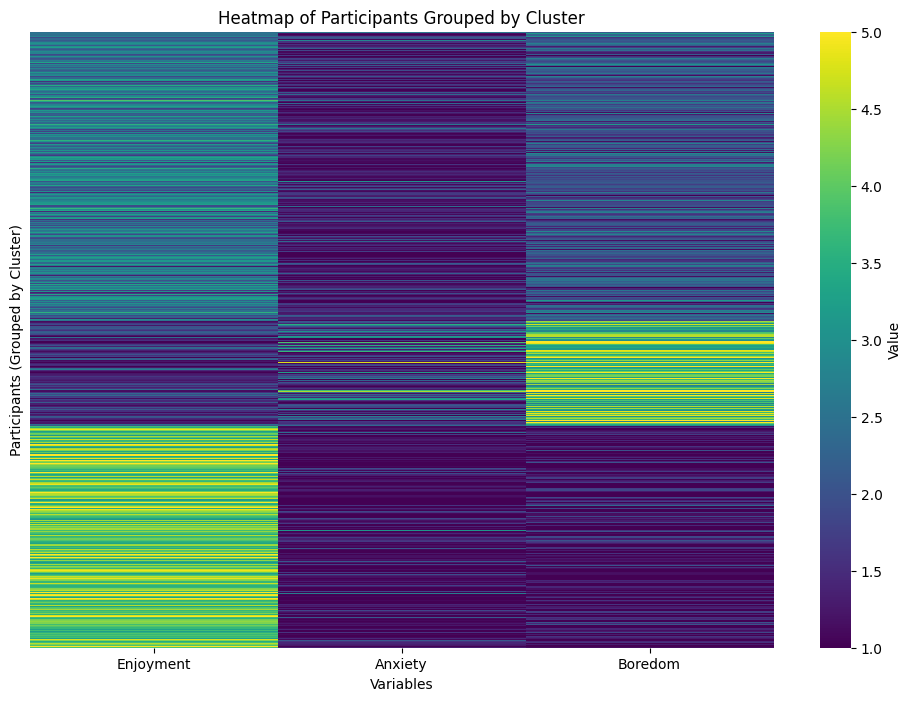

In [78]:
# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="viridis",  # Light to dark color scale
    cbar_kws={"label": "Value"},
    yticklabels=False,  # Hide individual participant labels
    xticklabels=["Enjoyment", "Anxiety", "Boredom"],  # Label columns
    vmin=1,
    vmax=5
)

# Add titles and labels
plt.title("Heatmap of Participants Grouped by Cluster")
plt.xlabel("Variables")
plt.ylabel("Participants (Grouped by Cluster)")
plt.show()

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2693575202.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


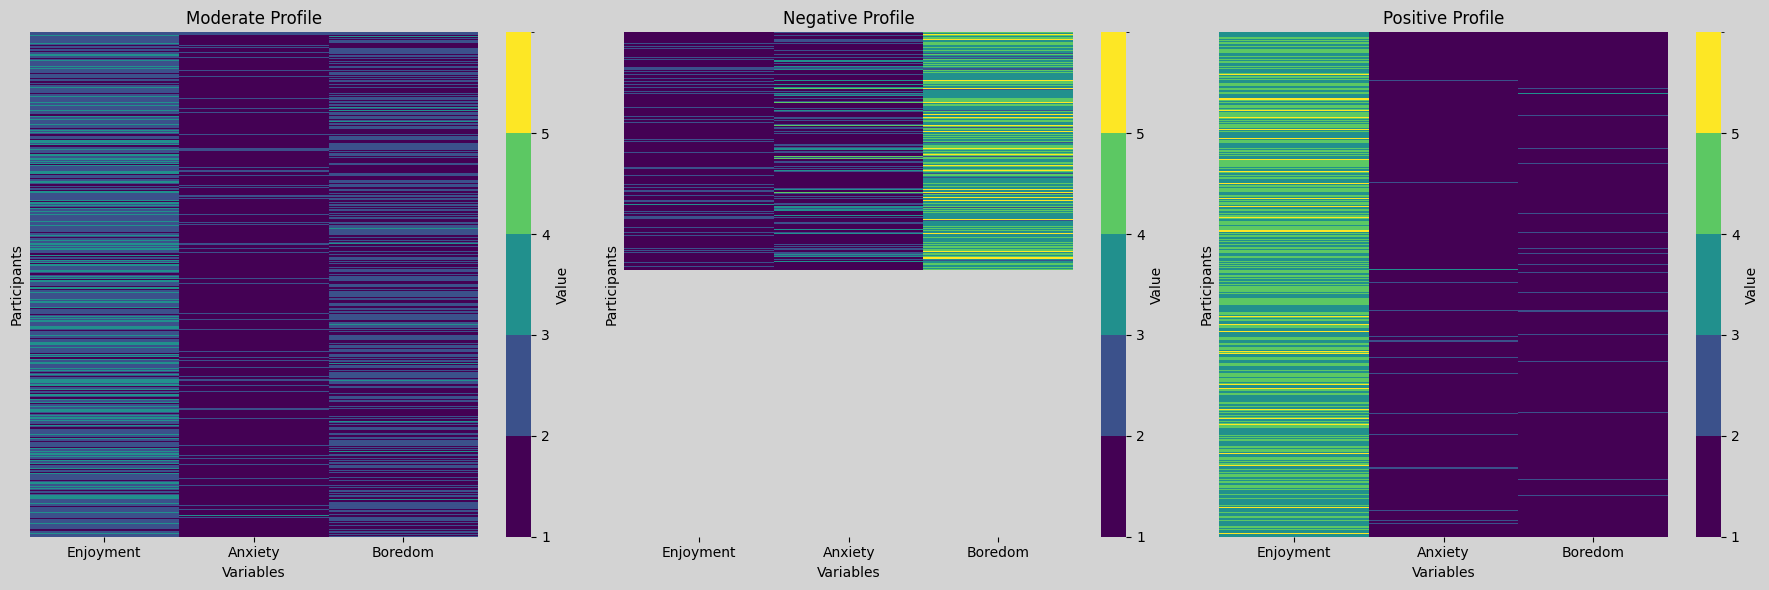

In [79]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Custom titles for each cluster
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Set up the figure with 3 subplots (one for each cluster)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)
fig.patch.set_facecolor('lightgrey')

# Properly get the Viridis colormap
cmap = cm.get_cmap("viridis")

# Define consistent color scale
vmin, vmax = 1, 5
bounds = [1, 2, 3, 4, 5, 6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Loop through each cluster and plot
for i, cluster in enumerate(sorted_data['Cluster'].unique()):
    cluster_data = heatmap_data[sorted_data['Cluster'] == cluster]

    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        norm=norm,
        cbar=True,
        cbar_kws={"label": "Value", "ticks": [1, 2, 3, 4, 5]},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"],
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_xlabel("Variables")
    axes[i].set_ylabel("Participants")

plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1918264704.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


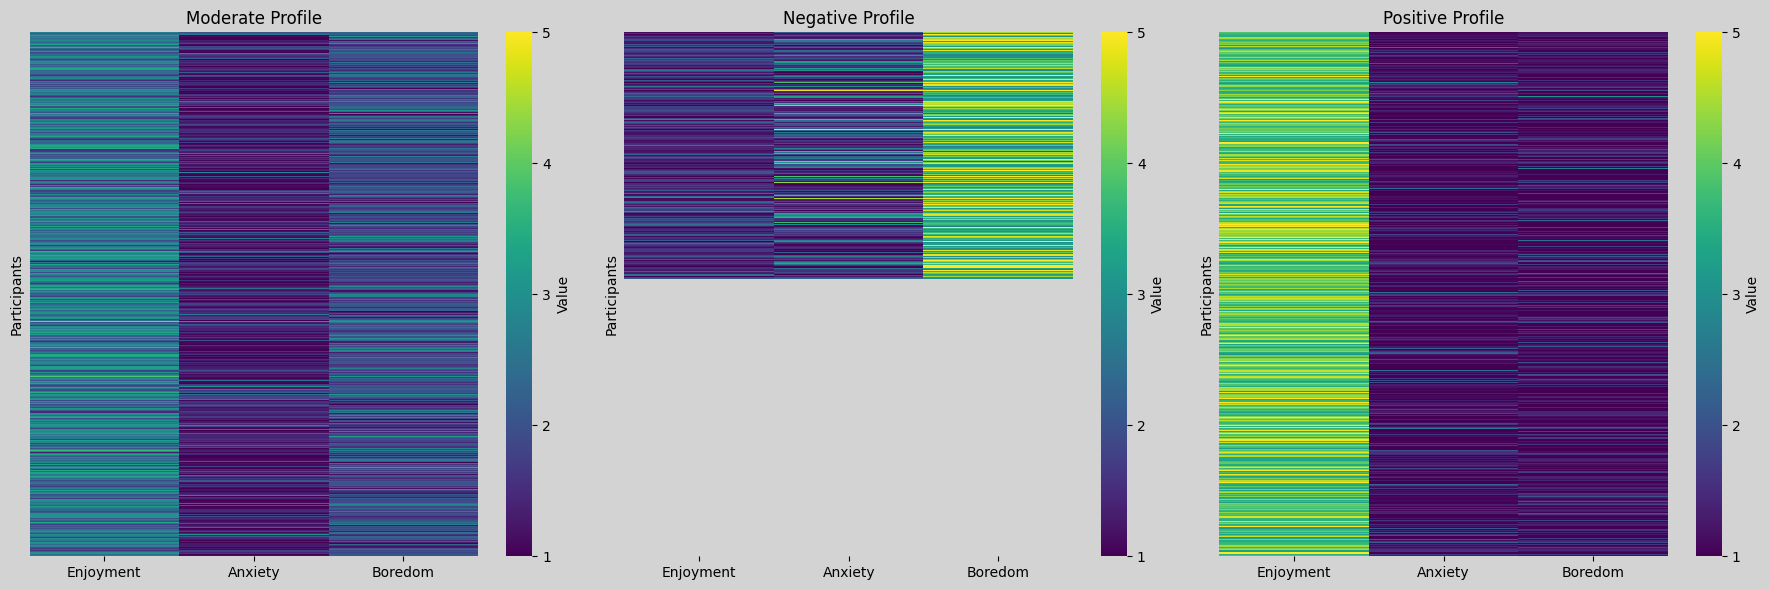

In [80]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Custom titles for each cluster
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Set up the figure with 3 subplots (one for each cluster)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)
fig.patch.set_facecolor('lightgrey')

# Use the continuous viridis colormap
cmap = cm.get_cmap("viridis")

# Define value range
vmin, vmax = 1, 5
ticks = [1, 2, 3, 4, 5]

# Loop through each cluster and plot
for i, cluster in enumerate(sorted_data['Cluster'].unique()):
    cluster_data = heatmap_data[sorted_data['Cluster'] == cluster]

    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={
            "label": "Value",
            "ticks": ticks,
            "boundaries": None,
            "spacing": "uniform"
        },
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_ylabel("Participants")

plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2003551420.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


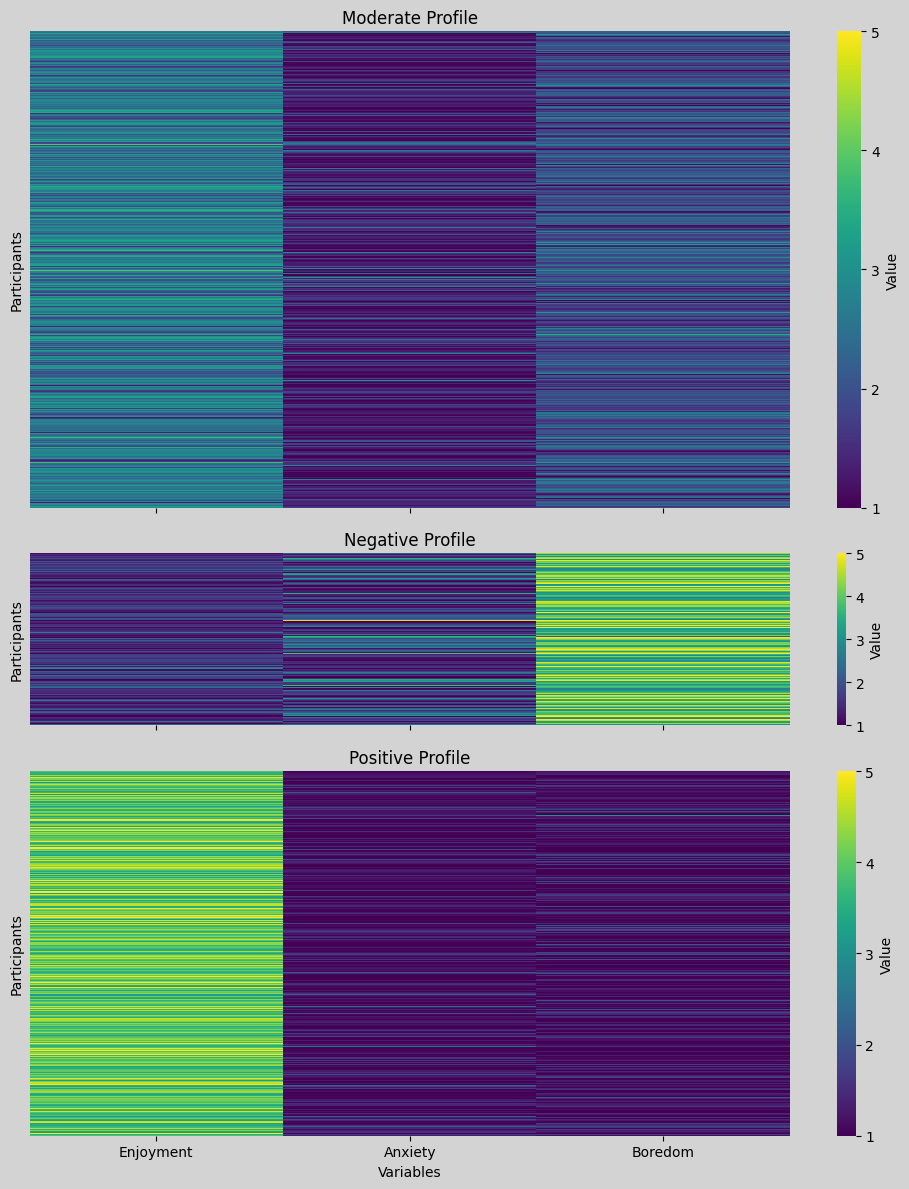

In [81]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Custom titles for each cluster
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Get student counts per cluster to determine height ratios
cluster_counts = sorted_data["Cluster"].value_counts().sort_index()
height_ratios = cluster_counts.values.tolist()

# Set up vertically stacked subplots with height ratios
fig, axes = plt.subplots(
    nrows=3, ncols=1, figsize=(10, 12),
    sharex=True,
    gridspec_kw={"height_ratios": height_ratios}
)
fig.patch.set_facecolor('lightgrey')

# Use continuous viridis colormap
cmap = cm.get_cmap("viridis")

# Define value range and ticks
vmin, vmax = 1, 5
ticks = [1, 2, 3, 4, 5]

# Plot each cluster's heatmap
for i, cluster in enumerate(cluster_counts.index):
    cluster_data = heatmap_data[sorted_data['Cluster'] == cluster]
    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Value", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_ylabel("Participants")

axes[-1].set_xlabel("Variables")
plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2031982522.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


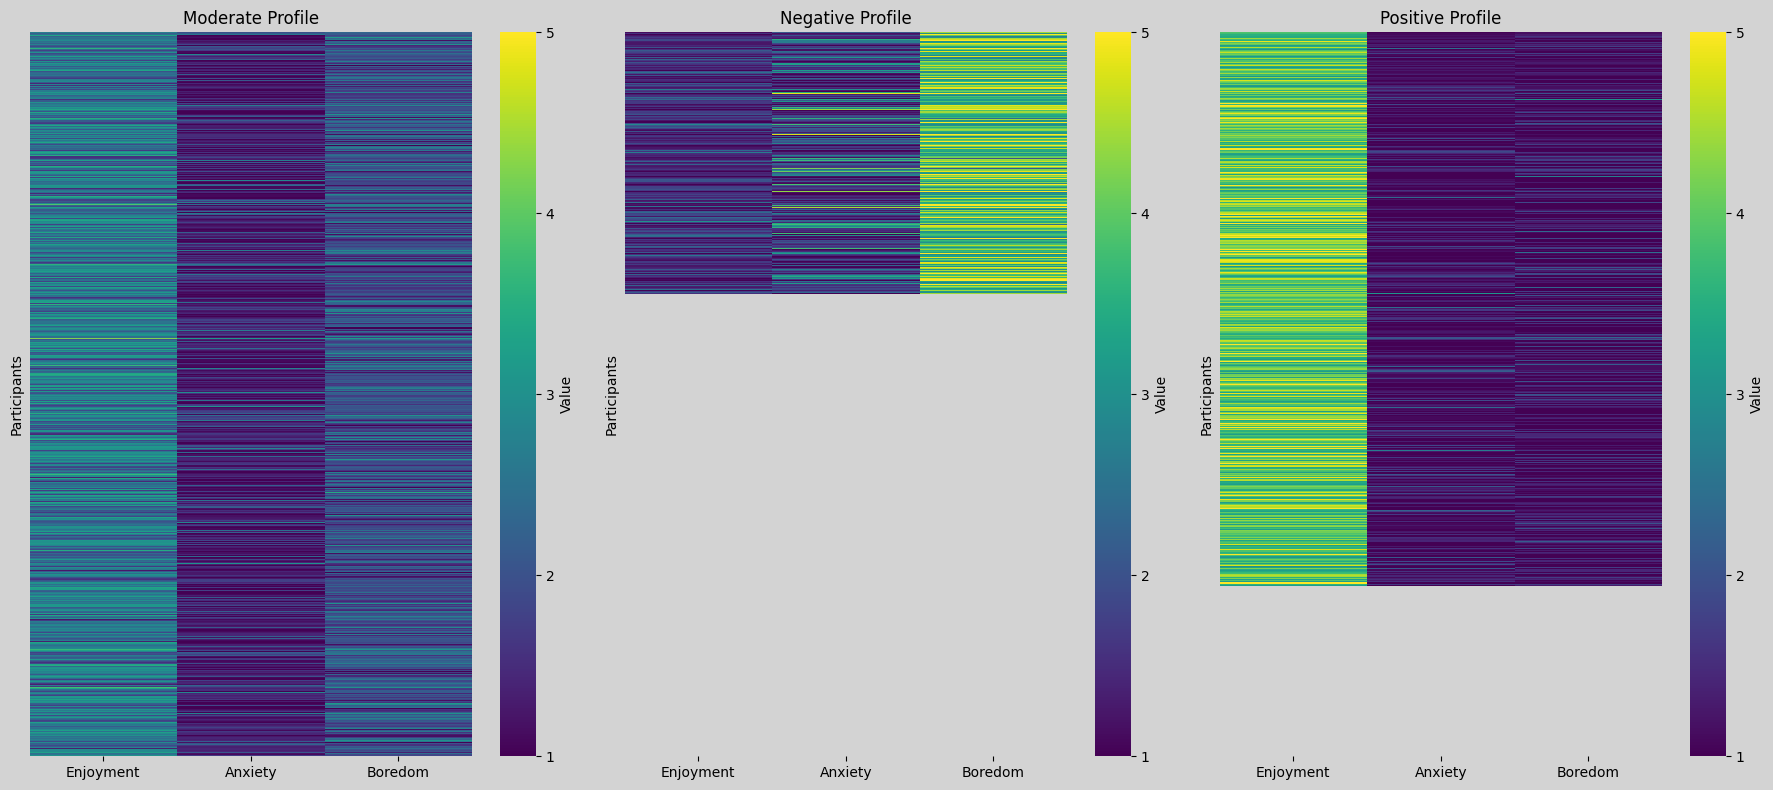

In [82]:
# MAKE AN ESTIMATE OF RATIOS OF HEIGHTS OF EACH PROFIEL

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd

# Sort and group
sorted_data = clustering_data.sort_values(by="Cluster")
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Titles
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Count students per cluster
cluster_counts = sorted_data["Cluster"].value_counts().sort_index()
max_count = cluster_counts.max()

# Set up figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8), sharey=True)
fig.patch.set_facecolor('lightgrey')

# Viridis color map
cmap = cm.get_cmap("viridis")
vmin, vmax = 1, 5
ticks = [1, 2, 3, 4, 5]

# Plot each cluster
for i, cluster in enumerate(cluster_counts.index):
    cluster_mask = sorted_data['Cluster'] == cluster
    cluster_data = heatmap_data[cluster_mask]

    # Pad with NaNs to equalize height across subplots
    pad_size = max_count - len(cluster_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=cluster_data.columns)
        cluster_data = pd.concat([cluster_data, padding], ignore_index=True)

    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Value", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_ylabel("Participants")

axes[0].set_ylabel("Participants")
plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\4210830321.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


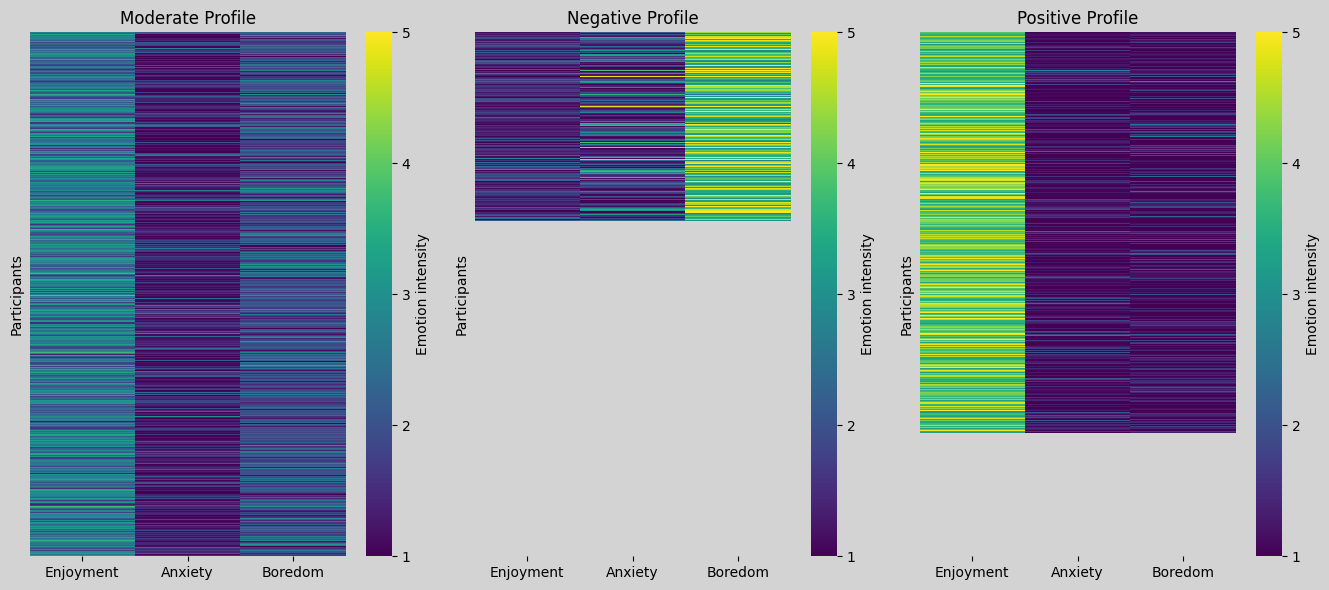

In [83]:
# MAKE AN ESTIMATE OF RATIOS OF HEIGHTS OF EACH PROFIEL

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd

# Sort and group
sorted_data = clustering_data.sort_values(by="Cluster")
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Titles
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Count students per cluster
cluster_counts = sorted_data["Cluster"].value_counts().sort_index()
max_count = cluster_counts.max()

# Set up figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13.5, 6), sharey=True)
fig.patch.set_facecolor('lightgrey')

# Viridis color map
cmap = cm.get_cmap("viridis")
vmin, vmax = 1, 5
ticks = [1, 2, 3, 4, 5]

# Plot each cluster
for i, cluster in enumerate(cluster_counts.index):
    cluster_mask = sorted_data['Cluster'] == cluster
    cluster_data = heatmap_data[cluster_mask]

    # Pad with NaNs to equalize height across subplots
    pad_size = max_count - len(cluster_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=cluster_data.columns)
        cluster_data = pd.concat([cluster_data, padding], ignore_index=True)

    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Emotion intensity", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_ylabel("Participants")

axes[0].set_ylabel("Participants")
plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3183637443.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = cm.get_cmap("viridis", 256)


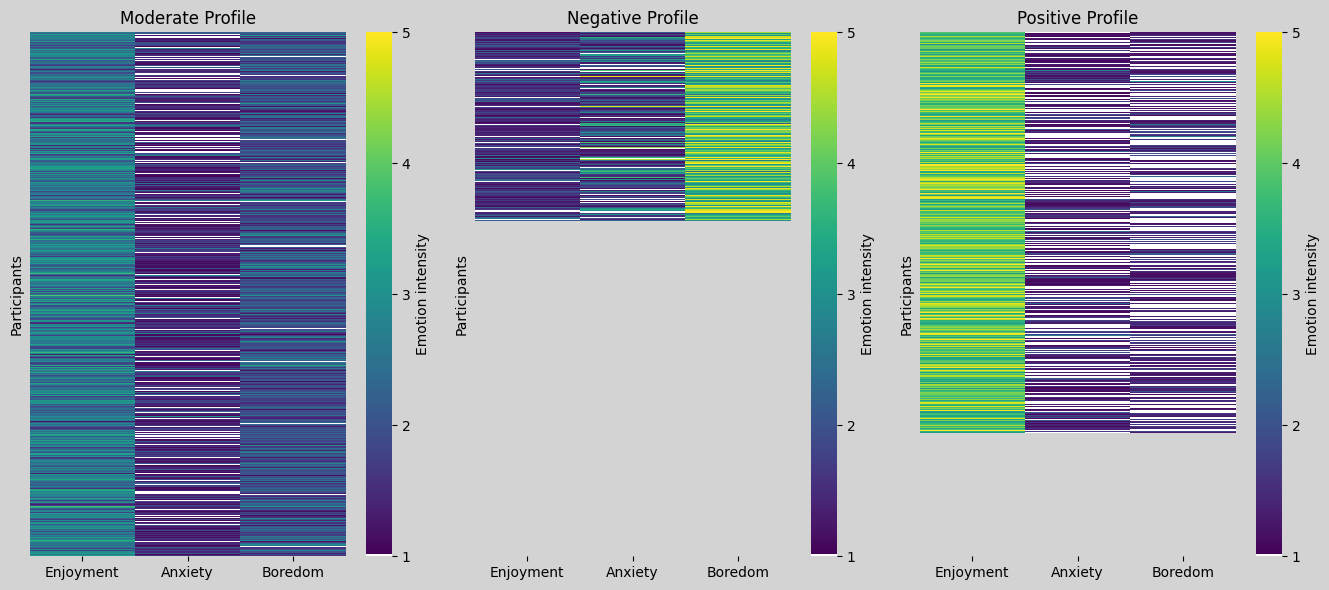

In [84]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Sort and group
sorted_data = clustering_data.sort_values(by="Cluster")
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Titles
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Count students per cluster
cluster_counts = sorted_data["Cluster"].value_counts().sort_index()
max_count = cluster_counts.max()

# Set up figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13.5, 6), sharey=True)
fig.patch.set_facecolor('lightgrey')

# Create custom colormap: white for 1.0, viridis otherwise
base_cmap = cm.get_cmap("viridis", 256)
colors = base_cmap(np.linspace(0, 1, 256))

# Get index in color array corresponding to value 1.0 (relative position in range 1–5)
value_for_white = 1.0
vmin, vmax = 1, 5
index_for_white = int((value_for_white - vmin) / (vmax - vmin) * 255)
colors[index_for_white] = [1, 1, 1, 1]  # Set to white (RGBA)

# Create the new colormap
custom_cmap = mcolors.ListedColormap(colors)
ticks = [1, 2, 3, 4, 5]

# Plot each cluster
for i, cluster in enumerate(cluster_counts.index):
    cluster_mask = sorted_data['Cluster'] == cluster
    cluster_data = heatmap_data[cluster_mask]

    # Pad with NaNs to equalize height
    pad_size = max_count - len(cluster_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=cluster_data.columns)
        cluster_data = pd.concat([cluster_data, padding], ignore_index=True)

    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=custom_cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Emotion intensity", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_ylabel("Participants")

axes[0].set_ylabel("Participants")
plt.tight_layout()
plt.show()


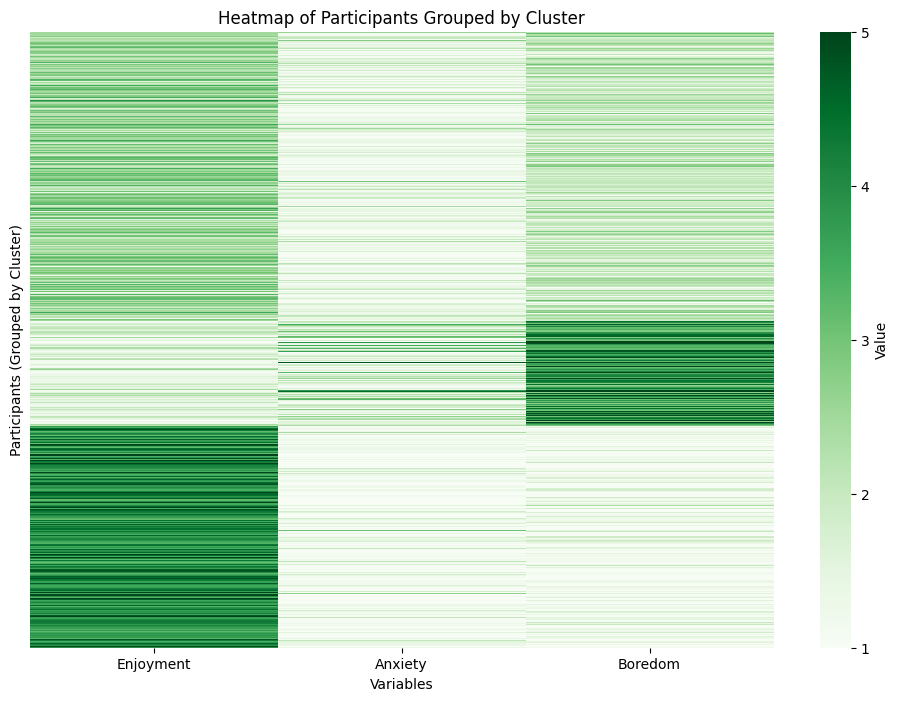

In [85]:
# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # Light to dark color scale
    cbar_kws={"label": "Value", "ticks": [1, 2, 3, 4, 5]},
    yticklabels=False,  # Hide individual participant labels
    xticklabels=["Enjoyment", "Anxiety", "Boredom"],  # Label columns
    vmin=1,
    vmax=5
)

# Add titles and labels
plt.title("Heatmap of Participants Grouped by Cluster")
plt.xlabel("Variables")
plt.ylabel("Participants (Grouped by Cluster)")
plt.show()

(moved to another backup file the rest of this file) The following in this file are visualizations only

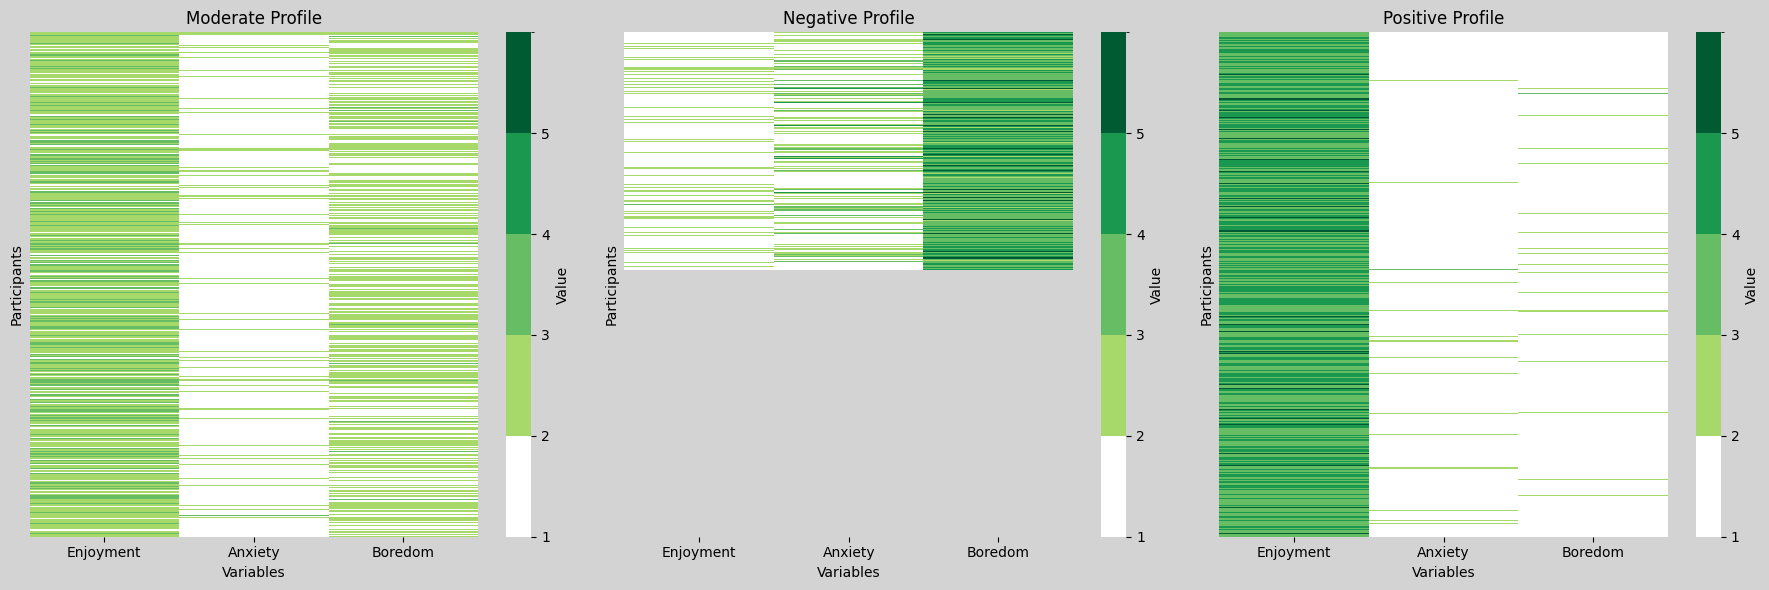

In [86]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Sorting the data by cluster membership
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Custom titles for each cluster
cluster_titles = {
    0: "Moderate Profile",
    1: "Negative Profile",
    2: "Positive Profile"
}

# Set up the figure with 3 subplots (one for each cluster)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)

# Set figure background to grey
fig.patch.set_facecolor('lightgrey')

# Define a green gradient colormap for 5 distinct values (from light green to dark green)
colors = ["#ffffff", "#a6d96a", "#66bd63", "#1a9850", "#005a32"]  # Light to dark green
cmap = mcolors.ListedColormap(colors)
bounds = [1, 2, 3, 4, 5, 6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Define a consistent color scale
vmin, vmax = 1, 5

# Loop through each cluster and plot separately
for i, cluster in enumerate(sorted_data['Cluster'].unique()):
    cluster_data = heatmap_data[sorted_data['Cluster'] == cluster]

    # Set axis background to grey
    axes[i].set_facecolor('lightgrey')

    sns.heatmap(
        cluster_data,
        ax=axes[i],
        cmap=cmap,
        norm=norm,
        cbar=True,
        cbar_kws={"label": "Value", "ticks": [1, 2, 3, 4, 5]},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"],
        vmin=vmin,
        vmax=vmax
    )

    # Set custom title and labels
    axes[i].set_title(cluster_titles.get(cluster, f"Cluster {cluster}"))
    axes[i].set_xlabel("Variables")
    axes[i].set_ylabel("Participants")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


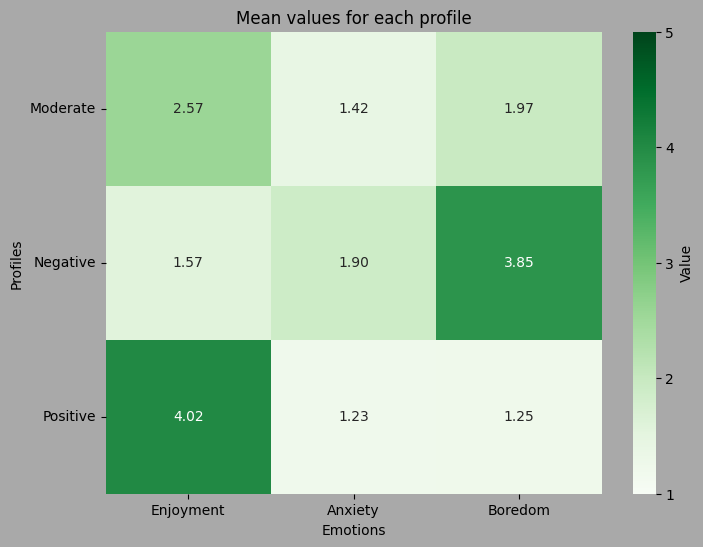

In [87]:
# Heatmap
plt.figure(figsize=(8, 6), facecolor='#a9a9a9')  # Grey figure background
ax = plt.gca()  # Get the current axes

# Set the axes background color
ax.set_facecolor("#a9a9a9")  # Grey background for the heatmap

# Create heatmap
sns.heatmap(
    cluster_centers,
    annot=True,
    cmap="Greens",
    cbar_kws={'label': 'Value', 'ticks': [1, 2, 3, 4, 5]},
    vmin=1,
    vmax=5,
    fmt=".2f"
)

# Set custom axis labels and center them
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(["Enjoyment", "Anxiety", "Boredom"], ha='center')

ax.set_yticks([0.5, 1.5, 2.5])
ax.set_yticklabels(["Moderate", "Negative", "Positive"], va='center', rotation=0)

# Add titles and labels
plt.title("Mean values for each profile")
plt.ylabel("Profiles")
plt.xlabel("Emotions")
plt.show()


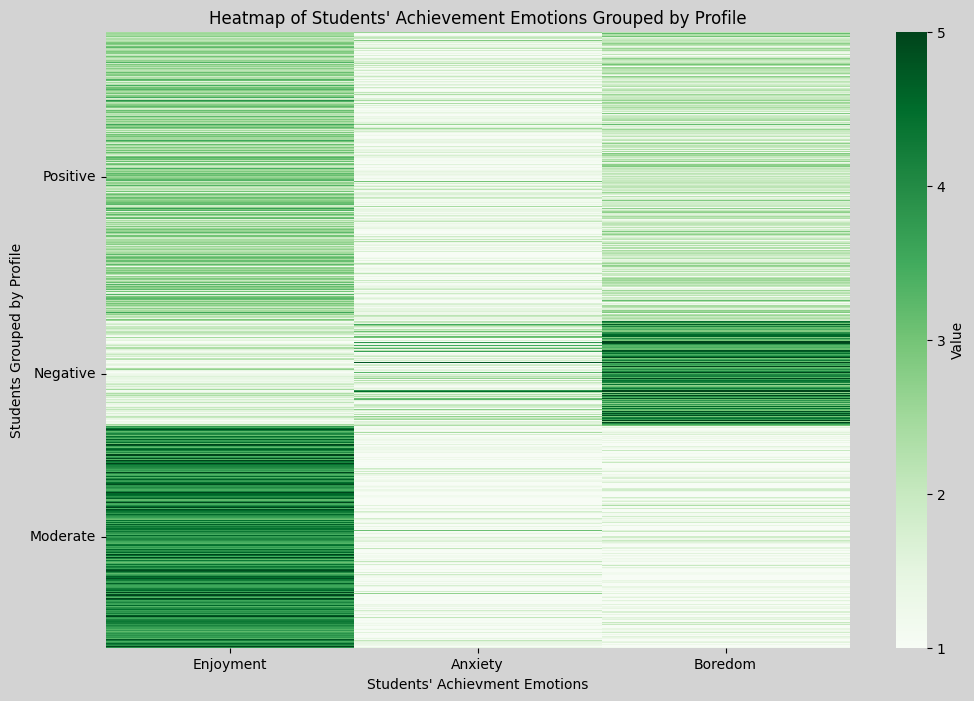

In [88]:
# Sorting the data by cluster membership 
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#d3d3d3')  # Grey figure background
ax = fig.add_subplot()
ax.set_facecolor('#d3d3d3')  # Light grey axes background

# Plot heatmap
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # Light to dark color scale
    cbar_kws={"label": "Value", "ticks": [1, 2, 3, 4, 5]},  # Set ticks on colorbar
    yticklabels=False,  # We'll manually set y-axis labels
    xticklabels=["Enjoyment", "Anxiety", "Boredom"],
    vmin=1,
    vmax=5,
    ax=ax
)

# Count participants per cluster to find vertical centers
cluster_counts = sorted_data['Cluster'].value_counts().sort_index()
cumulative_counts = cluster_counts.cumsum()
centers = [0] + list(cumulative_counts[:-1])
center_positions = [start + count / 2 for start, count in zip(centers, cluster_counts)]

# Custom y-axis labels from bottom to top (cluster 2 to 0)
y_labels = ['Positive', 'Negative', 'Moderate']
ax.set_yticks(center_positions)
ax.set_yticklabels(y_labels, va='center')

# Add titles and labels
plt.title("Heatmap of Students' Achievement Emotions Grouped by Profile")
plt.xlabel("Students' Achievment Emotions")
plt.ylabel("Students Grouped by Profile")
plt.show()


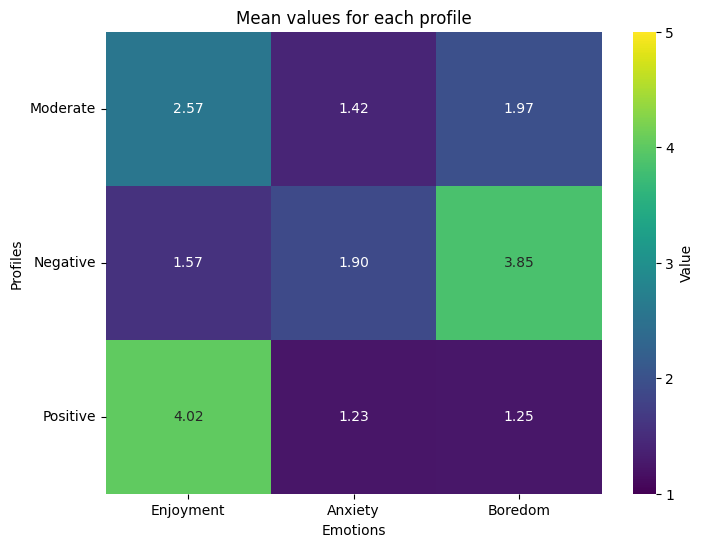

In [89]:
# Heatmap
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#f0f0f0")  # Light grey background

# Create heatmap
sns.heatmap(
    cluster_centers,
    annot=True,
    cmap="viridis",
    cbar_kws={'label': 'Value', 'ticks': [1, 2, 3, 4, 5]},
    vmin=1,
    vmax=5,
    fmt=".2f"
)

# Set custom axis labels and center them
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(["Enjoyment", "Anxiety", "Boredom"], ha='center')

ax.set_yticks([0.5, 1.5, 2.5])
ax.set_yticklabels(["Moderate", "Negative", "Positive"], va='center', rotation=0)

# Add titles and labels
plt.title("Mean values for each profile")
plt.ylabel("Profiles")
plt.xlabel("Emotions")
plt.show()


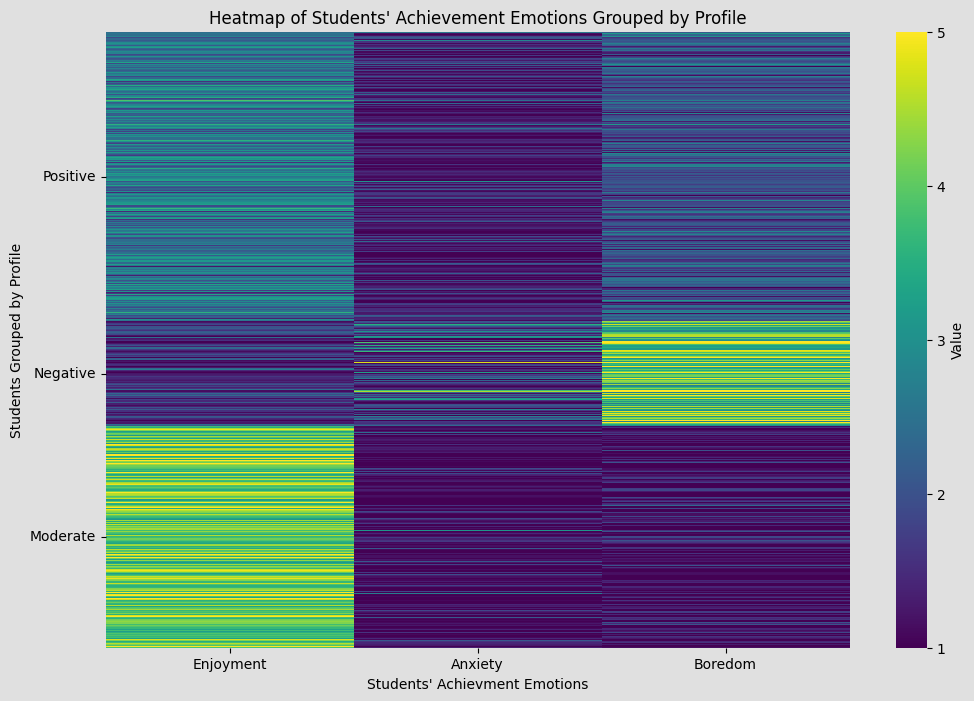

In [90]:
# Sorting the data by cluster membership 
sorted_data = clustering_data.sort_values(by="Cluster")

# Select relevant variables for the heatmap
heatmap_data = sorted_data[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]]

# Create a heatmap
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('#e0e0e0')  # Grey figure background
ax = fig.add_subplot()
ax.set_facecolor('#e0e0e0')  # Light grey axes background

# Plot heatmap
sns.heatmap(
    heatmap_data,
    cmap="viridis",  # Light to dark color scale
    cbar_kws={"label": "Value", "ticks": [1, 2, 3, 4, 5]},  # Set ticks on colorbar
    yticklabels=False,  # We'll manually set y-axis labels
    xticklabels=["Enjoyment", "Anxiety", "Boredom"],
    vmin=1,
    vmax=5,
    ax=ax
)

# Count participants per cluster to find vertical centers
cluster_counts = sorted_data['Cluster'].value_counts().sort_index()
cumulative_counts = cluster_counts.cumsum()
centers = [0] + list(cumulative_counts[:-1])
center_positions = [start + count / 2 for start, count in zip(centers, cluster_counts)]

# Custom y-axis labels from bottom to top (cluster 2 to 0)
y_labels = ['Positive', 'Negative', 'Moderate']
ax.set_yticks(center_positions)
ax.set_yticklabels(y_labels, va='center')

# Add titles and labels
plt.title("Heatmap of Students' Achievement Emotions Grouped by Profile")
plt.xlabel("Students' Achievment Emotions")
plt.ylabel("Students Grouped by Profile")
plt.show()


Let's do Kmeans again with a dataset with all relevant variables to create visualizations with mathematics and emotion profiles

In [91]:
import pandas as pd
#load data

# File path
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"

# Load the CSV file with semicolon delimiter
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Show the first few rows to check the data
df.head()


STUDID  MathWaveIRT  arithm  Enjoyment  Anxiety  Boredom  CLU3_1  \
0  2460094100001          121    7.67       1.89     1.50     2.71       1   
1  2460304200012          121    7.67       3.11     2.08     1.00       1   
2  2460204100026          121   14.33       3.11     2.08     1.57       1   
3  2460424100001          121   19.00       1.78     1.17     2.71       1   
4  2460173100001          283    8.50       1.56     1.82     2.00       1   

   MATHSCOREBIN  ARITHMBIN  Mathematics_Z  Mathbin  
0             1          1          -2.41        1  
1             1          1          -2.41        1  
2             1          1          -2.07        1  
3             1          1          -1.83        1  
4             1          1          -1.82        1

In [92]:
df.isnull().values.any()


False

In [93]:
from sklearn.cluster import KMeans

# Select emotion variables
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]

# Run KMeans without scaling
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(emotion_vars)

# Assign clusters to the dataframe
df["Cluster"] = kmeans.labels_

# Print cluster centers to interpret profiles
centers = pd.DataFrame(kmeans.cluster_centers_, columns=emotion_vars.columns)
print("Cluster Centers:")
centers


Cluster Centers:


Enjoyment   Anxiety   Boredom
0   2.561587  1.416850  1.967100
1   4.021467  1.225158  1.248423
2   1.571627  1.903763  3.837186

In [94]:
# Cluster emotional variables
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans_emotions.fit_predict(emotion_vars)

# View the cluster centers to guide labeling
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)
print("💡 Cluster Centers (Use to assign profiles manually):")
print(centers)


💡 Cluster Centers (Use to assign profiles manually):
   Enjoyment   Anxiety   Boredom
0   2.561587  1.416850  1.967100
1   4.021467  1.225158  1.248423
2   1.571627  1.903763  3.837186


In [95]:
# Example mapping — adjust based on actual cluster centers
cluster_map = {
    0: "Moderate",   # e.g. Moderate levels across emotions
    1: "Positive",   # e.g. High Enjoyment, Low Anxiety, Low Boredom
    2: "Negative"    # e.g. Low Enjoyment, High Boredom, Medium Anxiety
}
df["Profile"] = df["Cluster"].map(cluster_map)

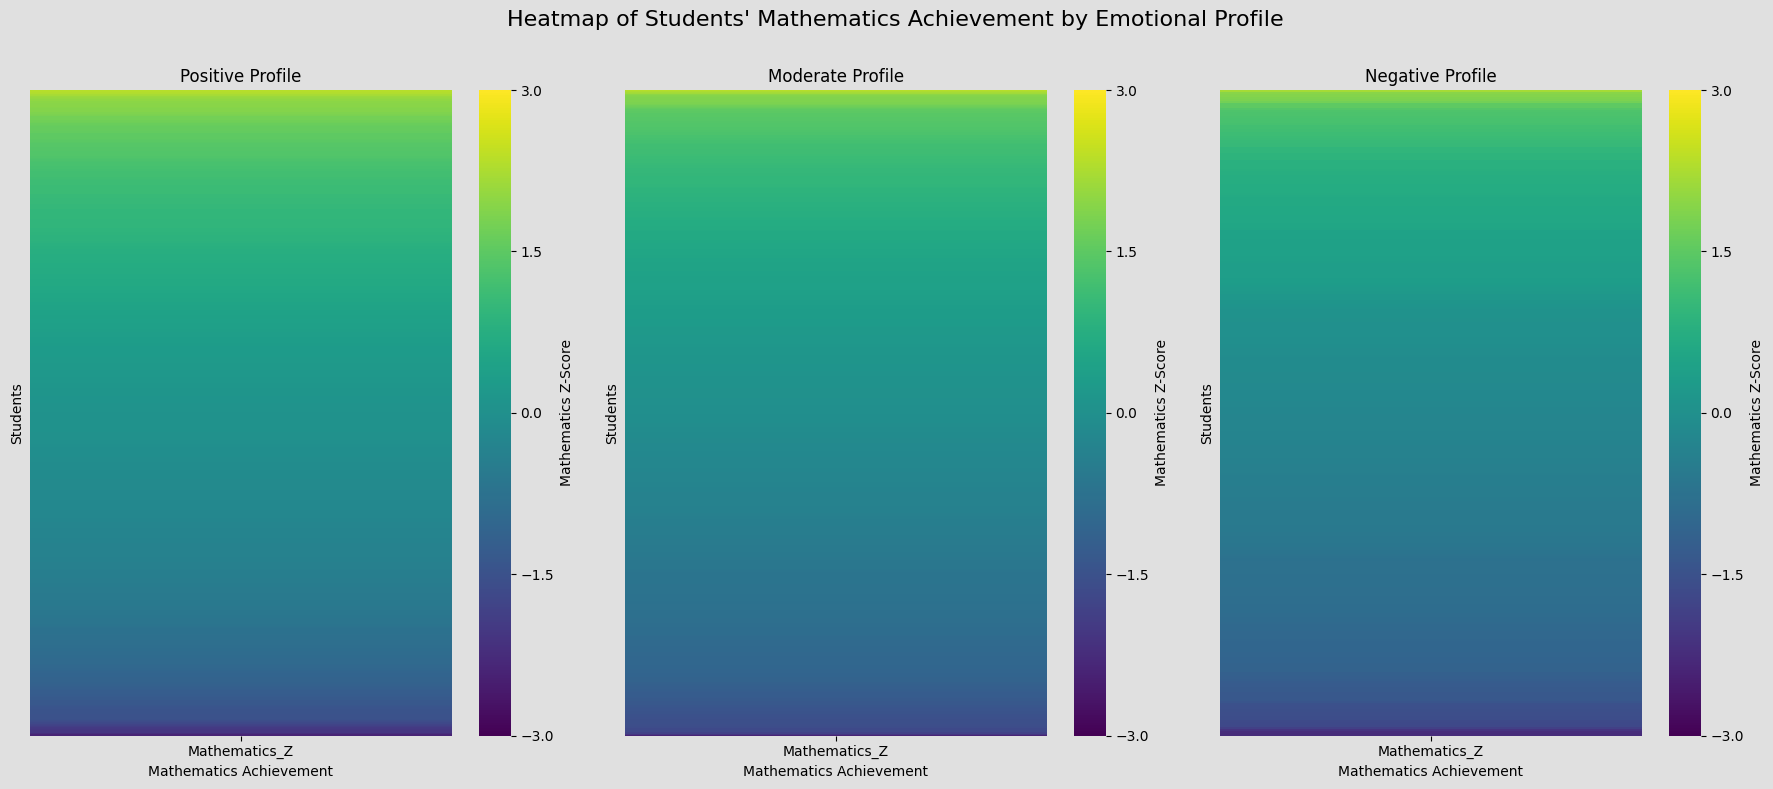

In [96]:
# -----------------------------
# Heatmap Visualization
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

# Order manually by desired profile order
ordered_profiles = ['Positive', 'Moderate', 'Negative']  # or based on your mapping

for i, profile in enumerate(ordered_profiles):
    # Filter and sort by Mathematics_Z within each profile
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        cbar_kws={"label": "Mathematics Z-Score", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Mathematics_Z"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


📊 Mathematics Scores by Emotional Profile
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186




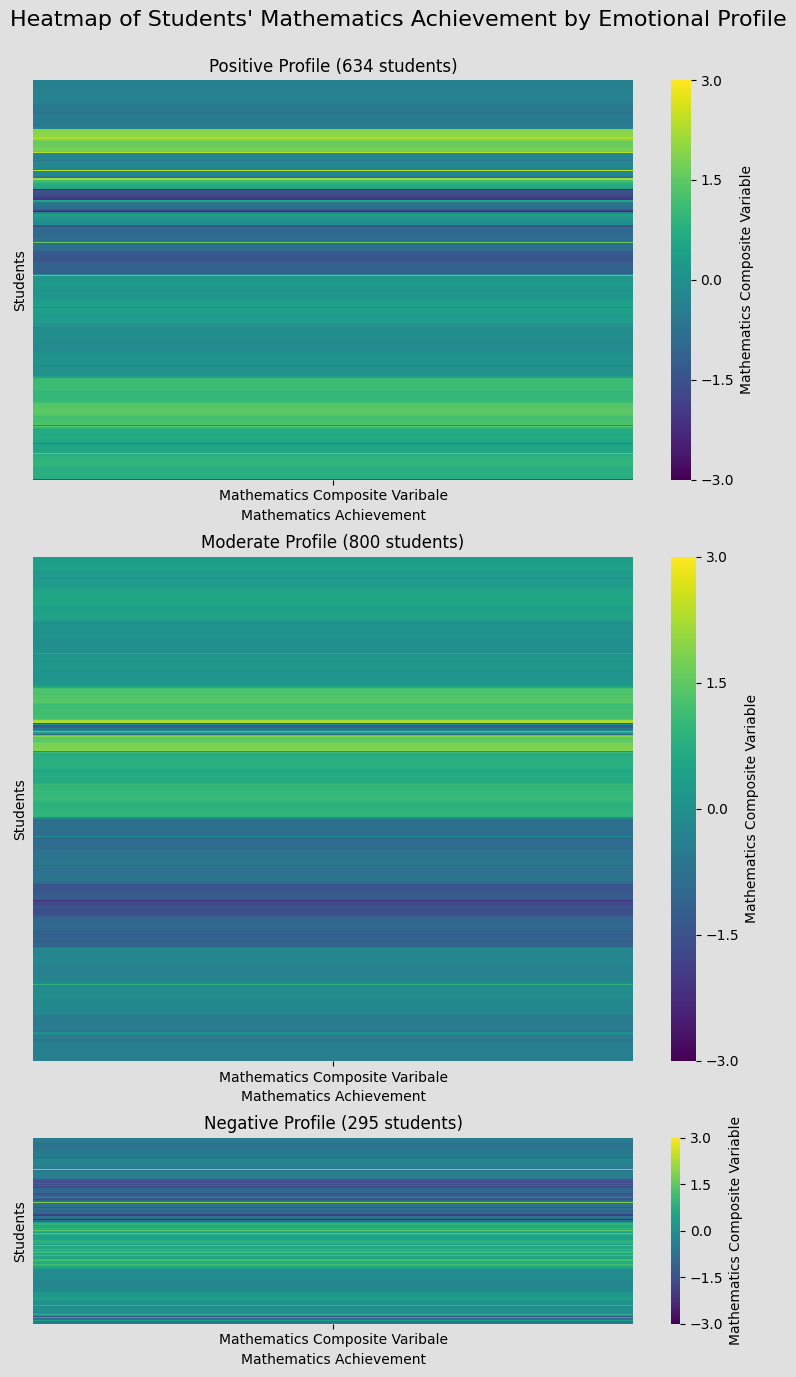

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection
#Ccluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics Scores by Emotional Profile")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Heatmap Visualization by Emotional Profile
# -----------------------------
# Sort for consistent heatmap
df_sorted = df.sort_values("Profile")

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, row heights proportional to profile sizes
fig, axes = plt.subplots(
    nrows=3, ncols=1, 
    figsize=(8, 14), 
    gridspec_kw={"height_ratios": profile_heights}
)
fig.patch.set_facecolor('#e0e0e0')

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        cbar_kws={"label": "Mathematics Composite Variable", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Mathematics Composite Varibale"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


📊 Mathematics_Z Mean Scores by Emotional Profile:
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186




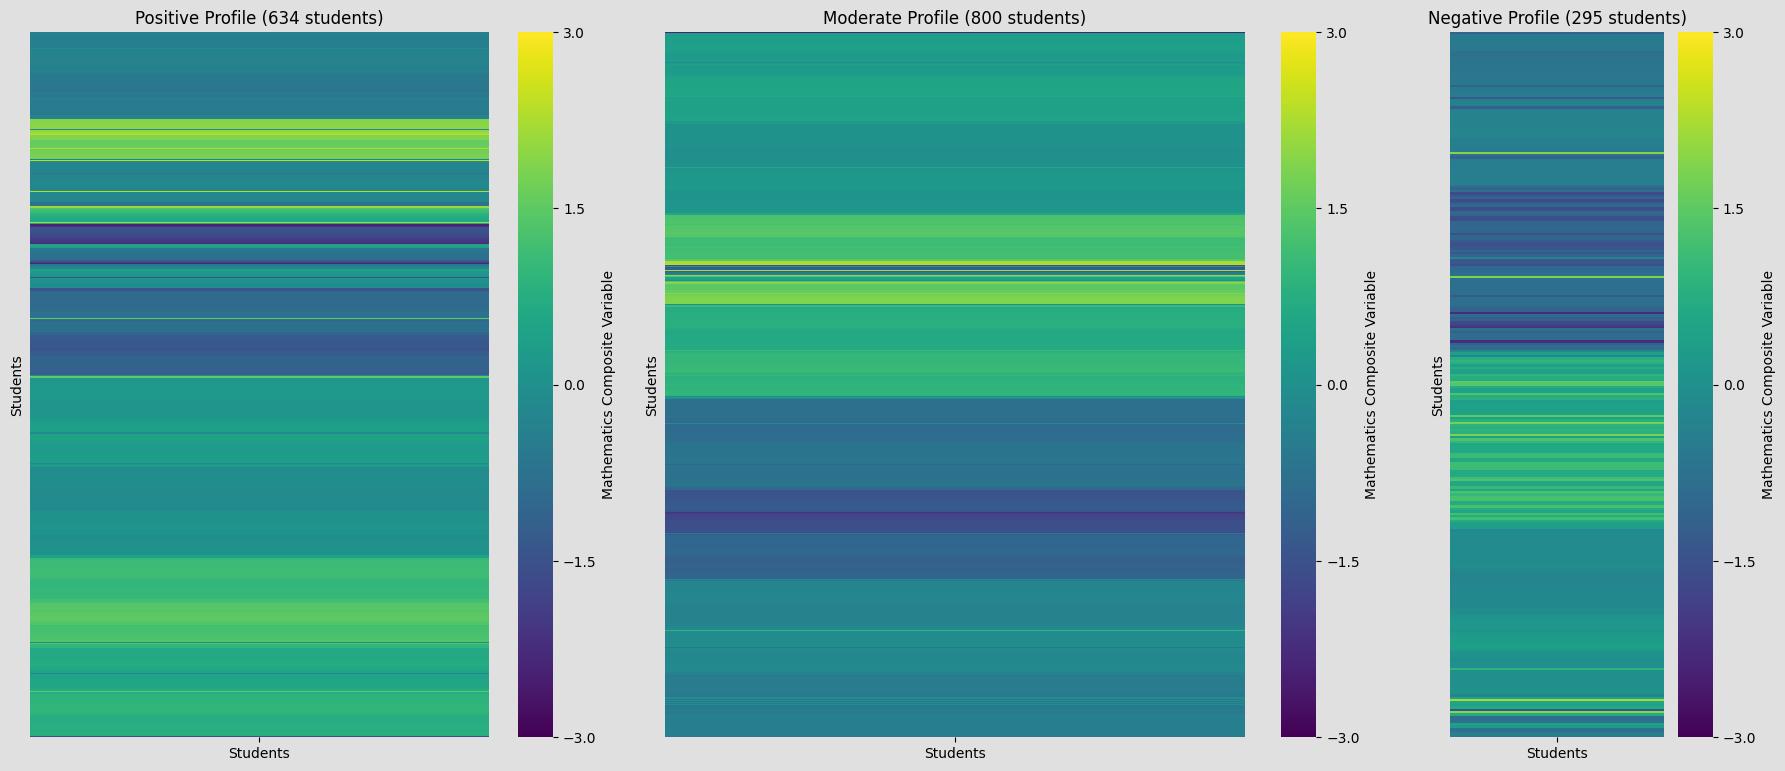

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection (adjust indices as needed)
# Example: Assume cluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics_Z Mean Scores by Emotional Profile:")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Heatmap Visualization by Emotional Profile (Horizontally)
# -----------------------------
# Sort for consistent heatmap
df_sorted = df.sort_values("Profile")

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, now horizontally arranged
fig, axes = plt.subplots(
    nrows=1, ncols=3, 
    figsize=(18, 8),  # Wider figure for horizontal display
    gridspec_kw={"width_ratios": profile_heights}  # Adjust width ratios based on profile sizes
)
fig.patch.set_facecolor('#e0e0e0')

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        cbar_kws={"label": "Mathematics Composite Variable", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Students"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


📊 Mathematics_Z Mean Scores by Emotional Profile:
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186




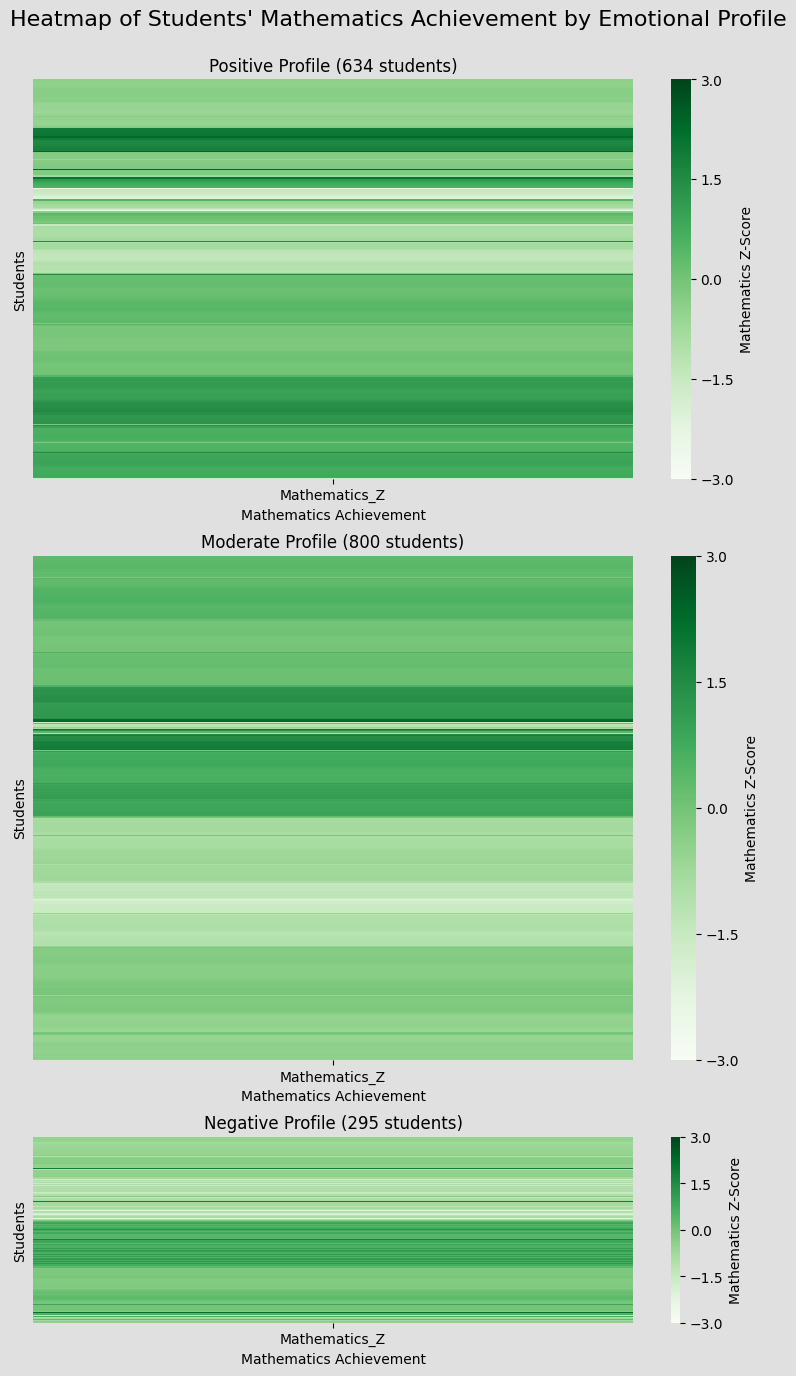

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection
#Ccluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics_Z Mean Scores by Emotional Profile:")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Heatmap Visualization by Emotional Profile
# -----------------------------
# Sort for consistent heatmap
df_sorted = df.sort_values("Profile")

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, row heights proportional to profile sizes
fig, axes = plt.subplots(
    nrows=3, ncols=1, 
    figsize=(8, 14), 
    gridspec_kw={"height_ratios": profile_heights}
)
fig.patch.set_facecolor('#e0e0e0')

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="Greens",
        cbar_kws={"label": "Mathematics Z-Score", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Mathematics_Z"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


📊 Mathematics_Z Mean Scores by Emotional Profile:
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186




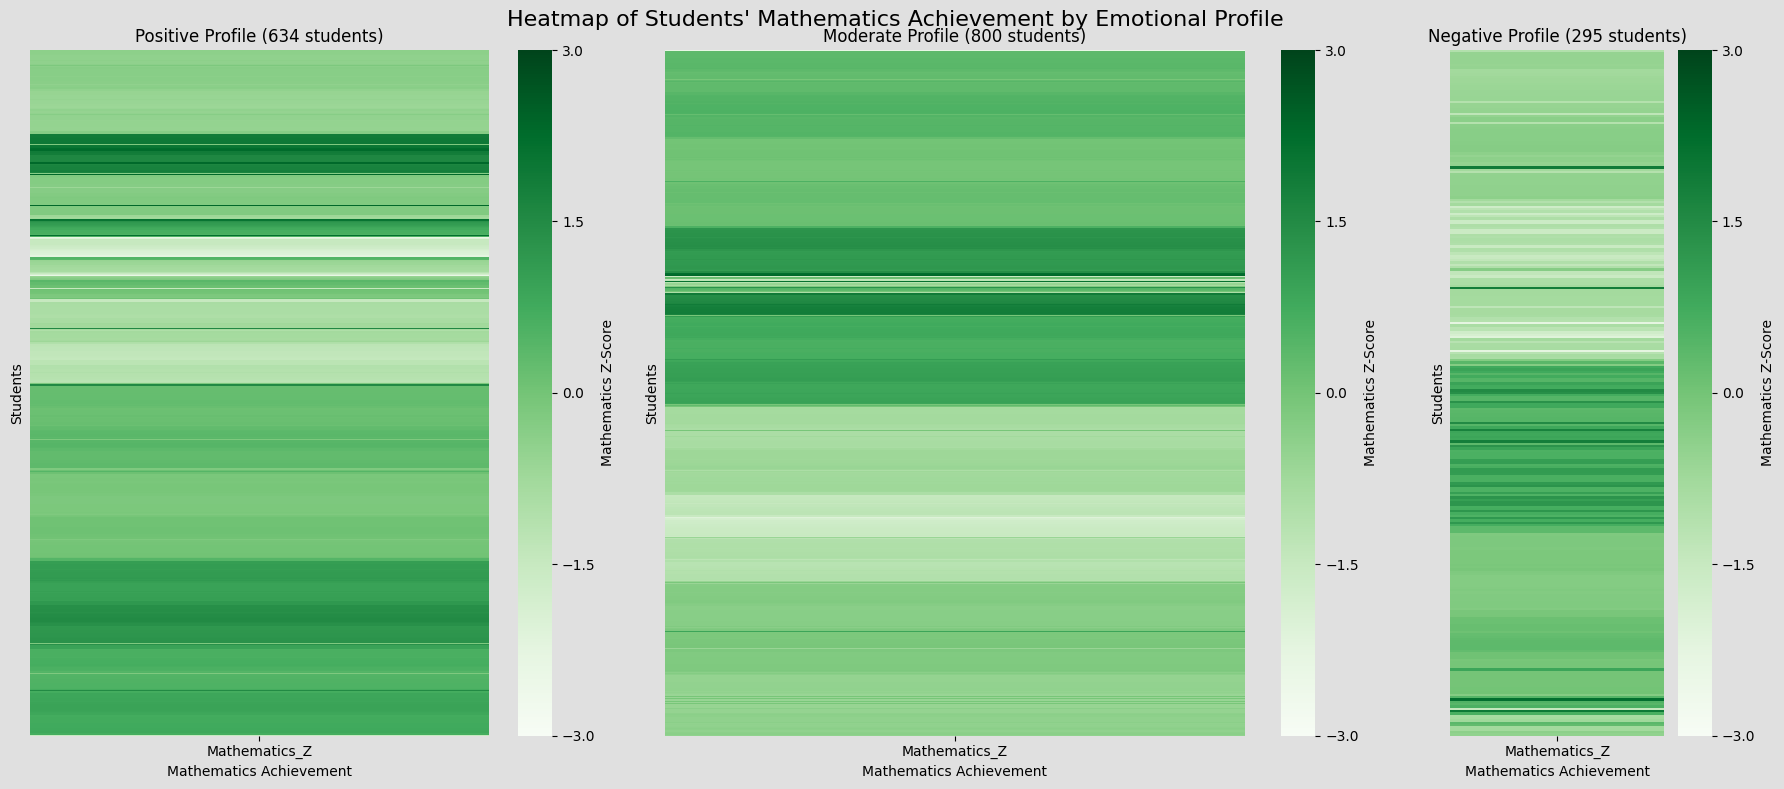

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection (adjust indices as needed)
# Example: Assume cluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics_Z Mean Scores by Emotional Profile:")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Heatmap Visualization by Emotional Profile (Horizontally)
# -----------------------------
# Sort for consistent heatmap
df_sorted = df.sort_values("Profile")

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, now horizontally arranged
fig, axes = plt.subplots(
    nrows=1, ncols=3, 
    figsize=(18, 8),  # Wider figure for horizontal display
    gridspec_kw={"width_ratios": profile_heights}  # Adjust width ratios based on profile sizes
)
fig.patch.set_facecolor('#e0e0e0')

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="Greens",
        cbar_kws={"label": "Mathematics Z-Score", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Mathematics_Z"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


📊 Mathematics_Z Mean Scores by Emotional Profile:
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186




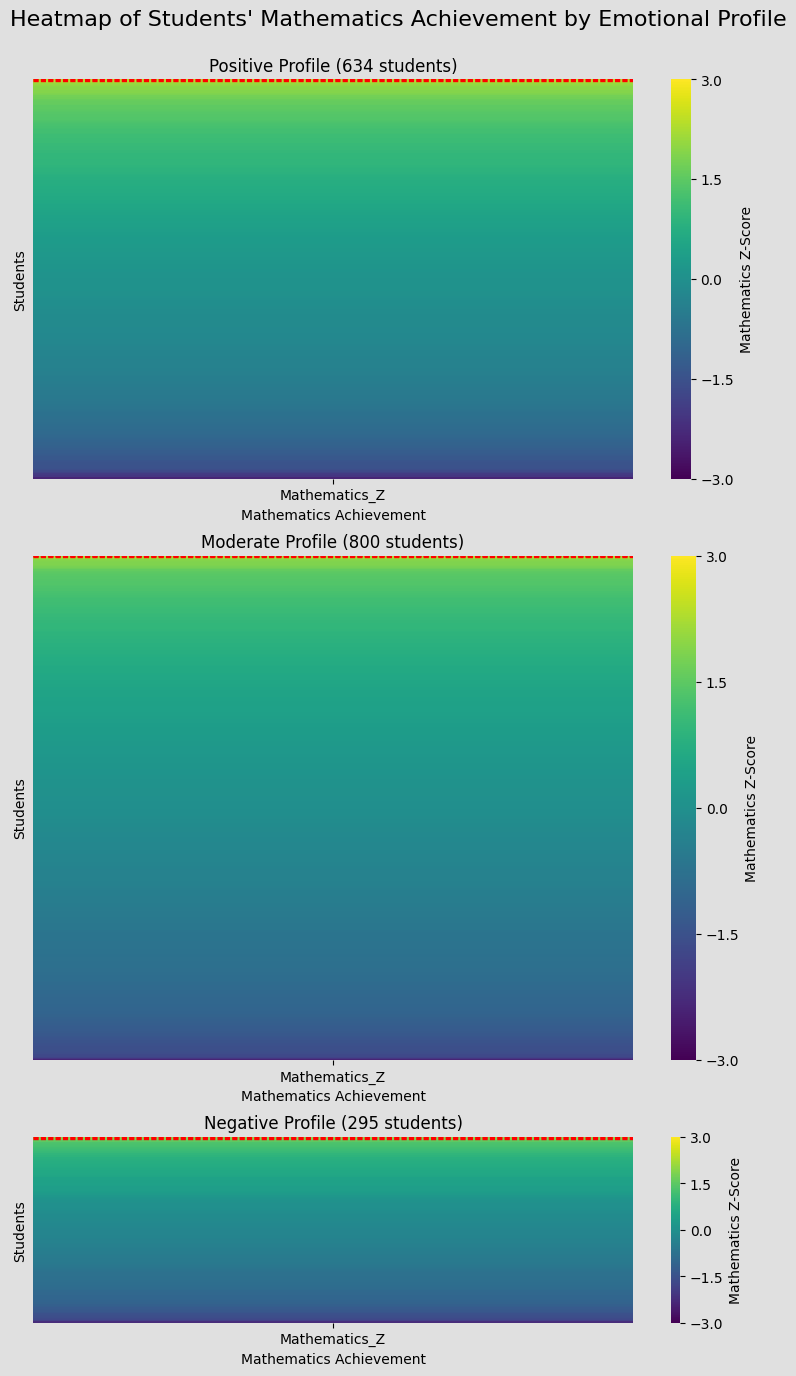

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection
# Example: cluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics_Z Mean Scores by Emotional Profile:")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Heatmap Visualization by Emotional Profile
# -----------------------------
# Sort for consistent heatmap (students with top math achievement at the top)
df_sorted = df.sort_values(["Profile", "Mathematics_Z"], ascending=[True, False])

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, arranged vertically
fig, axes = plt.subplots(
    nrows=3, ncols=1, 
    figsize=(8, 14), 
    gridspec_kw={"height_ratios": profile_heights}
)
fig.patch.set_facecolor('#e0e0e0')

# Define the ticks that will be used for red dotted lines (matches color bar ticks)
color_bar_ticks = [-3, -1.5, 0, 1.5, 3]  # Same ticks as used for the color bar

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    # Plot the heatmap
    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        cbar_kws={"label": "Mathematics Z-Score", "ticks": color_bar_ticks},
        yticklabels=False,
        xticklabels=["Mathematics_Z"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    # Add red dotted lines at the positions of the color bar ticks
    for tick in color_bar_ticks:
        axes[i].axhline(y=tick, color='r', linestyle='--', linewidth=1)

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


📊 Mathematics_Z Mean Scores by Emotional Profile:
Profile
Positive    0.126940
Moderate   -0.024300
Negative   -0.182712
Name: Mathematics_Z, dtype: float64


💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):
          Enjoyment   Anxiety   Boredom
Profile                                
Moderate   2.561587  1.416850  1.967100
Positive   4.021467  1.225158  1.248423
Negative   1.571627  1.903763  3.837186


🔍 Overlap Check Between Profiles:
Positive & Moderate: set()
Positive & Negative: set()
Moderate & Negative: set()
(All should be empty sets)



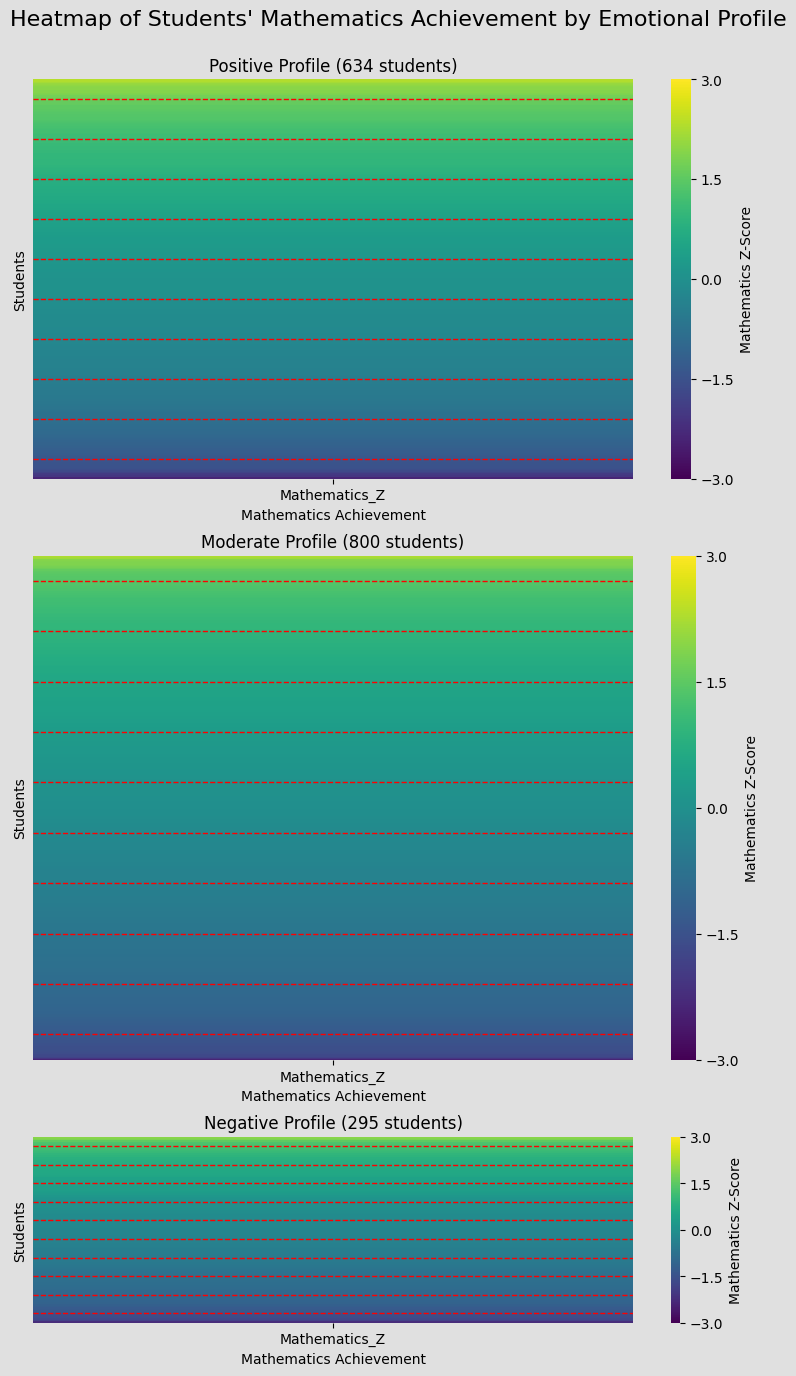

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Inspect centers to decide profile labels
centers = pd.DataFrame(kmeans_emotions.cluster_centers_, columns=emotion_vars.columns)

# Manually map based on center inspection
# Example: cluster 1 is Positive, 0 is Moderate, 2 is Negative
cluster_map = {
    1: "Positive",
    0: "Moderate",
    2: "Negative"
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Display Summary Info
# -----------------------------
# Mean math achievement
mean_math = df.groupby("Profile")["Mathematics_Z"].mean().sort_values(ascending=False)
print("📊 Mathematics_Z Mean Scores by Emotional Profile:")
print(mean_math)
print("\n")

# Print emotional cluster centers
centers["Profile"] = centers.index.map(cluster_map)
print("💡 Cluster Centers for Emotional Profiles (Enjoyment, Anxiety, Boredom):")
print(centers.set_index("Profile"))
print("\n")

# -----------------------------
# PART 3: Check for Data Overlap
# -----------------------------
positive_ids = set(df[df["Profile"] == "Positive"].index)
moderate_ids = set(df[df["Profile"] == "Moderate"].index)
negative_ids = set(df[df["Profile"] == "Negative"].index)

print("🔍 Overlap Check Between Profiles:")
print("Positive & Moderate:", positive_ids & moderate_ids)
print("Positive & Negative:", positive_ids & negative_ids)
print("Moderate & Negative:", moderate_ids & negative_ids)
print("(All should be empty sets)\n")

# -----------------------------
# PART 4: Heatmap Visualization by Emotional Profile
# -----------------------------
# Sort for consistent heatmap (top math achievers first)
df_sorted = df.sort_values(["Profile", "Mathematics_Z"], ascending=[True, False])

# Count students in each profile
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Positive", "Moderate", "Negative"]
profile_heights = [profile_counts[p] for p in profiles_ordered]

# Set up the figure with 3 subplots, arranged vertically
fig, axes = plt.subplots(
    nrows=3, ncols=1, 
    figsize=(8, 14), 
    gridspec_kw={"height_ratios": profile_heights}
)
fig.patch.set_facecolor('#e0e0e0')

# Define tick positions for red dotted lines (just visual placeholders)
line_positions = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

# Plot each profile
for i, profile in enumerate(profiles_ordered):
    cluster_data = df_sorted[df_sorted["Profile"] == profile]
    heatmap_data = cluster_data[["Mathematics_Z"]]

    sns.heatmap(
        heatmap_data,
        cmap="viridis",
        cbar_kws={"label": "Mathematics Z-Score", "ticks": [-3, -1.5, 0, 1.5, 3]},
        yticklabels=False,
        xticklabels=["Mathematics_Z"],
        vmin=-3,
        vmax=3,
        ax=axes[i]
    )

    # Add red dotted horizontal lines (approximate equal spacing visually)
    for frac in line_positions:
        y = len(heatmap_data) * frac
        axes[i].axhline(y=y, color='r', linestyle='--', linewidth=1)

    axes[i].set_title(f"{profile} Profile ({len(cluster_data)} students)")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Mathematics Achievement")

plt.tight_layout()
plt.suptitle("Heatmap of Students' Mathematics Achievement by Emotional Profile", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


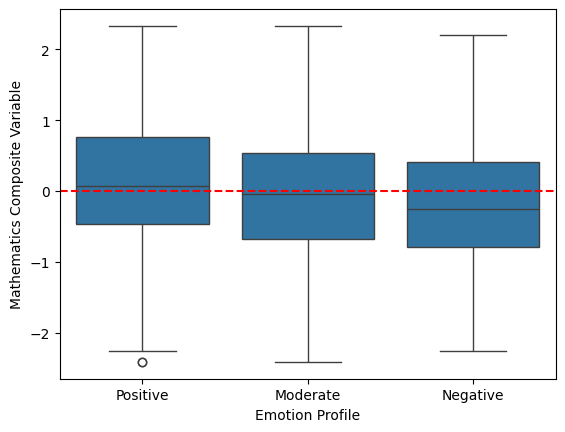

In [103]:
sns.boxplot(data=df, x="Profile", y="Mathematics_Z", order=["Positive", "Moderate", "Negative"])
plt.ylabel("Mathematics Composite Variable")
plt.xlabel("Emotion Profile")
plt.axhline(0, color='red', linestyle='--')  # reference line at mean
plt.show()


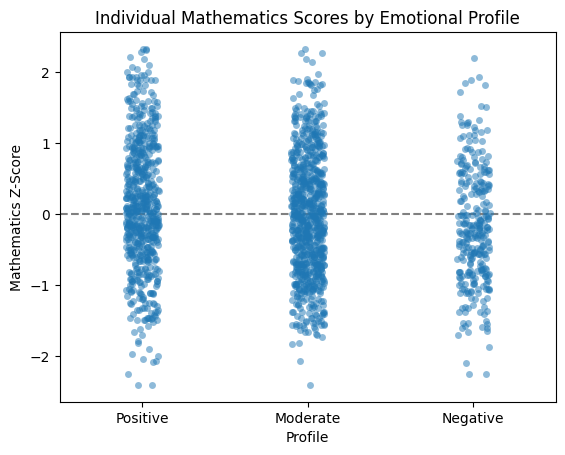

In [104]:
sns.stripplot(data=df, x="Profile", y="Mathematics_Z", jitter=True, alpha=0.5, order=["Positive", "Moderate", "Negative"])
plt.title("Individual Mathematics Scores by Emotional Profile")
plt.ylabel("Mathematics Z-Score")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


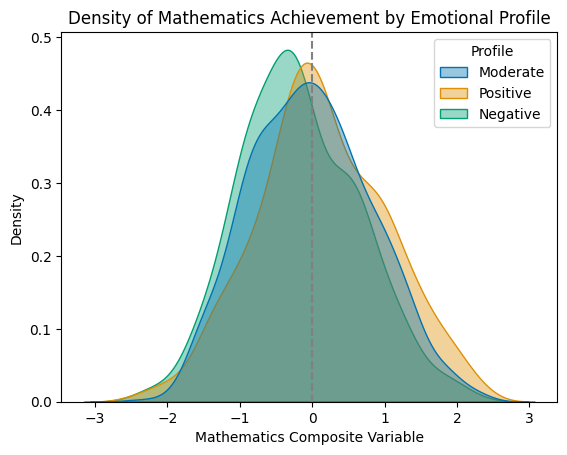

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("colorblind")  # Set globally for this plot

sns.kdeplot(data=df, x="Mathematics_Z", hue="Profile", common_norm=False, fill=True, alpha=0.4)
plt.title("Density of Mathematics Achievement by Emotional Profile")
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Mathematics Composite Variable")
plt.show()


In [106]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


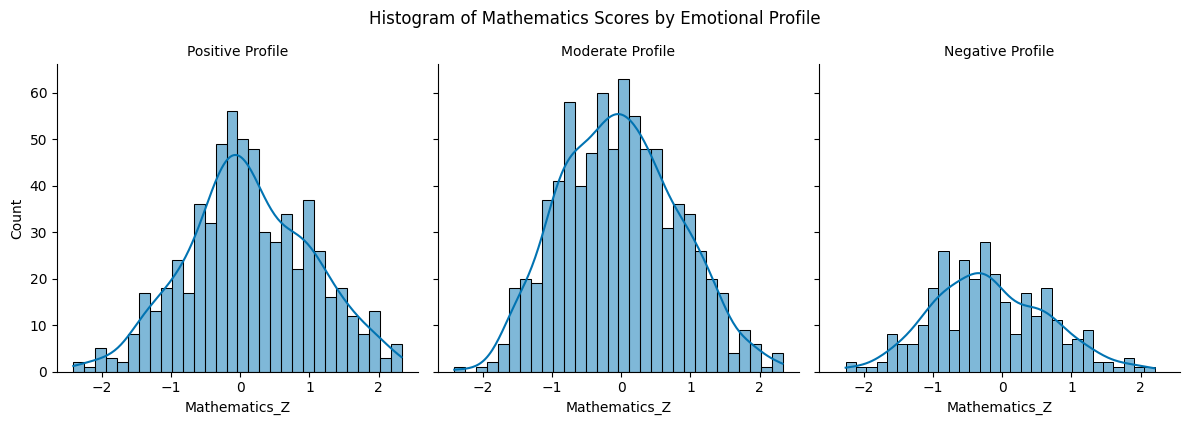

In [107]:
g = sns.FacetGrid(df, col="Profile", col_order=["Positive", "Moderate", "Negative"], height=4, aspect=1)
g.map(sns.histplot, "Mathematics_Z", kde=True, bins=30)
g.set_titles("{col_name} Profile")
plt.suptitle("Histogram of Mathematics Scores by Emotional Profile", y=1.05)
plt.show()


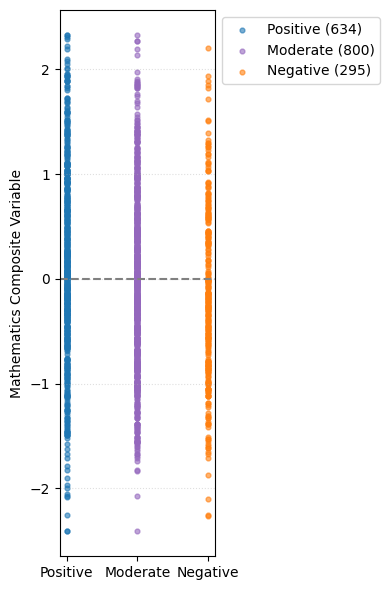

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data so top students come first in each profile
df_sorted = df.sort_values(["Profile", "Mathematics_Z"], ascending=[True, False])
df_sorted["Index_within_Profile"] = df_sorted.groupby("Profile").cumcount()

# Set up the plot
plt.figure(figsize=(4, 6))
profiles_ordered = ["Positive", "Moderate", "Negative"]

# Define custom color palette (no red or green)
custom_colors = ["#1f77b4", "#9467bd", "#ff7f0e"]  # blue, purple, orange

# Plot each profile as separate scatter column
for i, (profile, color) in enumerate(zip(profiles_ordered, custom_colors)):
    sub = df_sorted[df_sorted["Profile"] == profile]
    plt.scatter(
        [i]*len(sub),
        sub["Mathematics_Z"],
        alpha=0.6,
        s=12,
        color=color,
        label=f"{profile} ({len(sub)})"
    )

# Add labels and formatting
plt.xticks(range(len(profiles_ordered)), profiles_ordered)
plt.ylabel("Mathematics Composite Variable")
plt.axhline(0, linestyle="--", color="gray")
plt.grid(axis='y', linestyle=':', alpha=0.4)

# Position legend outside top right
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


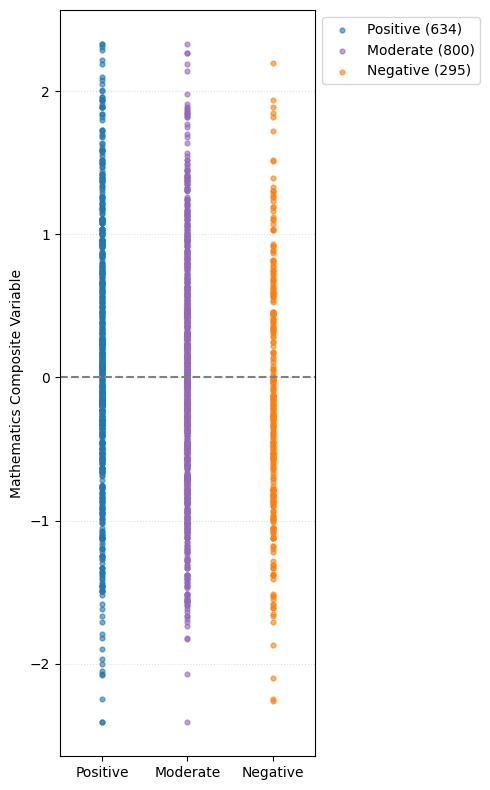

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data so top students come first in each profile
df_sorted = df.sort_values(["Profile", "Mathematics_Z"], ascending=[True, False])
df_sorted["Index_within_Profile"] = df_sorted.groupby("Profile").cumcount()

# Set up the plot with the original figure size
plt.figure(figsize=(5, 8))  # Keeping the same size

profiles_ordered = ["Positive", "Moderate", "Negative"]

# Define custom color palette (no red or green)
custom_colors = ["#1f77b4", "#9467bd", "#ff7f0e"]  # blue, purple, orange

# Plot each profile as separate scatter column
for i, (profile, color) in enumerate(zip(profiles_ordered, custom_colors)):
    sub = df_sorted[df_sorted["Profile"] == profile]
    plt.scatter(
        [i]*len(sub),
        sub["Mathematics_Z"],
        alpha=0.6,
        s=12,
        color=color,
        label=f"{profile} ({len(sub)})"
    )

# Add labels and formatting
plt.xticks(range(len(profiles_ordered)), profiles_ordered)
plt.ylabel("Mathematics Composite Variable")
plt.axhline(0, linestyle="--", color="gray")
plt.grid(axis='y', linestyle=':', alpha=0.4)

# Position legend outside top right
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Increase space between leftmost and rightmost profile without affecting internal spacing
plt.xlim(-0.5, len(profiles_ordered) - 0.5)  # Expanding x-axis limits

plt.tight_layout()
plt.show()


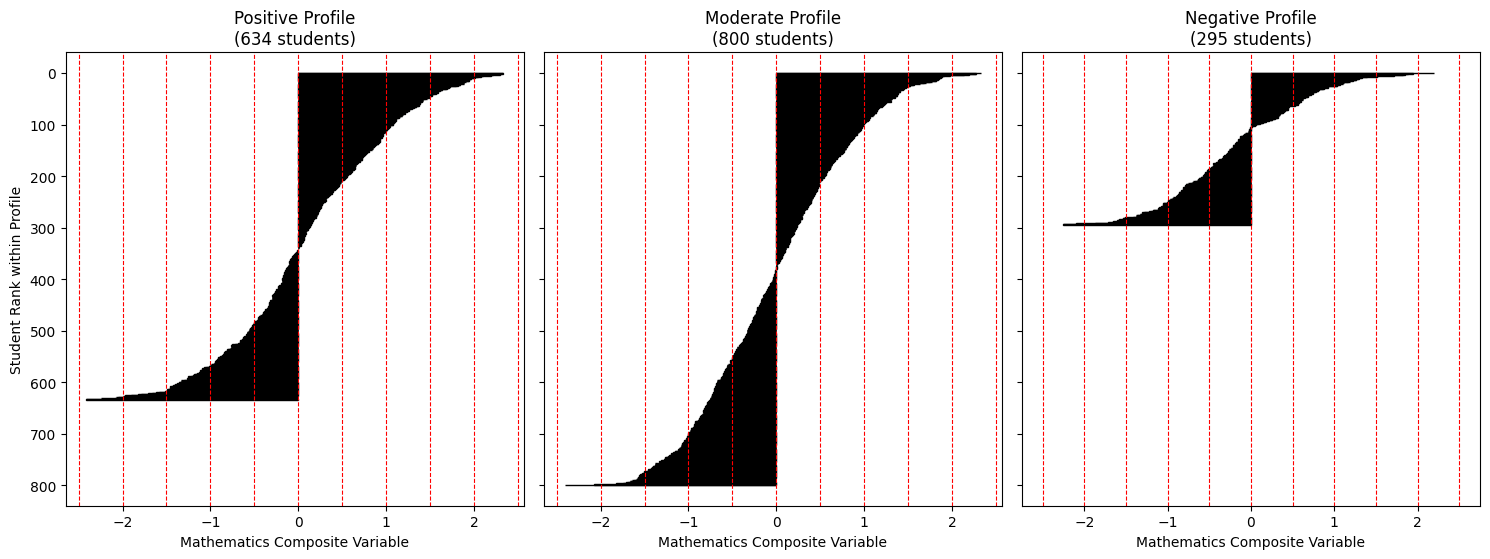

In [110]:
import matplotlib.pyplot as plt

# Prepare sorted data
df_sorted = df.sort_values(["Profile", "Mathematics_Z"], ascending=[True, False])
profiles_ordered = ["Positive", "Moderate", "Negative"]

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, profile in enumerate(profiles_ordered):
    profile_data = df_sorted[df_sorted["Profile"] == profile].copy()
    profile_data.reset_index(drop=True, inplace=True)

    axes[i].barh(
        y=range(len(profile_data)),
        width=profile_data["Mathematics_Z"],
        color=sns.color_palette("viridis", len(profile_data)),
        edgecolor='k'
    )

    # Add vertical reference lines
    for val in [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]:
        axes[i].axvline(val, linestyle="--", color="red", linewidth=0.8)

    axes[i].set_title(f"{profile} Profile\n({len(profile_data)} students)")
    axes[i].invert_yaxis()  # Highest scores at top
    axes[i].set_xlabel("Mathematics Composite Variable")

axes[0].set_ylabel("Student Rank within Profile")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


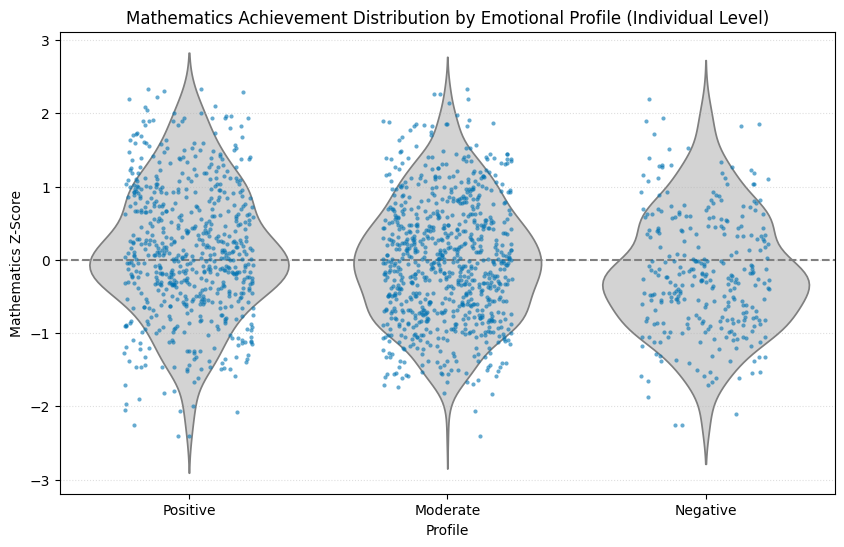

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Profile", y="Mathematics_Z", order=profiles_ordered, inner=None, color="lightgray")
sns.stripplot(data=df, x="Profile", y="Mathematics_Z", order=profiles_ordered, jitter=0.25, size=3, alpha=0.6)

plt.axhline(0, linestyle="--", color="gray")
plt.ylabel("Mathematics Z-Score")
plt.title("Mathematics Achievement Distribution by Emotional Profile (Individual Level)")
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()


count    1729.000000
mean       26.638595
std         9.617598
min         0.000000
25%        19.670000
50%        25.670000
75%        34.000000
max        45.000000
Name: arithm, dtype: float64


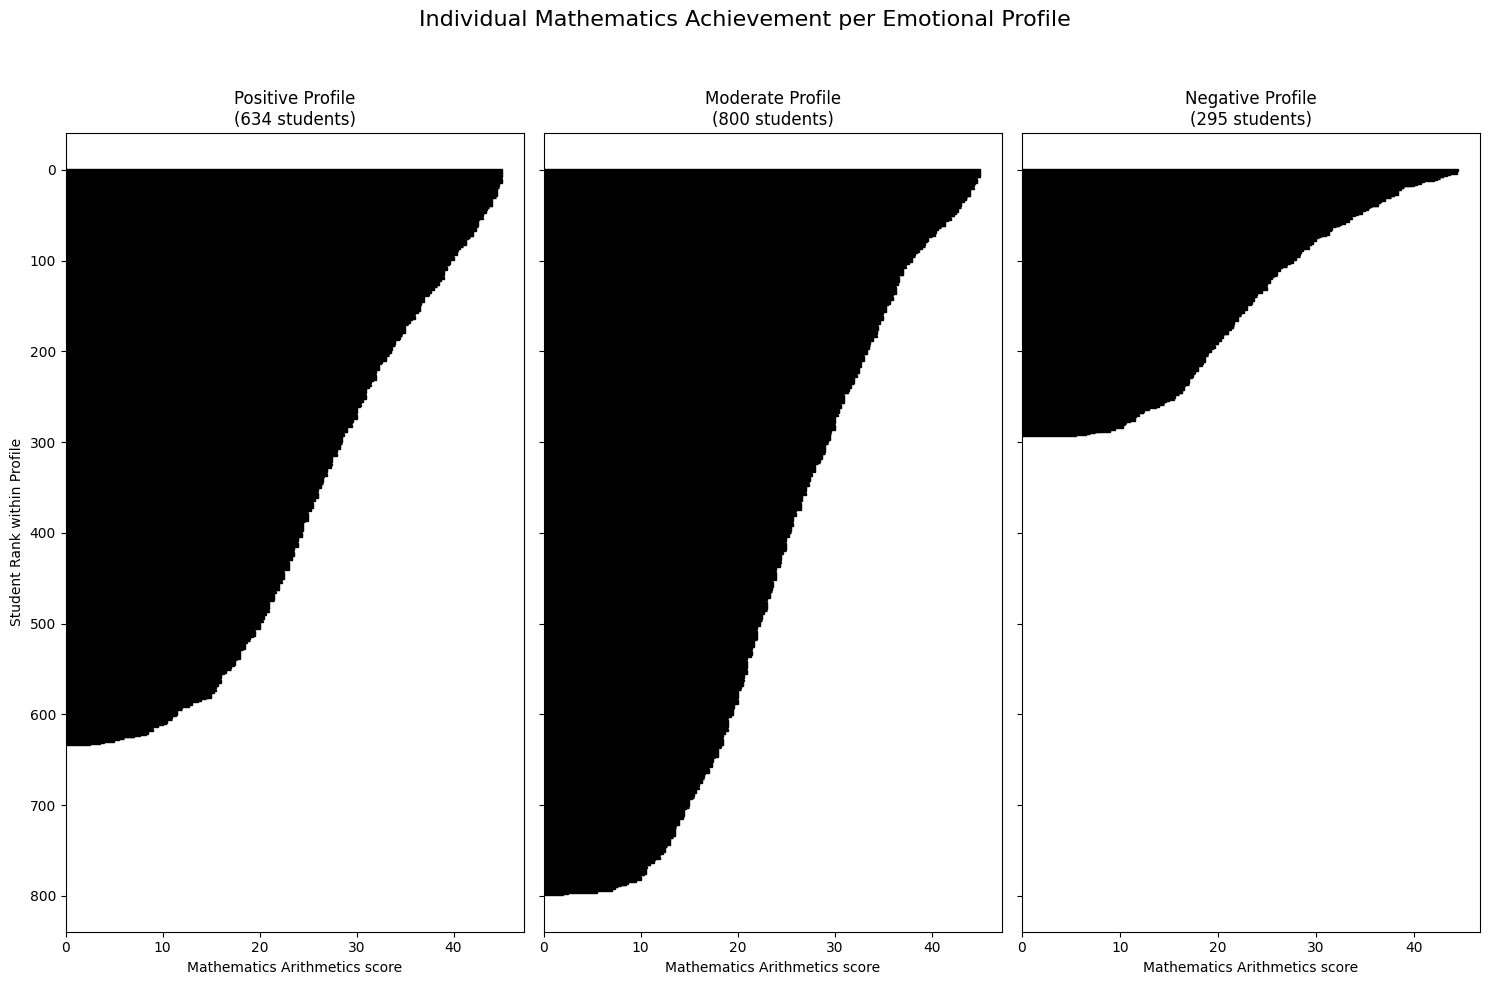

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the data
file_path = r"C:\Users\Marianne\Downloads\TUTKIMUS\Tutkimus_DATASET_2025_Tunteet_MatematicsZ_klusteriCSV.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# Check the range of 'arithm' values
print(df["arithm"].describe())

# -----------------------------
# PART 1: Cluster Emotions and Assign Profiles
# -----------------------------
emotion_vars = df[["Enjoyment", "Anxiety", "Boredom"]]
from sklearn.cluster import KMeans
kmeans_emotions = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_emotions.fit(emotion_vars)

# Assign clusters
df["Cluster"] = kmeans_emotions.labels_

# Map clusters to emotional profiles based on inspection
cluster_map = {
    1: "Positive",   # High enjoyment, low anxiety, low boredom
    0: "Moderate",   # Medium across all
    2: "Negative"    # Low enjoyment, high anxiety, high boredom
}
df["Profile"] = df["Cluster"].map(cluster_map)

# -----------------------------
# PART 2: Visualization
# -----------------------------
# Sort students within each profile by arithmetic score
df_sorted = df.sort_values(["Profile", "arithm"], ascending=[True, False])
profiles_ordered = ["Positive", "Moderate", "Negative"]

# Set up the horizontal bar plot
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
fig.suptitle("Individual Mathematics Achievement per Emotional Profile", fontsize=16)

# Use the 'viridis' colormap
cmap = plt.cm.viridis

for i, profile in enumerate(profiles_ordered):
    profile_data = df_sorted[df_sorted["Profile"] == profile].copy()
    profile_data.reset_index(drop=True, inplace=True)

    # Normalize the 'arithm' values for color mapping by scaling it to the range [0, 1]
    norm = mcolors.Normalize(vmin=profile_data["arithm"].min(), vmax=profile_data["arithm"].max())
    
    # Apply colormap based on normalized 'arithm' scores
    colors = [cmap(norm(val)) for val in profile_data["arithm"]]

    # Bar plot per profile
    axes[i].barh(
        y=range(len(profile_data)),
        width=profile_data["arithm"],
        color=colors,
        edgecolor='k'
    )

    axes[i].set_title(f"{profile} Profile\n({len(profile_data)} students)")
    axes[i].invert_yaxis()  # Highest math achievers at the top
    axes[i].set_xlabel("Mathematics Arithmetics score")

axes[0].set_ylabel("Student Rank within Profile")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1321294714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Profile', y='Mathematics_Z', data=df, palette='viridis', size=5)


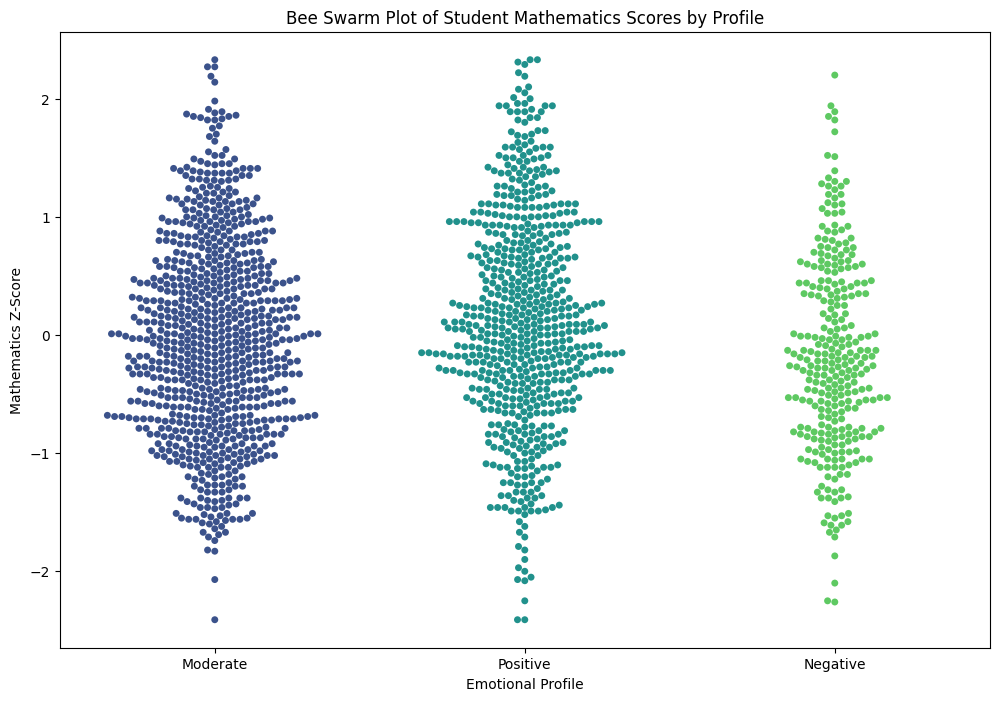

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bee swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Profile', y='Mathematics_Z', data=df, palette='viridis', size=5)

plt.title("Bee Swarm Plot of Student Mathematics Scores by Profile")
plt.xlabel("Emotional Profile")
plt.ylabel("Mathematics Z-Score")
plt.show()


c:\Users\Marianne\anaconda3\envs\islp\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


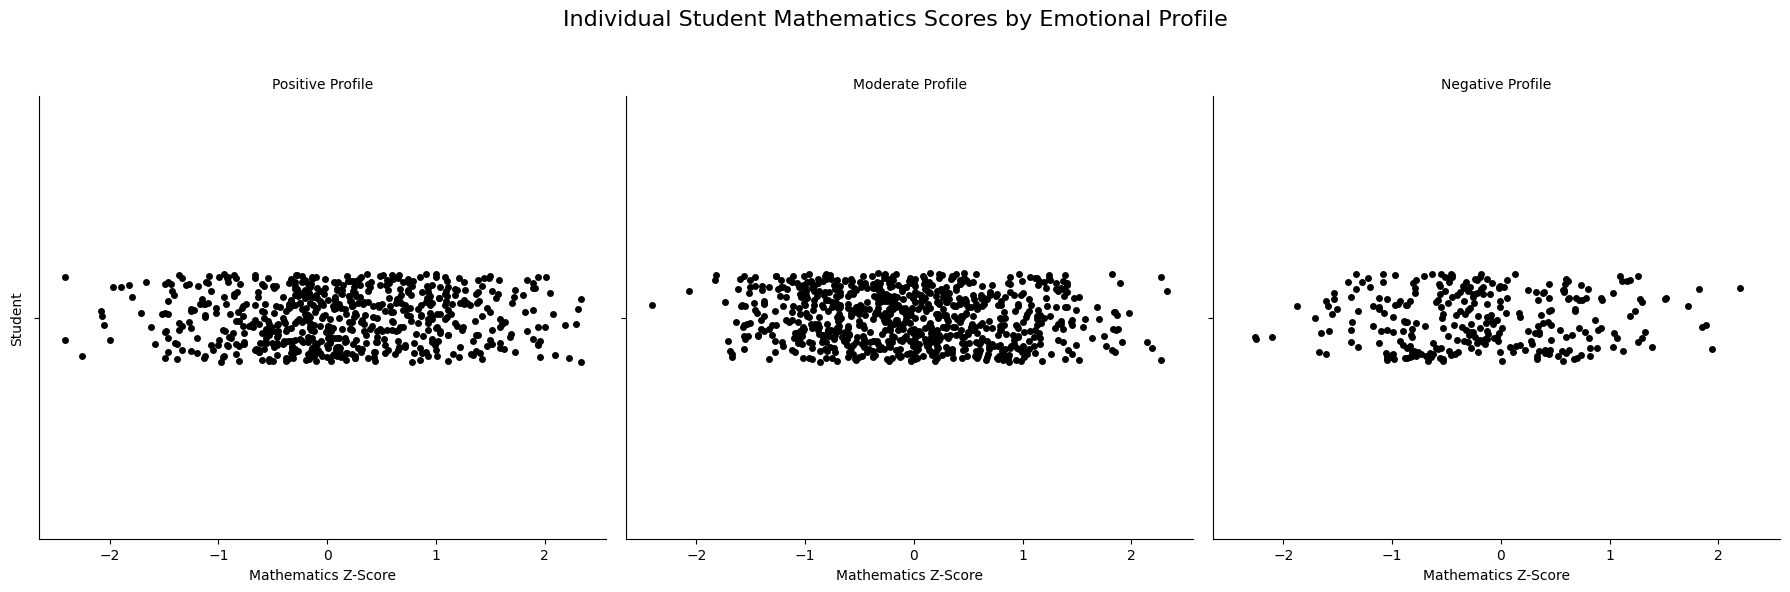

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create FacetGrid for individual traces by profile
g = sns.FacetGrid(df, col="Profile", col_order=["Positive", "Moderate", "Negative"], height=6, aspect=1)
g.map(sns.stripplot, "Mathematics_Z", jitter=True, color='k', size=5)

# Set titles and labels
g.set_axis_labels("Mathematics Z-Score", "Student")
g.set_titles("{col_name} Profile")
plt.suptitle("Individual Student Mathematics Scores by Emotional Profile", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [115]:
%pip install plotly



Note: you may need to restart the kernel to use updated packages.


In [116]:
import plotly.express as px

# Define a custom color palette that avoids red and green
custom_color_palette = ["#1f77b4", "#9467bd", "#ff7f0e"]  # Blue, Purple, Orange

# Create an interactive scatter plot 
fig = px.scatter(df, x="Mathematics_Z", y="Profile", color="Profile", 
                 hover_data=["STUDID", "Enjoyment", "Anxiety", "Boredom"],
                 color_discrete_sequence=custom_color_palette)

fig.update_layout(
    title="Interactive Scatter Plot of Student Mathematics Scores by Emotion Profile",
    xaxis_title="Mathematics Composite Variable",
    yaxis_title="Emotion Profile"
)

fig.show()

# ---------------------------------------------------------------- NOTE  HOVER MOUSE OVER THE POINTS TO SEE DETAILES  -------------------------------------------------------------- 

In [117]:
import plotly.express as px

# Define a custom color palette that avoids red and green
custom_color_palette = ["#1f77b4", "#9467bd", "#ff7f0e"]  # Blue, Purple, Orange

# Create an interactive scatter plot 
fig = px.scatter(df, x="Mathematics_Z", y="Profile", color="Profile", 
                 hover_data=["STUDID", "Enjoyment", "Anxiety", "Boredom"],
                 color_discrete_sequence=custom_color_palette)

fig.update_layout(
    xaxis_title="Mathematics Composite Variable",
    yaxis_title="Emotion Profile"
)

fig.show()

# ---------------------------------------------------------------- NOTE  HOVER MOUSE OVER THE POINTS TO SEE DETAILES  -------------------------------------------------------------- 

In [118]:
import plotly.express as px

# Define a custom color palette that avoids red and green
custom_color_palette = ["#1f77b4", "#9467bd", "#ff7f0e"]  # Blue, Purple, Orange

# Create an interactive scatter plot 
fig = px.scatter(df, x="arithm", y="Profile", color="Profile", 
                 hover_data=["STUDID", "Enjoyment", "Anxiety", "Boredom"],
                 color_discrete_sequence=custom_color_palette)

fig.update_layout(
    title="Interactive Scatter Plot of Student Mathematics Scores by Emotional Profile",
    xaxis_title="Mathematics Arithmetic Score",
    yaxis_title="Emotional Profile"
)

fig.show()

# ---------------------------------------------------------------- NOTE  HOVER MOUSE OVER THE POINTS TO SEE DETAILES  --------------------------------------------------------------


In [119]:
import plotly.express as px

# Define a custom color palette that avoids red and green
custom_color_palette = ["#1f77b4", "#9467bd", "#ff7f0e"]  # Blue, Purple, Orange

# Create an interactive scatter plot 
fig = px.scatter(df, x="MathWaveIRT", y="Profile", color="Profile", 
                 hover_data=["STUDID", "Enjoyment", "Anxiety", "Boredom"],
                 color_discrete_sequence=custom_color_palette)

fig.update_layout(
    title="Interactive Scatter Plot of Student Mathematics Scores by Emotional Profile",
    xaxis_title="Mathematics Word Problems",
    yaxis_title="Emotional Profile"
)

fig.show()

# ---------------------------------------------------------------- NOTE  HOVER MOUSE OVER THE POINTS TO SEE DETAILES  --------------------------------------------------------------


In [120]:
print("Total students in original df:", len(df))
print("Total students used in plot:", len(df.dropna(subset=["MathWaveIRT", "Profile"])))


Total students in original df: 1729
Total students used in plot: 1729


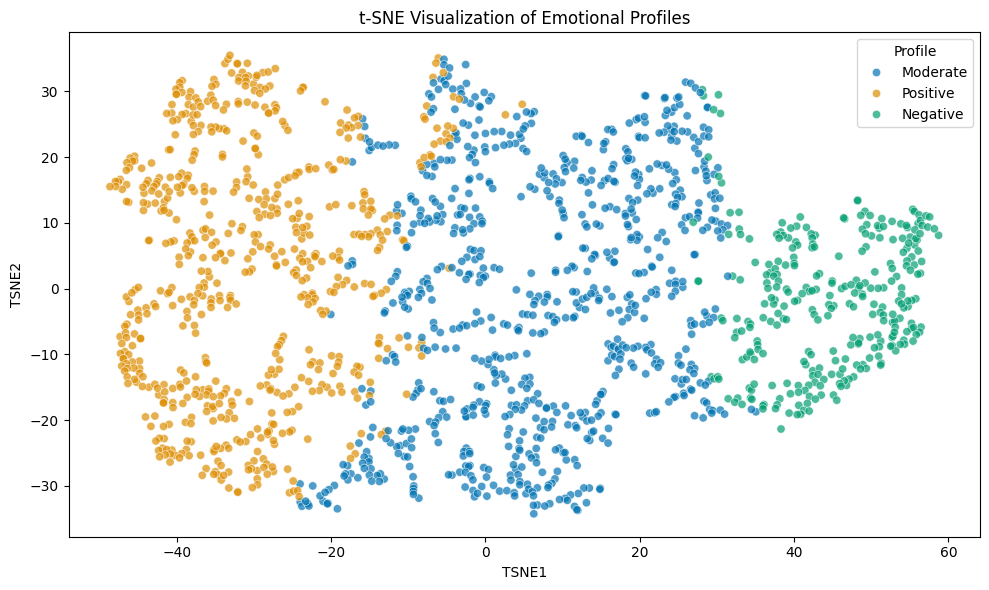

In [121]:
# REDUCED DIMENSIONALITY WITH t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Select features to reduce (you can include more if relevant)
features = df[["Enjoyment", "Anxiety", "Boredom", "Mathematics_Z"]]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Add to DataFrame for plotting
df["TSNE1"] = tsne_result[:, 0]
df["TSNE2"] = tsne_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Profile", palette="colorblind", alpha=0.7)
plt.title("t-SNE Visualization of Emotional Profiles")
plt.legend(title="Profile")
plt.tight_layout()
plt.show()


In [122]:
!pip install umap-learn

c:\Users\Marianne\anaconda3\envs\islp\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\Marianne\anaconda3\envs\islp\lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



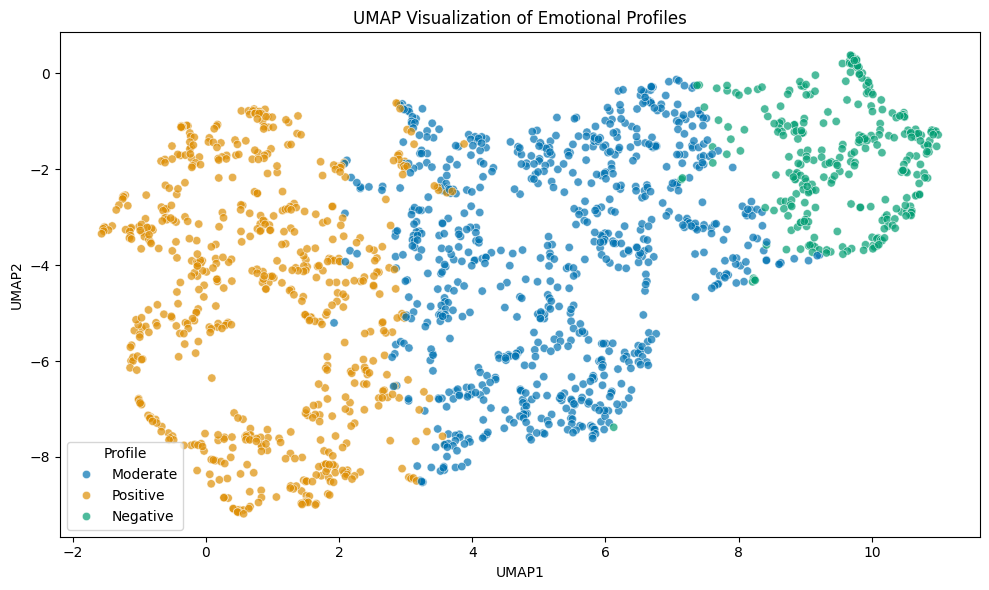

In [123]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
features = df[["Enjoyment", "Anxiety", "Boredom", "Mathematics_Z"]]

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(features)

# Add to DataFrame
df["UMAP1"] = umap_result[:, 0]
df["UMAP2"] = umap_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="Profile", palette="colorblind", alpha=0.7)
plt.title("UMAP Visualization of Emotional Profiles")
plt.legend(title="Profile")
plt.tight_layout()
plt.show()


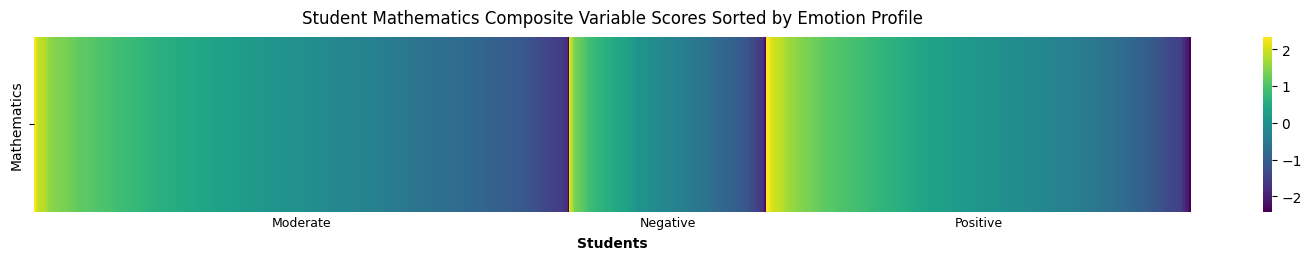

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by profile and math score
df_sorted = df.sort_values(by=["Profile", "Mathematics_Z"], ascending=[True, False])

# Create a 2D array of math scores
math_matrix = df_sorted[["Mathematics_Z"]].T  # 1 row, many columns

# Calculate boundaries for profile labels
profile_counts = df_sorted["Profile"].value_counts().to_dict()
profiles_ordered = ["Moderate", "Negative", "Positive"]
profile_boundaries = []
current = 0
for profile in profiles_ordered:
    count = profile_counts.get(profile, 0)
    profile_boundaries.append((profile, current + count / 2))
    current += count

# Determine figure width based on student count, but cap max width
num_students = math_matrix.shape[1]
fig_width = min(15, max(8, num_students / 100))  # Adjust scaling here

# Plot heatmap
plt.figure(figsize=(fig_width, 2.8))
ax = sns.heatmap(
    math_matrix,
    cmap="viridis",
    cbar=True,
    xticklabels=False,
    yticklabels=["Mathematics"],
)

plt.title("Student Mathematics Composite Variable Scores Sorted by Emotion Profile", pad=10)

# Add profile labels a bit further below the heatmap
for label, x_pos in profile_boundaries:
    ax.text(
        x=x_pos,
        y=1.1,  # moved further down
        s=label,
        ha='center',
        va='bottom',
        fontsize=9,
        transform=ax.transData
    )

# Add 'Students' label below the profile labels
plt.text(
    x=num_students / 2,
    y=1.22,  # keep a little below the profile titles
    s="Students",
    ha='center',
    va='bottom',
    fontsize=10,
    weight='bold',
    transform=ax.transData
)

plt.tight_layout()
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2295229805.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2295229805.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2295229805.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



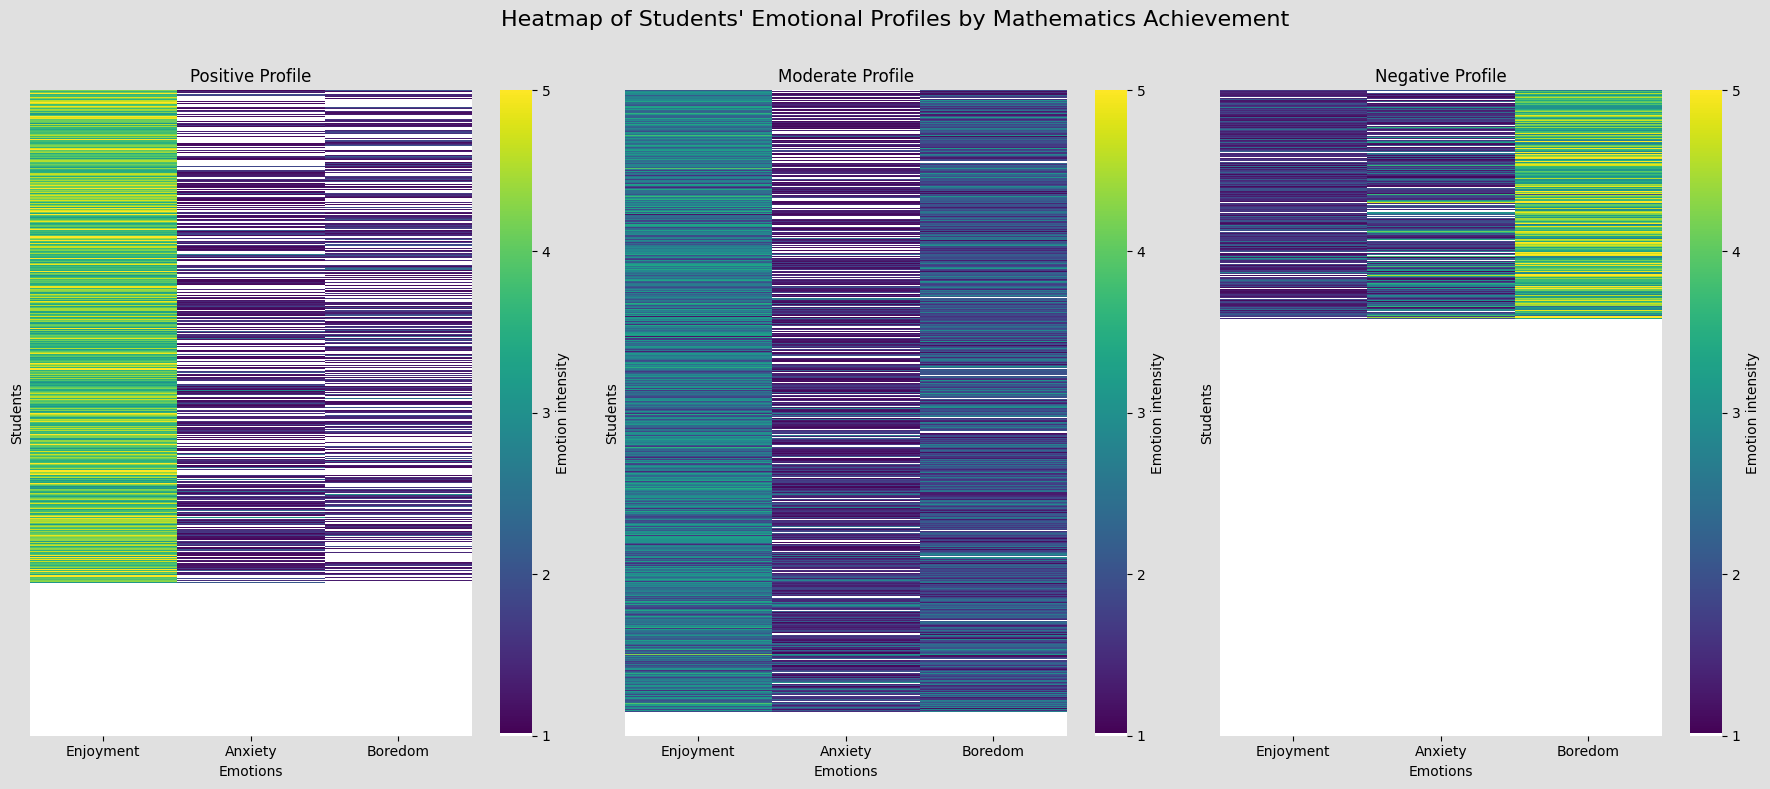

In [125]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

# Order manually by desired profile order (as you defined in the 'Profile' column)
ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Loop through each profile and create a heatmap
for i, profile in enumerate(ordered_profiles):
    # Filter the data for the current profile and sort by Mathematics_Z
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    
    # Select the relevant columns for emotions
    heatmap_data = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Pad with NaNs to equalize height (in case of uneven numbers of students)
    pad_size = max_count - len(heatmap_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=heatmap_data.columns)
        heatmap_data = pd.concat([heatmap_data, padding], ignore_index=True)

    # Create a custom colormap (white for value 1, viridis otherwise)
    base_cmap = cm.get_cmap("viridis", 256)
    colors = base_cmap(np.linspace(0, 1, 256))
    
    # Adjusting the color to have white for a value of 1.0
    value_for_white = 1.0
    vmin, vmax = 1, 5
    index_for_white = int((value_for_white - vmin) / (vmax - vmin) * 255)
    colors[index_for_white] = [1, 1, 1, 1]  # Set to white (RGBA)
    
    custom_cmap = mcolors.ListedColormap(colors)
    ticks = [1, 2, 3, 4, 5]

    # Plot the heatmap for each profile
    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        cmap=custom_cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Emotion intensity", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    # Set the title and labels
    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Emotions")

# Make the plot look nice and tight
plt.tight_layout()
plt.suptitle("Heatmap of Students' Emotional Profiles by Mathematics Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3412847832.py:35: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3412847832.py:35: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3412847832.py:35: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3412847832.py:88: UserWarning:

This figure includes Axes that are not compat

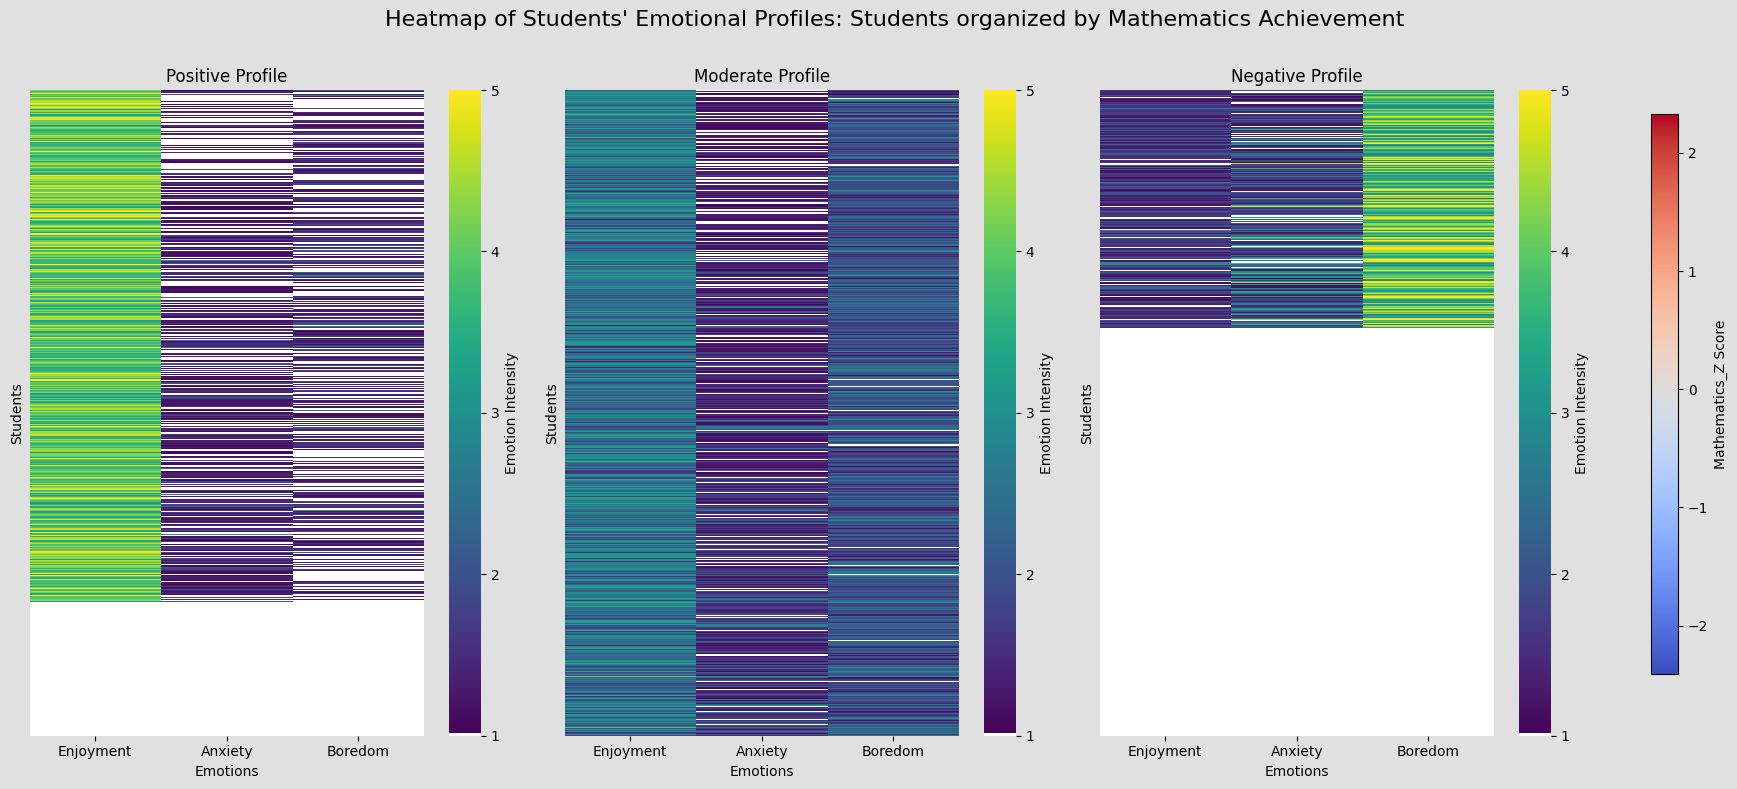

In [126]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

# Order manually by desired profile order (as you defined in the 'Profile' column)
ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Create a single colorbar axis for Mathematics_Z on the right
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]

# Loop through each profile and create a heatmap
for i, profile in enumerate(ordered_profiles):
    # Filter the data for the current profile and sort by Mathematics_Z
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    
    # Select the relevant columns for emotions
    heatmap_data = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Pad with NaNs to equalize height (in case of uneven numbers of students)
    pad_size = df["Profile"].value_counts().max() - len(heatmap_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=heatmap_data.columns)
        heatmap_data = pd.concat([heatmap_data, padding], ignore_index=True)

    # Create a custom colormap using viridis
    base_cmap = cm.get_cmap("viridis", 256)
    colors = base_cmap(np.linspace(0, 1, 256))
    
    # Adjusting the color to have white for a value of 1.0
    value_for_white = 1.0
    vmin, vmax = 1, 5
    index_for_white = int((value_for_white - vmin) / (vmax - vmin) * 255)
    colors[index_for_white] = [1, 1, 1, 1]  # Set to white (RGBA)
    
    custom_cmap = mcolors.ListedColormap(colors)
    ticks = [1, 2, 3, 4, 5]

    # Plot the heatmap for each profile (left side with emotion color scale)
    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        cmap=custom_cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={"label": "Emotion Intensity", "ticks": ticks},
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    # Set titles and labels for the heatmap
    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Emotions")

    # Plot Mathematics_Z color stripe next to each heatmap (on right side of each axes)
    math_scores = cluster_data["Mathematics_Z"].to_numpy()
    if pad_size > 0:
        math_scores = np.append(math_scores, [np.nan]*pad_size)
    math_scores = math_scores[:, np.newaxis]  # reshape to 2D for imshow
    im = axes[i].imshow(
        math_scores,
        aspect="auto",
        cmap="coolwarm",
        interpolation='nearest',
        extent=(3.05, 3.15, 0, len(math_scores)),
        vmin=df["Mathematics_Z"].min(),
        vmax=df["Mathematics_Z"].max()
    )

# Add single colorbar for Mathematics_Z (on the right side)
norm = mcolors.Normalize(vmin=df["Mathematics_Z"].min(), vmax=df["Mathematics_Z"].max())
sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Mathematics_Z Score")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.suptitle("Heatmap of Students' Emotional Profiles: Students organized by Mathematics Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1939651409.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1939651409.py:80: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



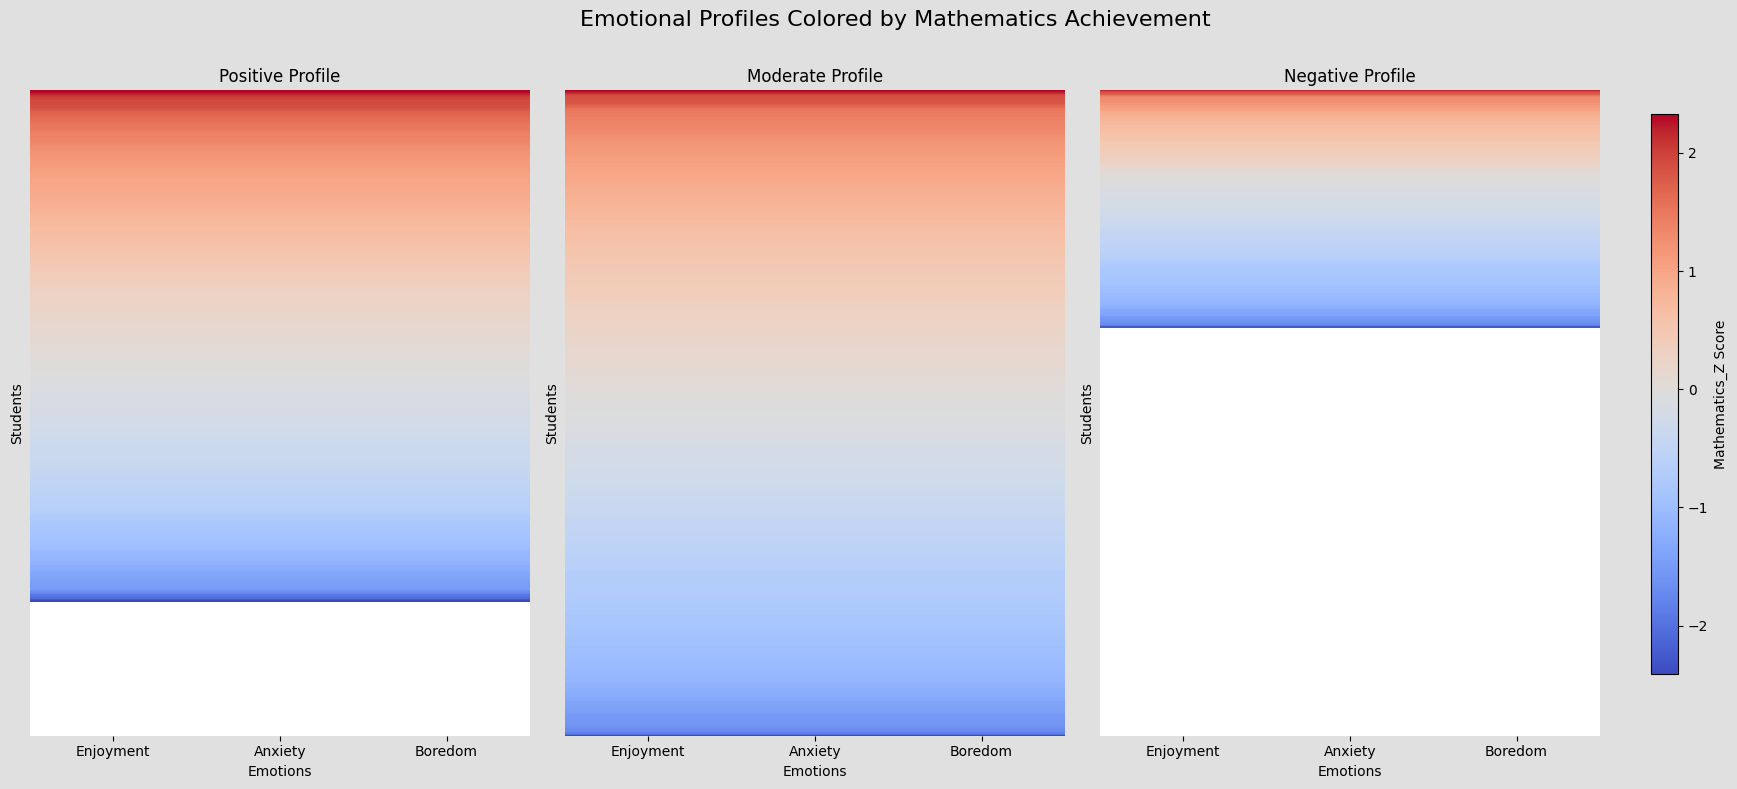

In [127]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

# Order manually by desired profile order (as you defined in the 'Profile' column)
ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Define colormap based on Mathematics_Z
vmin = df["Mathematics_Z"].min()
vmax = df["Mathematics_Z"].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap("coolwarm")

# Create a single colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])

# Loop through each profile and create a heatmap
for i, profile in enumerate(ordered_profiles):
    # Filter the data for the current profile and sort by Mathematics_Z
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    
    # Select emotion data
    heatmap_data = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]
    
    # Pad with NaNs to equalize height
    pad_size = df["Profile"].value_counts().max() - len(heatmap_data)
    if pad_size > 0:
        padding = pd.DataFrame(np.nan, index=range(pad_size), columns=heatmap_data.columns)
        heatmap_data = pd.concat([heatmap_data, padding], ignore_index=True)

    # Create a 2D color matrix based on Mathematics_Z values for each student (broadcast to 3 columns)
    math_scores = cluster_data["Mathematics_Z"].to_numpy()
    if pad_size > 0:
        math_scores = np.append(math_scores, [np.nan]*pad_size)
    color_matrix = np.tile(math_scores[:, np.newaxis], (1, 3))  # repeat score across 3 emotion columns

    # Plot heatmap where cell color reflects Mathematics_Z
    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        annot=False,
        fmt="",
        cmap=cmap,
        norm=norm,
        cbar=False,
        mask=heatmap_data.isnull(),
        yticklabels=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom"]
    )

    # Overlay the colored matrix by setting facecolor per cell
    for y in range(heatmap_data.shape[0]):
        for x in range(heatmap_data.shape[1]):
            if not np.isnan(heatmap_data.iloc[y, x]):
                value = color_matrix[y, x]
                color = cmap(norm(value))
                axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    # Set titles and labels
    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("Emotions")

# Add single colorbar for Mathematics_Z
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Mathematics_Z Score")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.suptitle("Emotional Profiles Colored by Mathematics Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1587573502.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1587573502.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1587573502.py:86: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



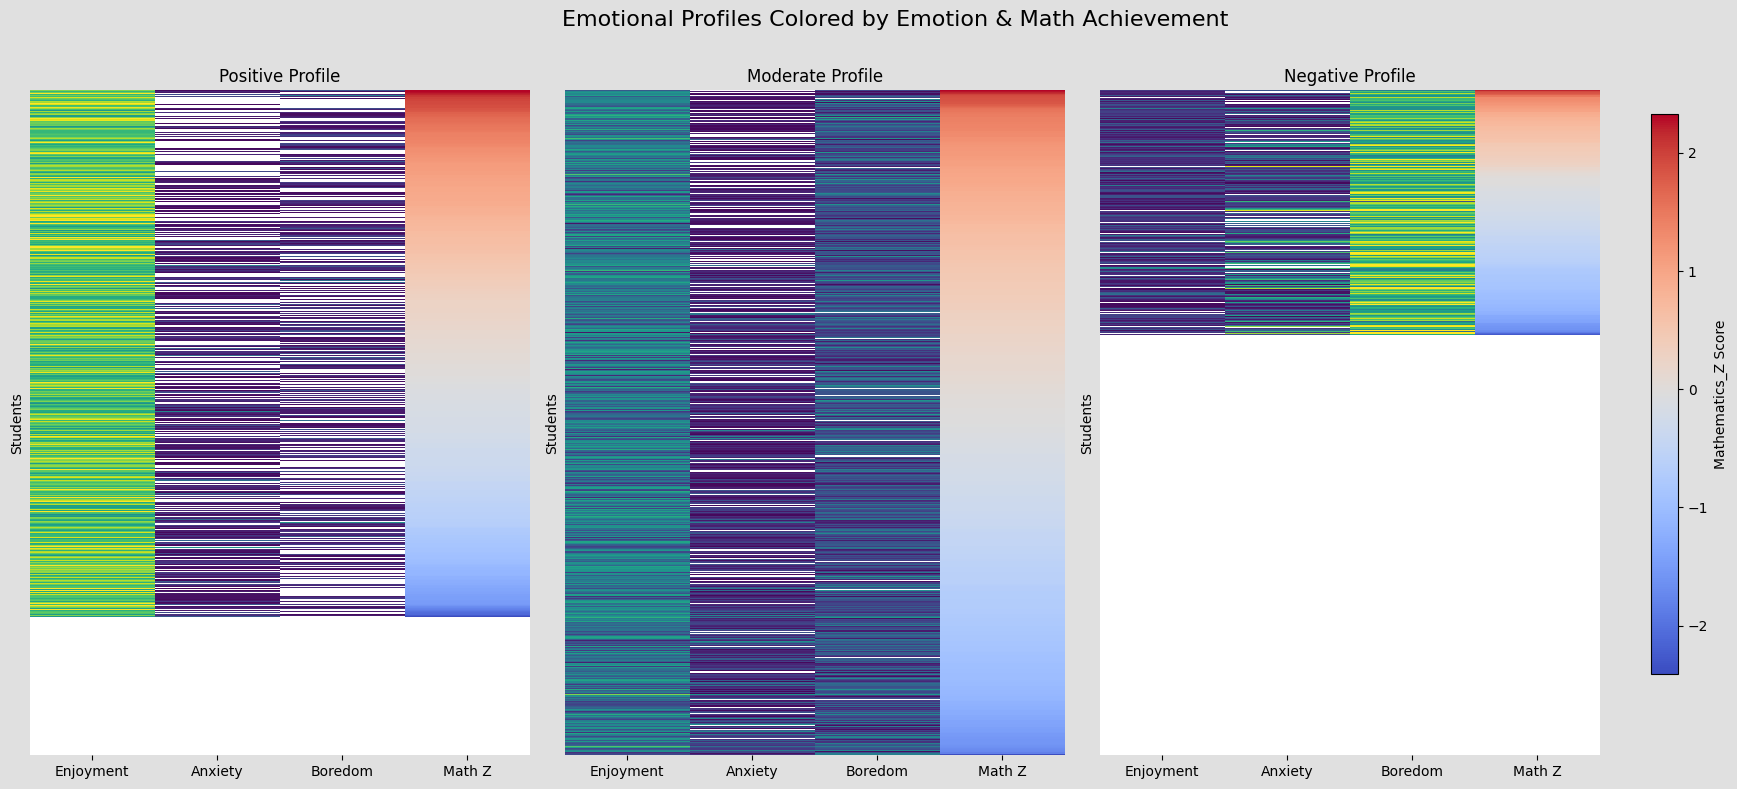

In [128]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Emotion colormap (viridis with white at value 1.0)
emotion_cmap = cm.get_cmap("viridis", 256)
emotion_colors = emotion_cmap(np.linspace(0, 1, 256))
index_for_white = int((1.0 - 1) / (5 - 1) * 255)
emotion_colors[index_for_white] = [1, 1, 1, 1]
emotion_cmap = mcolors.ListedColormap(emotion_colors)

# Mathematics_Z colormap
math_cmap = cm.get_cmap("coolwarm")
math_vmin = df["Mathematics_Z"].min()
math_vmax = df["Mathematics_Z"].max()
math_norm = mcolors.Normalize(vmin=math_vmin, vmax=math_vmax)

# Single colorbar axis for Mathematics_Z
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    emotions = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Padding
    max_count = df["Profile"].value_counts().max()
    pad_size = max_count - len(emotions)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=emotions.columns)
        emotions = pd.concat([emotions, pad], ignore_index=True)
        math_scores = np.append(cluster_data["Mathematics_Z"].to_numpy(), [np.nan] * pad_size)
    else:
        math_scores = cluster_data["Mathematics_Z"].to_numpy()

    # Expand Mathematics_Z values into a column
    right_col = np.tile(math_scores[:, np.newaxis], (1, 1))

    # Combine: emotions (3 columns) + math Z (1 column)
    full_matrix = np.concatenate([emotions.to_numpy(), right_col], axis=1)

    # Plot the base heatmap (just for structure/masking)
    sns.heatmap(
        full_matrix,
        ax=axes[i],
        cmap=None,
        cbar=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom", "Math Z"],
        yticklabels=False,
        mask=np.isnan(full_matrix)
    )

    # Overlay coloring
    for y in range(full_matrix.shape[0]):
        for x in range(full_matrix.shape[1]):
            val = full_matrix[y, x]
            if np.isnan(val):
                continue
            if x == 3:  # Math Z column
                color = math_cmap(math_norm(val))
            else:       # Emotion columns
                color = emotion_cmap((val - 1) / 4)
            axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("")

# Add single Mathematics_Z colorbar
sm = cm.ScalarMappable(cmap=math_cmap, norm=math_norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Mathematics_Z Score")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.suptitle("Emotional Profiles Colored by Emotion & Math Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2689888062.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2689888062.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2689888062.py:82: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



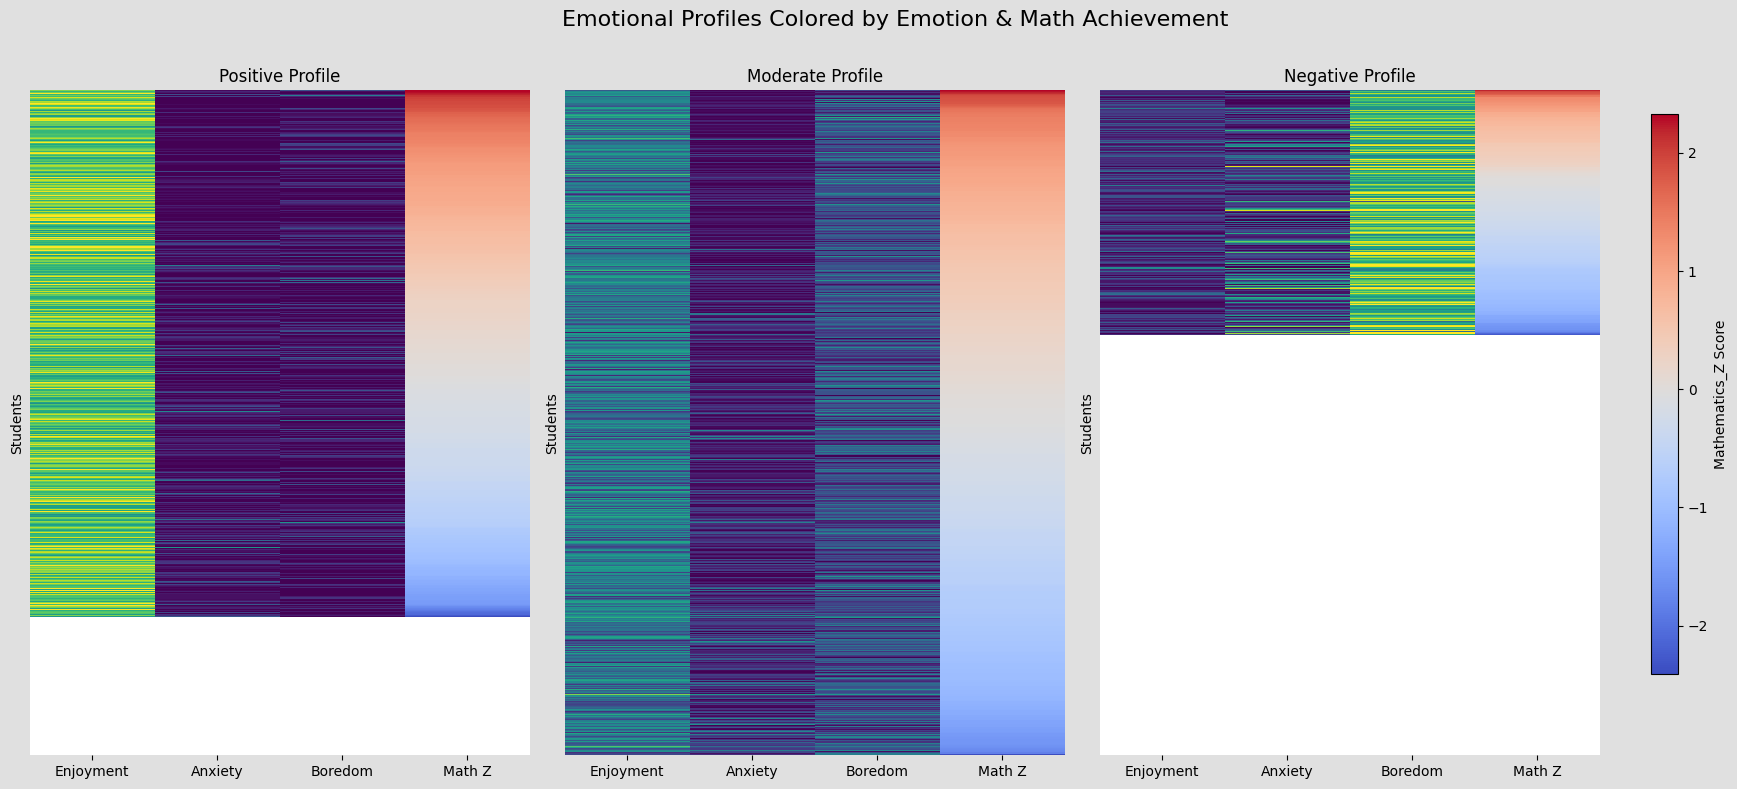

In [129]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Use default viridis for emotions (no white override)
emotion_cmap = cm.get_cmap("viridis", 256)

# Mathematics_Z colormap
math_cmap = cm.get_cmap("coolwarm")
math_vmin = df["Mathematics_Z"].min()
math_vmax = df["Mathematics_Z"].max()
math_norm = mcolors.Normalize(vmin=math_vmin, vmax=math_vmax)

# Single colorbar axis for Mathematics_Z
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    emotions = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Padding
    max_count = df["Profile"].value_counts().max()
    pad_size = max_count - len(emotions)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=emotions.columns)
        emotions = pd.concat([emotions, pad], ignore_index=True)
        math_scores = np.append(cluster_data["Mathematics_Z"].to_numpy(), [np.nan] * pad_size)
    else:
        math_scores = cluster_data["Mathematics_Z"].to_numpy()

    # Expand Mathematics_Z values into a column
    right_col = np.tile(math_scores[:, np.newaxis], (1, 1))

    # Combine: emotions (3 columns) + math Z (1 column)
    full_matrix = np.concatenate([emotions.to_numpy(), right_col], axis=1)

    # Plot the base heatmap (just for structure/masking)
    sns.heatmap(
        full_matrix,
        ax=axes[i],
        cmap=None,
        cbar=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom", "Math Z"],
        yticklabels=False,
        mask=np.isnan(full_matrix)
    )

    # Overlay coloring
    for y in range(full_matrix.shape[0]):
        for x in range(full_matrix.shape[1]):
            val = full_matrix[y, x]
            if np.isnan(val):
                continue
            if x == 3:  # Math Z column
                color = math_cmap(math_norm(val))
            else:       # Emotion columns (use full viridis scale, including 1.0)
                color = emotion_cmap((val - 1) / 4)
            axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("")

# Add single Mathematics_Z colorbar
sm = cm.ScalarMappable(cmap=math_cmap, norm=math_norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Mathematics_Z Score")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.suptitle("Emotional Profiles Colored by Emotion & Math Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3924199147.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3924199147.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\3924199147.py:85: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



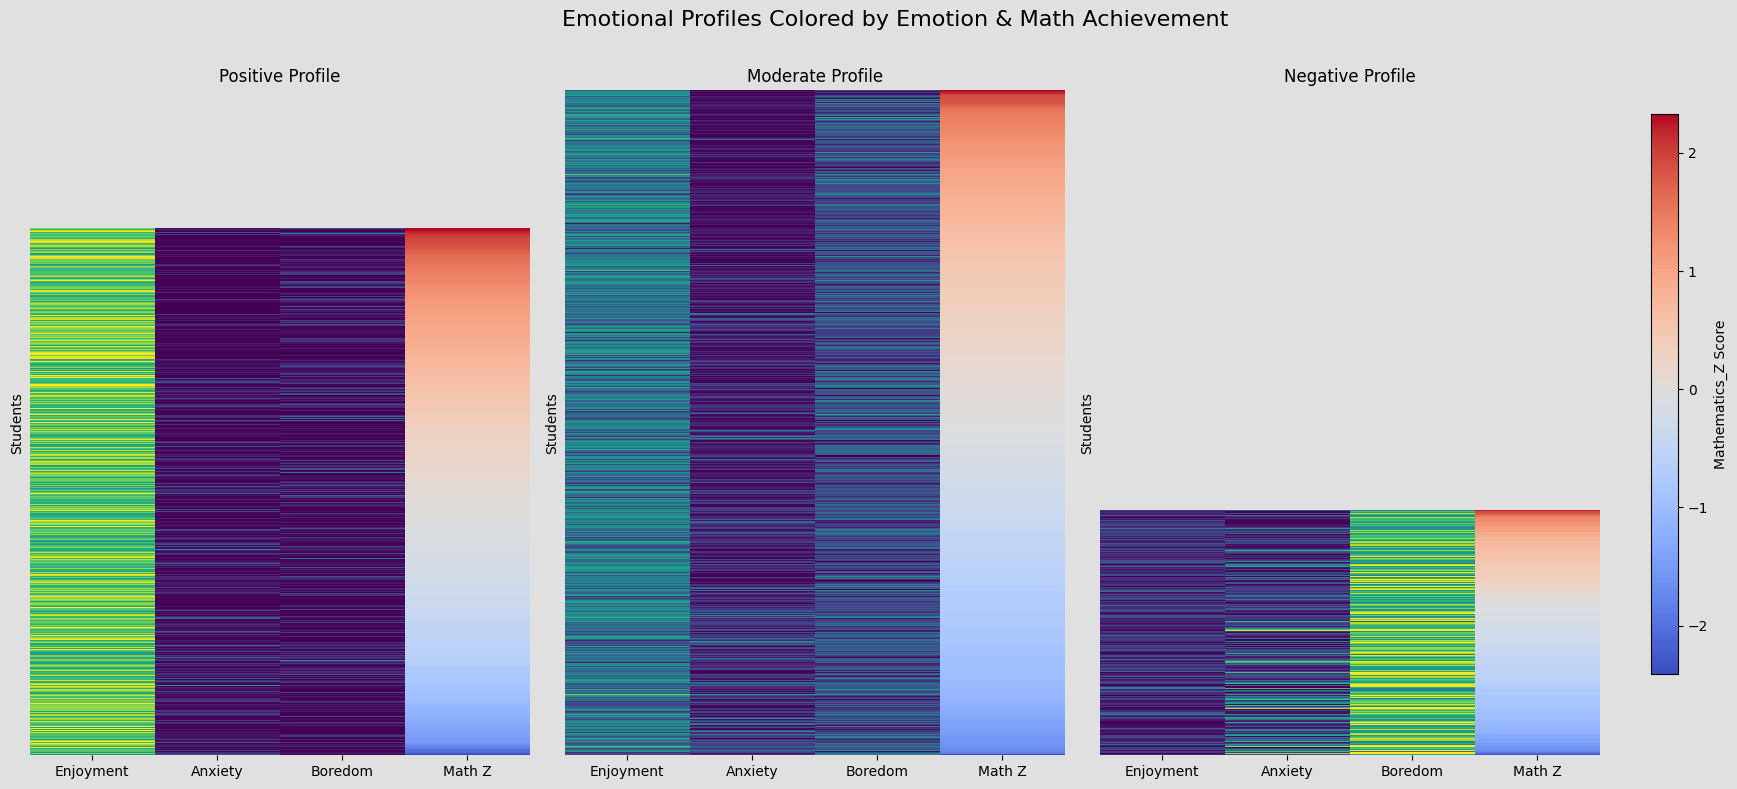

In [134]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Use default viridis for emotions (no white override)
emotion_cmap = cm.get_cmap("viridis", 256)

# Mathematics_Z colormap
math_cmap = cm.get_cmap("coolwarm")
math_vmin = df["Mathematics_Z"].min()
math_vmax = df["Mathematics_Z"].max()
math_norm = mcolors.Normalize(vmin=math_vmin, vmax=math_vmax)

# Single colorbar axis for Mathematics_Z
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    emotions = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Padding
    max_count = df["Profile"].value_counts().max()
    pad_size = max_count - len(emotions)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=emotions.columns)
        emotions = pd.concat([pad, emotions], ignore_index=True)  # Prepend NaNs
        math_scores = np.append([np.nan] * pad_size, cluster_data["Mathematics_Z"].to_numpy())
    else:
        math_scores = cluster_data["Mathematics_Z"].to_numpy()

    # Expand Mathematics_Z values into a column
    right_col = np.tile(math_scores[:, np.newaxis], (1, 1))

    # Combine: emotions (3 columns) + math Z (1 column)
    full_matrix = np.concatenate([emotions.to_numpy(), right_col], axis=1)

    # Set background color of subplot to match figure background
    axes[i].set_facecolor('#e0e0e0')

    # Plot the base heatmap (just for structure/masking)
    sns.heatmap(
        full_matrix,
        ax=axes[i],
        cmap=None,
        cbar=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom", "Math Z"],
        yticklabels=False,
        mask=np.isnan(full_matrix)
    )

    # Overlay coloring
    for y in range(full_matrix.shape[0]):
        for x in range(full_matrix.shape[1]):
            val = full_matrix[y, x]
            if np.isnan(val):
                continue
            if x == 3:  # Math Z column
                color = math_cmap(math_norm(val))
            else:       # Emotion columns
                color = emotion_cmap((val - 1) / 4)
            axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("")

# Add single Mathematics_Z colorbar
sm = cm.ScalarMappable(cmap=math_cmap, norm=math_norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Mathematics_Z Score")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.suptitle("Emotional Profiles Colored by Emotion & Math Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


Let's use this:

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\4169023571.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\4169023571.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\4169023571.py:101: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



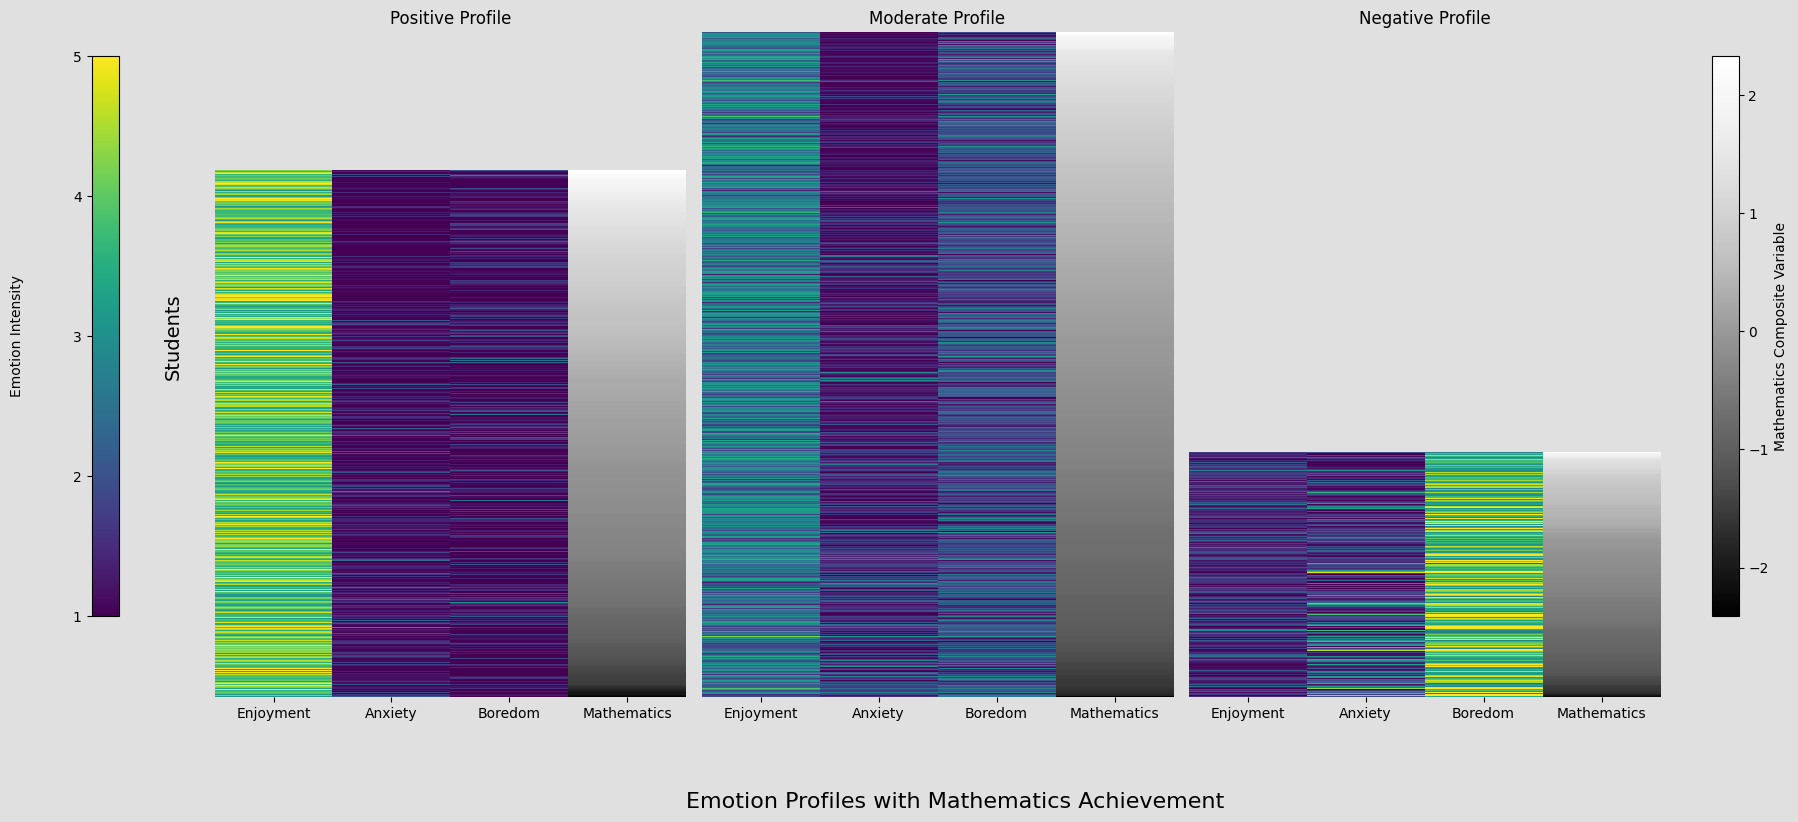

In [147]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Emotion colormap 
emotion_cmap = cm.get_cmap("viridis")  
emotion_norm = mcolors.Normalize(vmin=1, vmax=5)

# Mathematics_Z colormap
math_cmap = cm.get_cmap("Greys_r")
math_vmin = df["Mathematics_Z"].min()
math_vmax = df["Mathematics_Z"].max()
math_norm = mcolors.Normalize(vmin=math_vmin, vmax=math_vmax)

# Add two colorbars: Emotion on left of figure, Math on right
cbar_ax_emotion = fig.add_axes([0.02, 0.15, 0.015, 0.7])
cbar_ax_math = fig.add_axes([0.92, 0.15, 0.015, 0.7])

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    emotions = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Padding (top) to align all plots at bottom
    max_count = df["Profile"].value_counts().max()
    pad_size = max_count - len(emotions)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=emotions.columns)
        emotions = pd.concat([pad, emotions], ignore_index=True)
        math_scores = np.append([np.nan] * pad_size, cluster_data["Mathematics_Z"].to_numpy())
    else:
        math_scores = cluster_data["Mathematics_Z"].to_numpy()

    # Combine emotion columns with a Mathematics_Z column
    right_col = np.tile(math_scores[:, np.newaxis], (1, 1))
    full_matrix = np.concatenate([emotions.to_numpy(), right_col], axis=1)

    # Set subplot background color
    axes[i].set_facecolor('#e0e0e0')

    # Plot structure only
    sns.heatmap(
        full_matrix,
        ax=axes[i],
        cmap=None,
        cbar=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom", "Mathematics"],
        yticklabels=False,
        mask=np.isnan(full_matrix)
    )

    # Overlay color-coded patches
    for y in range(full_matrix.shape[0]):
        for x in range(full_matrix.shape[1]):
            val = full_matrix[y, x]
            if np.isnan(val):
                continue
            if x == 3:
                color = math_cmap(math_norm(val))
            else:
                color = emotion_cmap(emotion_norm(val))
            axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_xlabel("")  # remove local x-label
    axes[i].set_ylabel("")  # remove local y-label

# Add global y label
fig.text(0.06, 0.5, "Students", va='center', rotation='vertical', fontsize=14)  # Move "Students" further right

# Emotion colorbar
sm_emotion = cm.ScalarMappable(cmap=emotion_cmap, norm=emotion_norm)
sm_emotion.set_array([])
cbar_emotion = fig.colorbar(sm_emotion, cax=cbar_ax_emotion)
cbar_emotion.set_ticks([1, 2, 3, 4, 5])
cbar_emotion.set_label("Emotion Intensity", labelpad=20)
cbar_emotion.ax.yaxis.set_label_position('left')
cbar_emotion.ax.yaxis.set_ticks_position('left')
cbar_emotion.ax.yaxis.set_label_coords(-2.5, 0.5)

# Mathematics_Z colorbar
sm_math = cm.ScalarMappable(cmap=math_cmap, norm=math_norm)
sm_math.set_array([])
cbar_math = fig.colorbar(sm_math, cax=cbar_ax_math)
cbar_math.set_label("Mathematics Composite Variable")

# Title at the bottom of the plot
fig.suptitle("Emotion Profiles with Mathematics Achievement", fontsize=16, y=-0.07)

# Layout
plt.tight_layout(rect=[0.08, 0, 0.9, 1])
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2449489631.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2449489631.py:21: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\2449489631.py:95: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



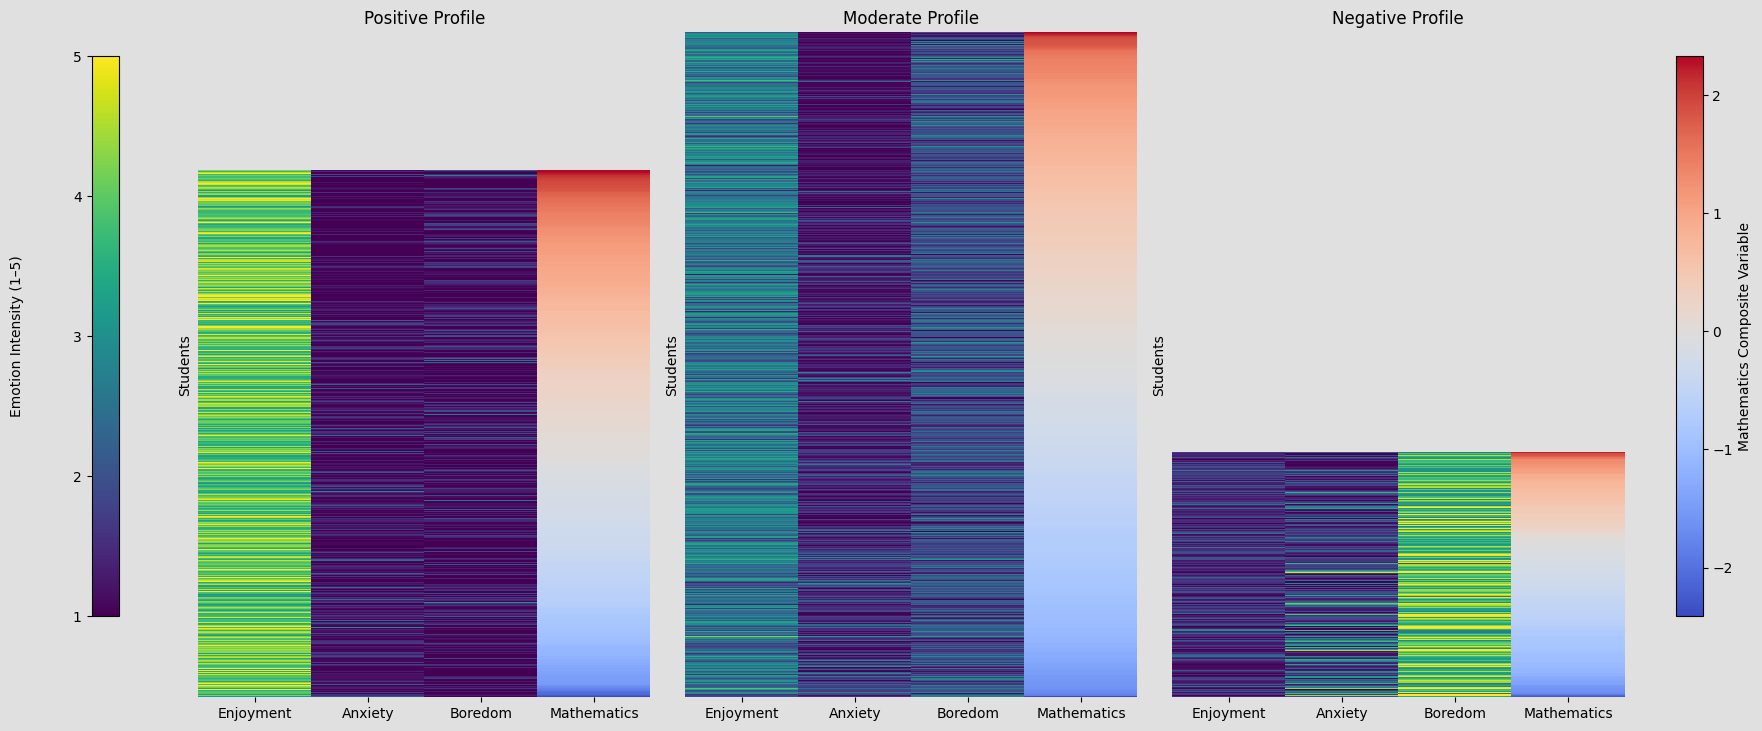

In [135]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming the dataset `df` already includes the clustering and profile assignments

# Set up figure for 3 emotion heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.patch.set_facecolor('#e0e0e0')

ordered_profiles = ['Positive', 'Moderate', 'Negative']

# Emotion colormap 
emotion_cmap = cm.get_cmap("viridis")  
emotion_norm = mcolors.Normalize(vmin=1, vmax=5)  # scale from 1 to 5

# Mathematics_Z colormap
math_cmap = cm.get_cmap("coolwarm")
math_vmin = df["Mathematics_Z"].min()
math_vmax = df["Mathematics_Z"].max()
math_norm = mcolors.Normalize(vmin=math_vmin, vmax=math_vmax)

# Add two colorbars: Emotion on left of figure, Math on right
cbar_ax_emotion = fig.add_axes([0.04, 0.15, 0.015, 0.7])
cbar_ax_math = fig.add_axes([0.92, 0.15, 0.015, 0.7])

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False)
    emotions = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Padding (top) to align all plots at bottom
    max_count = df["Profile"].value_counts().max()
    pad_size = max_count - len(emotions)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=emotions.columns)
        emotions = pd.concat([pad, emotions], ignore_index=True)  # Prepend padding
        math_scores = np.append([np.nan] * pad_size, cluster_data["Mathematics_Z"].to_numpy())
    else:
        math_scores = cluster_data["Mathematics_Z"].to_numpy()

    # Combine emotion columns with a Mathematics_Z column
    right_col = np.tile(math_scores[:, np.newaxis], (1, 1))
    full_matrix = np.concatenate([emotions.to_numpy(), right_col], axis=1)

    # Set subplot background color
    axes[i].set_facecolor('#e0e0e0')

    # Plot structure only (no coloring)
    sns.heatmap(
        full_matrix,
        ax=axes[i],
        cmap=None,
        cbar=False,
        xticklabels=["Enjoyment", "Anxiety", "Boredom", "Mathematics"],
        yticklabels=False,
        mask=np.isnan(full_matrix)
    )

    # Overlay color-coded patches
    for y in range(full_matrix.shape[0]):
        for x in range(full_matrix.shape[1]):
            val = full_matrix[y, x]
            if np.isnan(val):
                continue
            if x == 3:  # Mathematics_Z column
                color = math_cmap(math_norm(val))
            else:       # Emotion columns
                color = emotion_cmap(emotion_norm(val))
            axes[i].add_patch(plt.Rectangle((x, y), 1, 1, color=color, ec='none'))

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_ylabel("Students")
    axes[i].set_xlabel("")

# Add emotion colorbar
sm_emotion = cm.ScalarMappable(cmap=emotion_cmap, norm=emotion_norm)
sm_emotion.set_array([])
cbar_emotion = fig.colorbar(sm_emotion, cax=cbar_ax_emotion)
cbar_emotion.set_ticks([1, 2, 3, 4, 5])
cbar_emotion.set_label("Emotion Intensity (1–5)", labelpad=20)
cbar_emotion.ax.yaxis.set_label_position('left')
cbar_emotion.ax.yaxis.set_ticks_position('left')
cbar_emotion.ax.yaxis.set_label_coords(-2.5, 0.5)

# Add Mathematics_Z colorbar
sm_math = cm.ScalarMappable(cmap=math_cmap, norm=math_norm)
sm_math.set_array([])  # ScalarMappable expects an array of data values
cbar_math = fig.colorbar(sm_math, cax=cbar_ax_math)
cbar_math.set_label("Mathematics Composite Variable")

# Final layout tweaks
plt.tight_layout(rect=[0.08, 0, 0.9, 1])
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\Marianne\AppData\Local\Temp\ipykernel_13848\1759695650.py:84: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



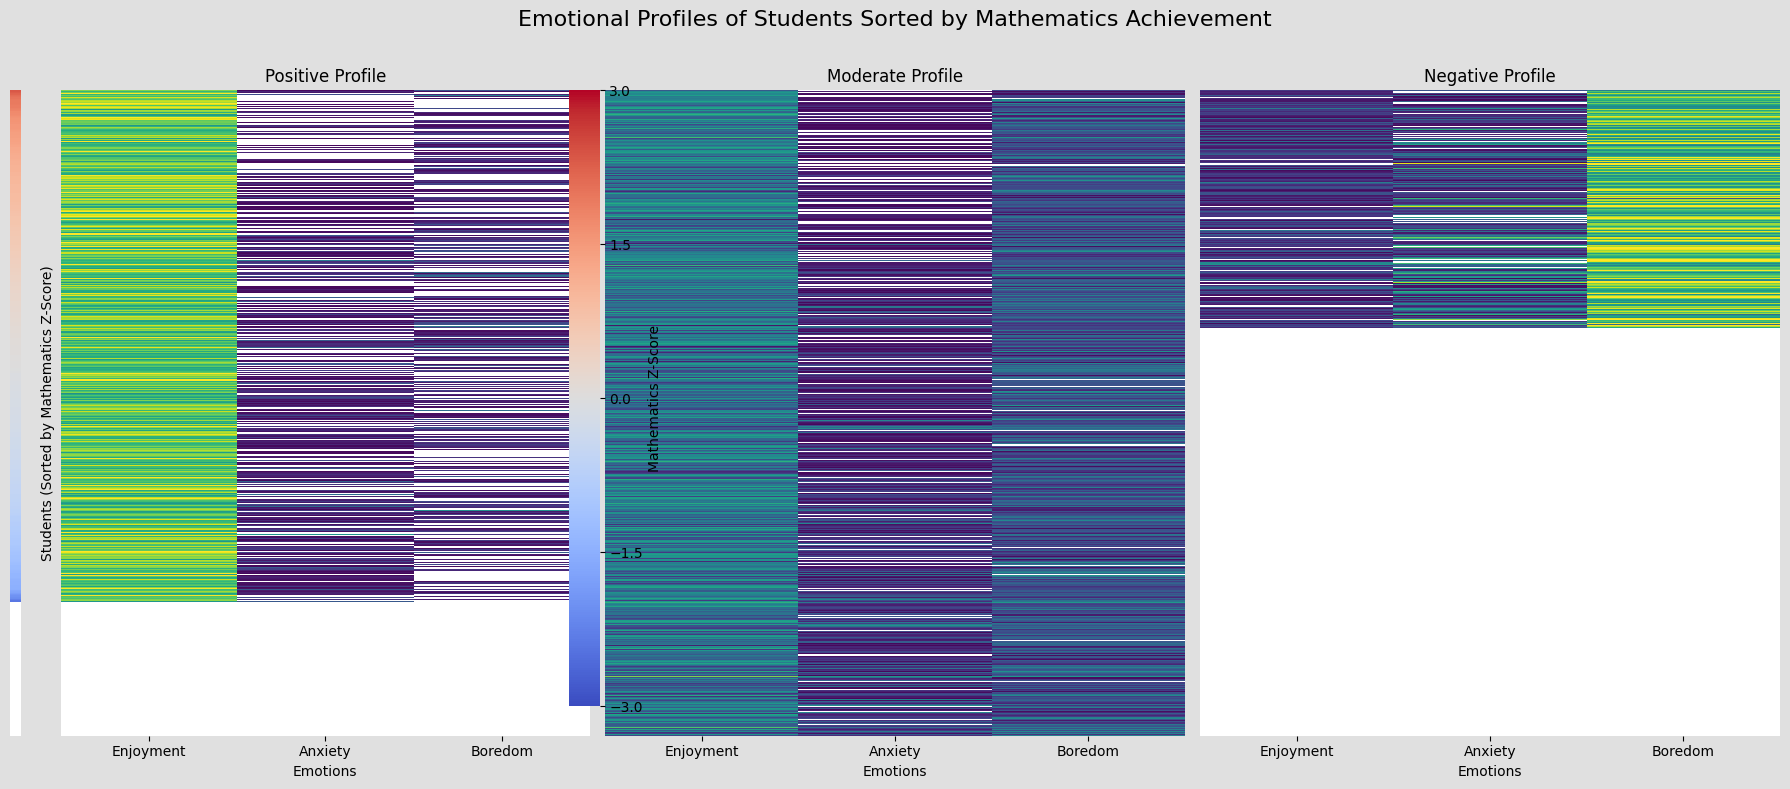

In [131]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import colormaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Profiles and ordering
ordered_profiles = ['Positive', 'Moderate', 'Negative']
max_count = df["Profile"].value_counts().max()

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.patch.set_facecolor('#e0e0e0')

# Colormap for heatmaps
base_cmap = colormaps["viridis"]
colors = base_cmap(np.linspace(0, 1, 256))
vmin, vmax = 1, 5
index_for_white = int((1.0 - vmin) / (vmax - vmin) * 255)
colors[index_for_white] = [1, 1, 1, 1]
custom_cmap = mcolors.ListedColormap(colors)

# We'll collect Z-scores of the first profile to show as the vertical bar
zbar_data = None

for i, profile in enumerate(ordered_profiles):
    cluster_data = df[df["Profile"] == profile].sort_values("Mathematics_Z", ascending=False).reset_index(drop=True)
    heatmap_data = cluster_data[["Enjoyment", "Anxiety", "Boredom"]]

    # Pad data to match max_count for visual alignment
    pad_size = max_count - len(heatmap_data)
    if pad_size > 0:
        pad = pd.DataFrame(np.nan, index=range(pad_size), columns=heatmap_data.columns)
        heatmap_data = pd.concat([heatmap_data, pad], ignore_index=True)

    # Save Z-scores for separate display (once)
    if i == 0:
        zbar_data = cluster_data[["Mathematics_Z"]]
        if pad_size > 0:
            pad_z = pd.DataFrame(np.nan, index=range(pad_size), columns=["Mathematics_Z"])
            zbar_data = pd.concat([zbar_data, pad_z], ignore_index=True)

    # Plot heatmap
    sns.heatmap(
        heatmap_data,
        ax=axes[i],
        cmap=custom_cmap,
        vmin=vmin,
        vmax=vmax,
        cbar=False,  # Suppress colorbar here
        xticklabels=["Enjoyment", "Anxiety", "Boredom"],
        yticklabels=False
    )

    axes[i].set_title(f"{profile} Profile")
    axes[i].set_xlabel("Emotions")
    if i == 0:
        axes[i].set_ylabel("Students (Sorted by Mathematics Z-Score)")

# Add vertical bar for Mathematics Z-scores (on left)
# Use make_axes_locatable to align with leftmost plot
divider = make_axes_locatable(axes[0])
zbar_ax = divider.append_axes("left", size="2%", pad=0.4)

# Plot the Z-score bar
sns.heatmap(
    zbar_data,
    ax=zbar_ax,
    cmap="coolwarm",
    vmin=-3,
    vmax=3,
    cbar=True,
    cbar_kws={"label": "Mathematics Z-Score", "ticks": [-3.0, -1.5, 0.0, 1.5, 3.0]},
    xticklabels=False,
    yticklabels=False
)

zbar_ax.set_ylabel("")  # Already shown
zbar_ax.set_xlabel("")  # No label needed

# Final layout
plt.tight_layout()
plt.suptitle("Emotional Profiles of Students Sorted by Mathematics Achievement", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()
